In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

In [4]:
abalone_df = pd.read_csv("abalone.csv")
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
############################################### DATA EXPLORATION ###########################################################

In [6]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
abalone_df.describe()

#Height can't be 0
#Weight is small but abalone are small in general so small weights can't be excluded

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
abalone_df[abalone_df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [9]:
abalone_df = abalone_df[abalone_df['Height'] != 0]
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
hot_encoded_column = pd.get_dummies(abalone_df['Sex'])
hot_encoded_column

,F,I,M
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
...,...,...,...
4172,True,False,False
4173,False,False,True
4174,False,False,True
4175,True,False,False


In [12]:
abalone_encoded = pd.concat([abalone_df.drop(['Sex'], axis = 1), hot_encoded_column], axis = 1)
abalone_encoded

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,False,False


In [13]:
y = abalone_encoded['Rings']
X = abalone_encoded.drop(['Rings'], axis = 1)
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


In [14]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [15]:
print(len(np.unique(y)))

28


In [16]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X_scaled

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,-0.575276,-0.432829,-1.068619,-0.642485,-0.608200,-0.726809,-0.638195,-0.675069,-0.687505,1.316180
1,-1.449876,-1.440813,-1.188465,-1.230912,-1.171446,-1.205857,-1.212926,-0.675069,-0.687505,1.316180
2,0.049438,0.121562,-0.109856,-0.310030,-0.464009,-0.357258,-0.207146,1.481330,-0.687505,-0.759774
3,-0.700219,-0.432829,-0.349547,-0.638406,-0.648754,-0.608188,-0.602274,-0.675069,-0.687505,1.316180
4,-1.616466,-1.541611,-1.428155,-1.272724,-1.216506,-1.287980,-1.320688,-0.675069,1.454535,-0.759774
...,...,...,...,...,...,...,...,...,...,...
4170,0.340972,0.423957,0.609217,0.118288,0.047419,0.532403,0.073036,1.481330,-0.687505,-0.759774
4171,0.549210,0.323158,-0.109856,0.279417,0.358331,0.308847,0.155653,-0.675069,-0.687505,1.316180
4172,0.632505,0.675952,1.567980,0.707734,0.748098,0.974953,0.496900,-0.675069,-0.687505,1.316180
4173,0.840743,0.776751,0.249680,0.541506,0.772880,0.733147,0.410690,1.481330,-0.687505,-0.759774


In [17]:
abalone_scaled_with_target = pd.concat([X_scaled, y], axis = 1)
abalone_scaled_with_target

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,-0.575276,-0.432829,-1.068619,-0.642485,-0.608200,-0.726809,-0.638195,-0.675069,-0.687505,1.316180,15.0
1,-1.449876,-1.440813,-1.188465,-1.230912,-1.171446,-1.205857,-1.212926,-0.675069,-0.687505,1.316180,7.0
2,0.049438,0.121562,-0.109856,-0.310030,-0.464009,-0.357258,-0.207146,1.481330,-0.687505,-0.759774,9.0
3,-0.700219,-0.432829,-0.349547,-0.638406,-0.648754,-0.608188,-0.602274,-0.675069,-0.687505,1.316180,10.0
4,-1.616466,-1.541611,-1.428155,-1.272724,-1.216506,-1.287980,-1.320688,-0.675069,1.454535,-0.759774,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.632505,0.675952,1.567980,0.707734,0.748098,0.974953,0.496900,-0.675069,-0.687505,1.316180,11.0
4173,0.840743,0.776751,0.249680,0.541506,0.772880,0.733147,0.410690,1.481330,-0.687505,-0.759774,10.0
4174,1.548753,1.482339,1.328289,2.283331,2.640606,1.787053,1.840335,-0.675069,-0.687505,1.316180,9.0
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


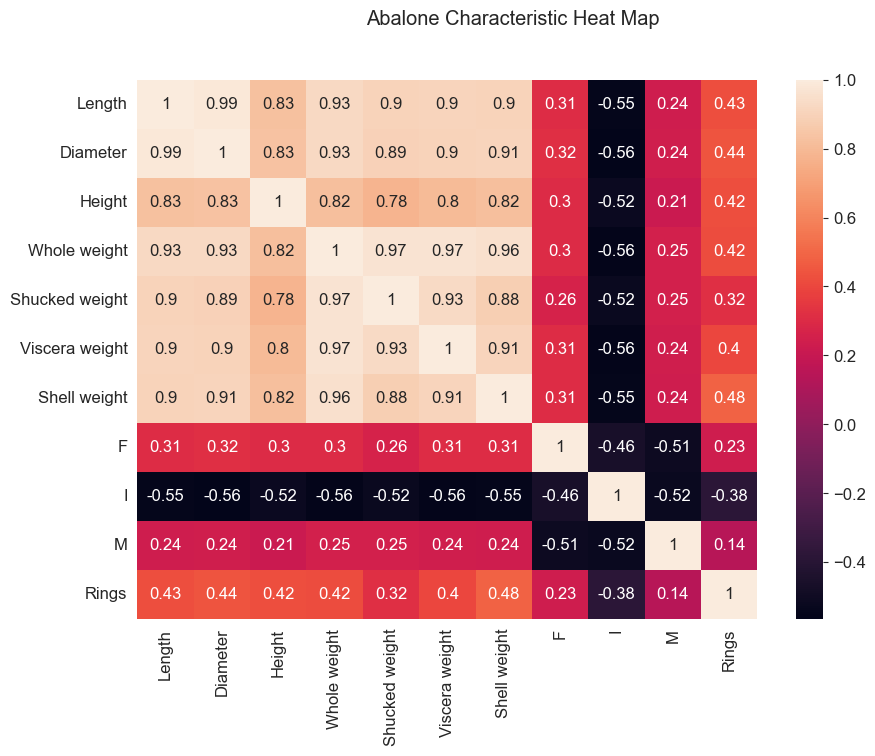

In [18]:
sns.heatmap(abalone_scaled_with_target.corr(), annot = True)
plt.suptitle('Abalone Characteristic Heat Map')
plt.show()

#Seems like there are multiple attributes that correlate with each other

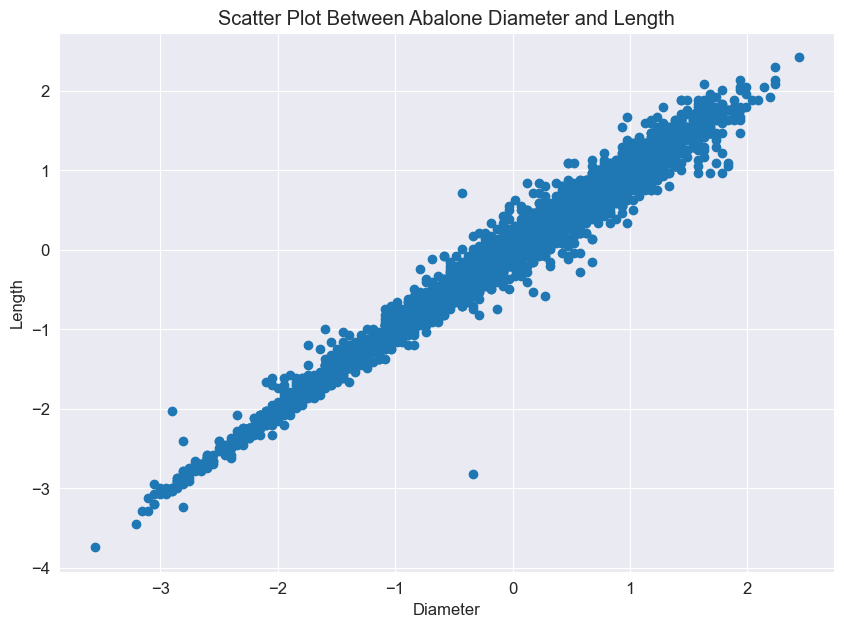

In [19]:
plt.scatter(x = abalone_scaled_with_target['Diameter'], y = abalone_scaled_with_target['Length'])
plt.title('Scatter Plot Between Abalone Diameter and Length')
plt.xlabel('Diameter')
plt.ylabel('Length')
plt.show()

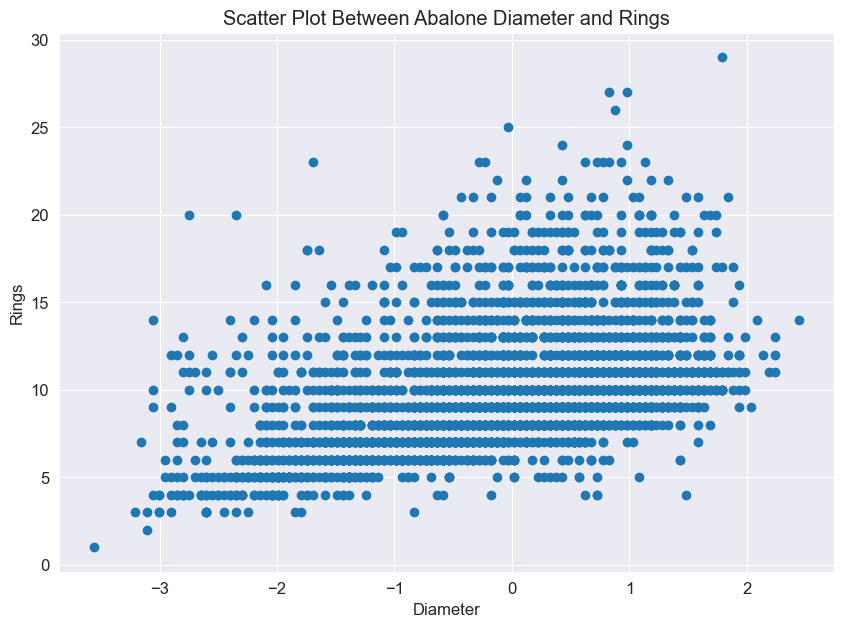

In [20]:
plt.scatter(x = abalone_scaled_with_target['Diameter'], y = abalone_scaled_with_target['Rings'])
plt.title('Scatter Plot Between Abalone Diameter and Rings')
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.show()

In [21]:
################################################### MODEL CREATION ##########################################################

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 6)
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
2404,1.090629,1.079146,0.129835,0.858665,0.752604,0.933891,0.547189,-0.675069,1.454535,-0.759774
1372,0.757448,0.675952,0.729062,0.611873,0.540823,1.107261,0.439427,-0.675069,-0.687505,1.316180
2946,0.924038,0.776751,0.968753,0.714873,0.536317,0.883705,0.834555,-0.675069,-0.687505,1.316180
156,0.424267,0.524755,1.208444,0.336526,0.146550,0.564340,0.726793,1.481330,-0.687505,-0.759774
1225,-1.491523,-1.541611,-1.308310,-1.281902,-1.146663,-1.310792,-1.356609,-0.675069,1.454535,-0.759774
...,...,...,...,...,...,...,...,...,...,...
848,0.216029,0.222360,-0.349547,0.191714,0.198369,-0.051579,0.317297,1.481330,-0.687505,-0.759774
335,0.799095,0.575154,1.208444,1.045289,0.950866,1.248694,0.834555,-0.675069,-0.687505,1.316180
2004,-1.075047,-1.188817,-1.068619,-1.078961,-0.907847,-1.027925,-1.155453,-0.675069,1.454535,-0.759774
227,-1.324933,-1.390414,-1.308310,-1.272724,-1.268325,-1.205857,-1.212926,-0.675069,1.454535,-0.759774


In [23]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(60, input_shape=(10,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(38, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(30, activation = 'softmax')
])

In [24]:
NN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
NN_model.fit(X_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
105/105 [==============================] - 0s 443us/step - loss: 3.2632 - accuracy: 0.2168
Epoch 2/100
105/105 [==============================] - 0s 443us/step - loss: 2.6369 - accuracy: 0.2362
Epoch 3/100
105/105 [==============================] - 0s 433us/step - loss: 2.4469 - accuracy: 0.2443
Epoch 4/100
105/105 [==============================] - 0s 443us/step - loss: 2.3407 - accuracy: 0.2506
Epoch 5/100
105/105 [==============================] - 0s 433us/step - loss: 2.2735 - accuracy: 0.2551
Epoch 6/100
105/105 [==============================] - 0s 443us/step - loss: 2.2225 - accuracy: 0.2617
Epoch 7/100
105/105 [==============================] - 0s 433us/step - loss: 2.1886 - accuracy: 0.2587
Epoch 8/100
105/105 [==============================] - 0s 443us/step - loss: 2.1599 - accuracy: 0.2757
Epoch 9/100
105/105 [==============================] - 0s 452us/step - loss: 2.1399 - accuracy: 0.2614
Epoch 10/100
105/105 [==============================] - 0s 433us/step - l

In [26]:
loss, accuracy = NN_model.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

27/27 [==============================] - 0s 385us/step - loss: 2.0107 - accuracy: 0.2671
Test Loss: 2.0107
Test Accuracy: 0.2671


In [27]:
############################################ IMPROVE MODEL #################################################################

In [28]:
def create_NN_model(optimizer, activation1, activation2, epochs):
    NN_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(60, input_shape=(10,), activation=activation1, kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(38, activation=activation2, kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(30, activation = 'softmax')
    ])
    
    NN_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return NN_model

In [29]:
param_grid = {
    'optimizer': ['adam', 'sgd', 'adagrad'],
    'epochs': [10, 50, 100, 200],
    'activation1' : ['relu', 'tanh', 'sigmoid'],
    'activation2' : ['relu', 'tanh', 'sigmoid']
}

new_model = KerasClassifier(build_fn=create_NN_model)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, cv=3)

C:\Users\Phuong Hoang Dinh\AppData\Local\Temp\ipykernel_18484\2384064017.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_model = KerasClassifier(build_fn=create_NN_model)


In [30]:
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/10
70/70 [==============================] - 0s 450us/step - loss: 3.5096 - accuracy: 0.1456
Epoch 2/10
70/70 [==============================] - 0s 435us/step - loss: 2.8392 - accuracy: 0.2291
Epoch 3/10
70/70 [==============================] - 0s 435us/step - loss: 2.5964 - accuracy: 0.2336
Epoch 4/10
70/70 [==============================] - 0s 450us/step - loss: 2.4634 - accuracy: 0.2444
Epoch 5/10
70/70 [==============================] - 0s 435us/step - loss: 2.3813 - accuracy: 0.2615
Epoch 6/10
70/70 [==============================] - 0s 435us/step - loss: 2.3169 - accuracy: 0.2511
Epoch 7/10
70/70 [==============================] - 0s 450us/step - loss: 2.2702 - accuracy: 0.2574
Epoch 8/10
70/70 [==============================] - 0s 435us/step - loss: 2.2299 - accuracy: 0.2579
Epoch 9/10
70/70 [==============================] - 0s 450us/step - loss: 2.2001 - accuracy: 0.2606
Epoch 10/10
35/35 [==============================] - 0s 383us/step - loss: 2.2065 - accuracy: 0.2513

70/70 [==============================] - 0s 435us/step - loss: 2.1223 - accuracy: 0.2721
Epoch 15/50
70/70 [==============================] - 0s 435us/step - loss: 2.1089 - accuracy: 0.2780
Epoch 16/50
70/70 [==============================] - 0s 435us/step - loss: 2.1002 - accuracy: 0.2829
Epoch 17/50
70/70 [==============================] - 0s 435us/step - loss: 2.0924 - accuracy: 0.2730
Epoch 18/50
70/70 [==============================] - 0s 435us/step - loss: 2.0861 - accuracy: 0.2762
Epoch 19/50
70/70 [==============================] - 0s 435us/step - loss: 2.0789 - accuracy: 0.2780
Epoch 20/50
70/70 [==============================] - 0s 435us/step - loss: 2.0769 - accuracy: 0.2838
Epoch 21/50
70/70 [==============================] - 0s 450us/step - loss: 2.0707 - accuracy: 0.2717
Epoch 22/50
70/70 [==============================] - 0s 450us/step - loss: 2.0676 - accuracy: 0.2766
Epoch 23/50
70/70 [==============================] - 0s 435us/step - loss: 2.0633 - accuracy: 0.2806
Ep

70/70 [==============================] - 0s 406us/step - loss: 2.5721 - accuracy: 0.2564
Epoch 24/50
70/70 [==============================] - 0s 406us/step - loss: 2.5571 - accuracy: 0.2492
Epoch 25/50
70/70 [==============================] - 0s 406us/step - loss: 2.5434 - accuracy: 0.2537
Epoch 26/50
70/70 [==============================] - 0s 406us/step - loss: 2.5297 - accuracy: 0.2537
Epoch 27/50
70/70 [==============================] - 0s 392us/step - loss: 2.5178 - accuracy: 0.2528
Epoch 28/50
70/70 [==============================] - 0s 406us/step - loss: 2.5055 - accuracy: 0.2600
Epoch 29/50
70/70 [==============================] - 0s 406us/step - loss: 2.4943 - accuracy: 0.2568
Epoch 30/50
70/70 [==============================] - 0s 406us/step - loss: 2.4831 - accuracy: 0.2586
Epoch 31/50
70/70 [==============================] - 0s 406us/step - loss: 2.4719 - accuracy: 0.2595
Epoch 32/50
70/70 [==============================] - 0s 406us/step - loss: 2.4617 - accuracy: 0.2595
Ep

70/70 [==============================] - 0s 406us/step - loss: 3.1846 - accuracy: 0.2151
Epoch 33/50
70/70 [==============================] - 0s 406us/step - loss: 3.1723 - accuracy: 0.2182
Epoch 34/50
70/70 [==============================] - 0s 406us/step - loss: 3.1604 - accuracy: 0.2200
Epoch 35/50
70/70 [==============================] - 0s 406us/step - loss: 3.1490 - accuracy: 0.2191
Epoch 36/50
70/70 [==============================] - 0s 406us/step - loss: 3.1379 - accuracy: 0.2196
Epoch 37/50
70/70 [==============================] - 0s 392us/step - loss: 3.1273 - accuracy: 0.2178
Epoch 38/50
70/70 [==============================] - 0s 406us/step - loss: 3.1169 - accuracy: 0.2164
Epoch 39/50
70/70 [==============================] - 0s 392us/step - loss: 3.1070 - accuracy: 0.2164
Epoch 40/50
70/70 [==============================] - 0s 392us/step - loss: 3.0973 - accuracy: 0.2196
Epoch 41/50
70/70 [==============================] - 0s 406us/step - loss: 3.0880 - accuracy: 0.2218
Ep

70/70 [==============================] - 0s 450us/step - loss: 1.9504 - accuracy: 0.2934
Epoch 92/100
70/70 [==============================] - 0s 450us/step - loss: 1.9526 - accuracy: 0.2965
Epoch 93/100
70/70 [==============================] - 0s 435us/step - loss: 1.9508 - accuracy: 0.2875
Epoch 94/100
70/70 [==============================] - 0s 435us/step - loss: 1.9499 - accuracy: 0.2978
Epoch 95/100
70/70 [==============================] - 0s 450us/step - loss: 1.9498 - accuracy: 0.2960
Epoch 96/100
70/70 [==============================] - 0s 450us/step - loss: 1.9468 - accuracy: 0.2934
Epoch 97/100
70/70 [==============================] - 0s 435us/step - loss: 1.9545 - accuracy: 0.2898
Epoch 98/100
70/70 [==============================] - 0s 435us/step - loss: 1.9520 - accuracy: 0.2934
Epoch 99/100
70/70 [==============================] - 0s 435us/step - loss: 1.9463 - accuracy: 0.2875
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 2.0448 - accuracy:

70/70 [==============================] - 0s 464us/step - loss: 2.0201 - accuracy: 0.2842
Epoch 50/100
70/70 [==============================] - 0s 450us/step - loss: 2.0236 - accuracy: 0.2780
Epoch 51/100
70/70 [==============================] - 0s 435us/step - loss: 2.0203 - accuracy: 0.2901
Epoch 52/100
70/70 [==============================] - 0s 450us/step - loss: 2.0173 - accuracy: 0.2806
Epoch 53/100
70/70 [==============================] - 0s 450us/step - loss: 2.0190 - accuracy: 0.2815
Epoch 54/100
70/70 [==============================] - 0s 464us/step - loss: 2.0149 - accuracy: 0.2838
Epoch 55/100
70/70 [==============================] - 0s 450us/step - loss: 2.0143 - accuracy: 0.2892
Epoch 56/100
70/70 [==============================] - 0s 450us/step - loss: 2.0137 - accuracy: 0.2824
Epoch 57/100
70/70 [==============================] - 0s 450us/step - loss: 2.0103 - accuracy: 0.2811
Epoch 58/100
70/70 [==============================] - 0s 464us/step - loss: 2.0110 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.9300 - accuracy: 0.2420
Epoch 8/100
70/70 [==============================] - 0s 464us/step - loss: 2.8813 - accuracy: 0.2461
Epoch 9/100
70/70 [==============================] - 0s 406us/step - loss: 2.8400 - accuracy: 0.2429
Epoch 10/100
70/70 [==============================] - 0s 421us/step - loss: 2.8038 - accuracy: 0.2470
Epoch 11/100
70/70 [==============================] - 0s 421us/step - loss: 2.7727 - accuracy: 0.2470
Epoch 12/100
70/70 [==============================] - 0s 421us/step - loss: 2.7452 - accuracy: 0.2398
Epoch 13/100
70/70 [==============================] - 0s 421us/step - loss: 2.7198 - accuracy: 0.2461
Epoch 14/100
70/70 [==============================] - 0s 421us/step - loss: 2.6967 - accuracy: 0.2470
Epoch 15/100
70/70 [==============================] - 0s 406us/step - loss: 2.6749 - accuracy: 0.2447
Epoch 16/100
70/70 [==============================] - 0s 421us/step - loss: 2.6552 - accuracy: 0.

70/70 [==============================] - 0s 406us/step - loss: 2.2157 - accuracy: 0.2703
Epoch 67/100
70/70 [==============================] - 0s 392us/step - loss: 2.2114 - accuracy: 0.2771
Epoch 68/100
70/70 [==============================] - 0s 392us/step - loss: 2.2077 - accuracy: 0.2748
Epoch 69/100
70/70 [==============================] - 0s 392us/step - loss: 2.2032 - accuracy: 0.2771
Epoch 70/100
70/70 [==============================] - 0s 392us/step - loss: 2.1998 - accuracy: 0.2762
Epoch 71/100
70/70 [==============================] - 0s 392us/step - loss: 2.1964 - accuracy: 0.2694
Epoch 72/100
70/70 [==============================] - 0s 406us/step - loss: 2.1923 - accuracy: 0.2735
Epoch 73/100
70/70 [==============================] - 0s 392us/step - loss: 2.1893 - accuracy: 0.2793
Epoch 74/100
70/70 [==============================] - 0s 392us/step - loss: 2.1860 - accuracy: 0.2780
Epoch 75/100
70/70 [==============================] - 0s 392us/step - loss: 2.1824 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 3.2284 - accuracy: 0.2075
Epoch 25/100
70/70 [==============================] - 0s 406us/step - loss: 3.2109 - accuracy: 0.2106
Epoch 26/100
70/70 [==============================] - 0s 421us/step - loss: 3.1940 - accuracy: 0.2151
Epoch 27/100
70/70 [==============================] - 0s 421us/step - loss: 3.1779 - accuracy: 0.2182
Epoch 28/100
70/70 [==============================] - 0s 421us/step - loss: 3.1624 - accuracy: 0.2200
Epoch 29/100
70/70 [==============================] - 0s 421us/step - loss: 3.1476 - accuracy: 0.2214
Epoch 30/100
70/70 [==============================] - 0s 421us/step - loss: 3.1334 - accuracy: 0.2241
Epoch 31/100
70/70 [==============================] - 0s 421us/step - loss: 3.1197 - accuracy: 0.2241
Epoch 32/100
70/70 [==============================] - 0s 421us/step - loss: 3.1065 - accuracy: 0.2272
Epoch 33/100
70/70 [==============================] - 0s 421us/step - loss: 3.0939 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.8192 - accuracy: 0.2515
Epoch 84/100
70/70 [==============================] - 0s 421us/step - loss: 2.8155 - accuracy: 0.2501
Epoch 85/100
70/70 [==============================] - 0s 421us/step - loss: 2.8119 - accuracy: 0.2497
Epoch 86/100
70/70 [==============================] - 0s 435us/step - loss: 2.8083 - accuracy: 0.2497
Epoch 87/100
70/70 [==============================] - 0s 421us/step - loss: 2.8048 - accuracy: 0.2510
Epoch 88/100
70/70 [==============================] - 0s 406us/step - loss: 2.8014 - accuracy: 0.2501
Epoch 89/100
70/70 [==============================] - 0s 421us/step - loss: 2.7980 - accuracy: 0.2510
Epoch 90/100
70/70 [==============================] - 0s 406us/step - loss: 2.7946 - accuracy: 0.2510
Epoch 91/100
70/70 [==============================] - 0s 406us/step - loss: 2.7913 - accuracy: 0.2497
Epoch 92/100
70/70 [==============================] - 0s 406us/step - loss: 2.7880 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 1.9367 - accuracy: 0.2898
Epoch 143/200
70/70 [==============================] - 0s 464us/step - loss: 1.9347 - accuracy: 0.2942
Epoch 144/200
70/70 [==============================] - 0s 450us/step - loss: 1.9351 - accuracy: 0.2934
Epoch 145/200
70/70 [==============================] - 0s 464us/step - loss: 1.9340 - accuracy: 0.2898
Epoch 146/200
70/70 [==============================] - 0s 450us/step - loss: 1.9331 - accuracy: 0.2911
Epoch 147/200
70/70 [==============================] - 0s 450us/step - loss: 1.9378 - accuracy: 0.3005
Epoch 148/200
70/70 [==============================] - 0s 450us/step - loss: 1.9308 - accuracy: 0.2938
Epoch 149/200
70/70 [==============================] - 0s 464us/step - loss: 1.9323 - accuracy: 0.2907
Epoch 150/200
70/70 [==============================] - 0s 450us/step - loss: 1.9409 - accuracy: 0.2866
Epoch 151/200
70/70 [==============================] - 0s 464us/step - loss: 1.9353 - a

70/70 [==============================] - 0s 450us/step - loss: 2.0761 - accuracy: 0.2717
Epoch 22/200
70/70 [==============================] - 0s 464us/step - loss: 2.0705 - accuracy: 0.2856
Epoch 23/200
70/70 [==============================] - 0s 435us/step - loss: 2.0693 - accuracy: 0.2757
Epoch 24/200
70/70 [==============================] - 0s 450us/step - loss: 2.0633 - accuracy: 0.2806
Epoch 25/200
70/70 [==============================] - 0s 450us/step - loss: 2.0589 - accuracy: 0.2838
Epoch 26/200
70/70 [==============================] - 0s 450us/step - loss: 2.0586 - accuracy: 0.2762
Epoch 27/200
70/70 [==============================] - 0s 464us/step - loss: 2.0504 - accuracy: 0.2842
Epoch 28/200
70/70 [==============================] - 0s 435us/step - loss: 2.0485 - accuracy: 0.2735
Epoch 29/200
70/70 [==============================] - 0s 450us/step - loss: 2.0477 - accuracy: 0.2780
Epoch 30/200
70/70 [==============================] - 0s 450us/step - loss: 2.0478 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 1.9425 - accuracy: 0.2964
Epoch 181/200
70/70 [==============================] - 0s 450us/step - loss: 1.9422 - accuracy: 0.2995
Epoch 182/200
70/70 [==============================] - 0s 435us/step - loss: 1.9430 - accuracy: 0.3004
Epoch 183/200
70/70 [==============================] - 0s 450us/step - loss: 1.9410 - accuracy: 0.2973
Epoch 184/200
70/70 [==============================] - 0s 450us/step - loss: 1.9434 - accuracy: 0.2941
Epoch 185/200
70/70 [==============================] - 0s 450us/step - loss: 1.9426 - accuracy: 0.2968
Epoch 186/200
70/70 [==============================] - 0s 450us/step - loss: 1.9412 - accuracy: 0.2955
Epoch 187/200
70/70 [==============================] - 0s 435us/step - loss: 1.9484 - accuracy: 0.2919
Epoch 188/200
70/70 [==============================] - 0s 435us/step - loss: 1.9407 - accuracy: 0.3000
Epoch 189/200
70/70 [==============================] - 0s 450us/step - loss: 1.9415 - a

70/70 [==============================] - 0s 435us/step - loss: 1.9711 - accuracy: 0.2910
Epoch 140/200
70/70 [==============================] - 0s 450us/step - loss: 1.9724 - accuracy: 0.2964
Epoch 141/200
70/70 [==============================] - 0s 435us/step - loss: 1.9711 - accuracy: 0.2905
Epoch 142/200
70/70 [==============================] - 0s 450us/step - loss: 1.9689 - accuracy: 0.2878
Epoch 143/200
70/70 [==============================] - 0s 450us/step - loss: 1.9682 - accuracy: 0.2896
Epoch 144/200
70/70 [==============================] - 0s 435us/step - loss: 1.9677 - accuracy: 0.2946
Epoch 145/200
70/70 [==============================] - 0s 450us/step - loss: 1.9671 - accuracy: 0.2937
Epoch 146/200
70/70 [==============================] - 0s 450us/step - loss: 1.9654 - accuracy: 0.2928
Epoch 147/200
70/70 [==============================] - 0s 450us/step - loss: 1.9668 - accuracy: 0.2982
Epoch 148/200
70/70 [==============================] - 0s 450us/step - loss: 1.9692 - a

70/70 [==============================] - 0s 406us/step - loss: 2.6213 - accuracy: 0.2615
Epoch 19/200
70/70 [==============================] - 0s 406us/step - loss: 2.6034 - accuracy: 0.2574
Epoch 20/200
70/70 [==============================] - 0s 406us/step - loss: 2.5865 - accuracy: 0.2583
Epoch 21/200
70/70 [==============================] - 0s 392us/step - loss: 2.5700 - accuracy: 0.2529
Epoch 22/200
70/70 [==============================] - 0s 421us/step - loss: 2.5546 - accuracy: 0.2552
Epoch 23/200
70/70 [==============================] - 0s 406us/step - loss: 2.5395 - accuracy: 0.2534
Epoch 24/200
70/70 [==============================] - 0s 421us/step - loss: 2.5262 - accuracy: 0.2525
Epoch 25/200
70/70 [==============================] - 0s 421us/step - loss: 2.5127 - accuracy: 0.2556
Epoch 26/200
70/70 [==============================] - 0s 421us/step - loss: 2.4998 - accuracy: 0.2516
Epoch 27/200
70/70 [==============================] - 0s 435us/step - loss: 2.4876 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.0330 - accuracy: 0.2835
Epoch 178/200
70/70 [==============================] - 0s 421us/step - loss: 2.0316 - accuracy: 0.2907
Epoch 179/200
70/70 [==============================] - 0s 421us/step - loss: 2.0328 - accuracy: 0.2857
Epoch 180/200
70/70 [==============================] - 0s 421us/step - loss: 2.0319 - accuracy: 0.2880
Epoch 181/200
70/70 [==============================] - 0s 421us/step - loss: 2.0307 - accuracy: 0.2911
Epoch 182/200
70/70 [==============================] - 0s 421us/step - loss: 2.0304 - accuracy: 0.2942
Epoch 183/200
70/70 [==============================] - 0s 406us/step - loss: 2.0302 - accuracy: 0.2830
Epoch 184/200
70/70 [==============================] - 0s 421us/step - loss: 2.0301 - accuracy: 0.2857
Epoch 185/200
70/70 [==============================] - 0s 421us/step - loss: 2.0289 - accuracy: 0.2866
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.0293 - a

70/70 [==============================] - 0s 406us/step - loss: 2.0768 - accuracy: 0.2806
Epoch 137/200
70/70 [==============================] - 0s 392us/step - loss: 2.0751 - accuracy: 0.2842
Epoch 138/200
70/70 [==============================] - 0s 392us/step - loss: 2.0747 - accuracy: 0.2815
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.0738 - accuracy: 0.2896
Epoch 140/200
70/70 [==============================] - 0s 421us/step - loss: 2.0728 - accuracy: 0.2815
Epoch 141/200
70/70 [==============================] - 0s 406us/step - loss: 2.0725 - accuracy: 0.2838
Epoch 142/200
70/70 [==============================] - 0s 406us/step - loss: 2.0706 - accuracy: 0.2829
Epoch 143/200
70/70 [==============================] - 0s 406us/step - loss: 2.0705 - accuracy: 0.2847
Epoch 144/200
70/70 [==============================] - 0s 406us/step - loss: 2.0692 - accuracy: 0.2838
Epoch 145/200
70/70 [==============================] - 0s 406us/step - loss: 2.0688 - a

70/70 [==============================] - 0s 406us/step - loss: 2.7083 - accuracy: 0.2479
Epoch 16/200
70/70 [==============================] - 0s 392us/step - loss: 2.6849 - accuracy: 0.2515
Epoch 17/200
70/70 [==============================] - 0s 392us/step - loss: 2.6622 - accuracy: 0.2501
Epoch 18/200
70/70 [==============================] - 0s 406us/step - loss: 2.6407 - accuracy: 0.2542
Epoch 19/200
70/70 [==============================] - 0s 392us/step - loss: 2.6216 - accuracy: 0.2510
Epoch 20/200
70/70 [==============================] - 0s 435us/step - loss: 2.6023 - accuracy: 0.2551
Epoch 21/200
70/70 [==============================] - 0s 392us/step - loss: 2.5853 - accuracy: 0.2524
Epoch 22/200
70/70 [==============================] - 0s 406us/step - loss: 2.5691 - accuracy: 0.2519
Epoch 23/200
70/70 [==============================] - 0s 406us/step - loss: 2.5532 - accuracy: 0.2600
Epoch 24/200
70/70 [==============================] - 0s 392us/step - loss: 2.5377 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.0522 - accuracy: 0.2842
Epoch 175/200
70/70 [==============================] - 0s 421us/step - loss: 2.0509 - accuracy: 0.2896
Epoch 176/200
70/70 [==============================] - 0s 435us/step - loss: 2.0511 - accuracy: 0.2842
Epoch 177/200
70/70 [==============================] - 0s 421us/step - loss: 2.0502 - accuracy: 0.2869
Epoch 178/200
70/70 [==============================] - 0s 421us/step - loss: 2.0504 - accuracy: 0.2887
Epoch 179/200
70/70 [==============================] - 0s 421us/step - loss: 2.0493 - accuracy: 0.2914
Epoch 180/200
70/70 [==============================] - 0s 421us/step - loss: 2.0487 - accuracy: 0.2838
Epoch 181/200
70/70 [==============================] - 0s 435us/step - loss: 2.0494 - accuracy: 0.2865
Epoch 182/200
70/70 [==============================] - 0s 435us/step - loss: 2.0477 - accuracy: 0.2892
Epoch 183/200
70/70 [==============================] - 0s 406us/step - loss: 2.0488 - a

70/70 [==============================] - 0s 421us/step - loss: 2.6484 - accuracy: 0.2606
Epoch 134/200
70/70 [==============================] - 0s 421us/step - loss: 2.6465 - accuracy: 0.2574
Epoch 135/200
70/70 [==============================] - 0s 406us/step - loss: 2.6446 - accuracy: 0.2574
Epoch 136/200
70/70 [==============================] - 0s 406us/step - loss: 2.6428 - accuracy: 0.2579
Epoch 137/200
70/70 [==============================] - 0s 421us/step - loss: 2.6409 - accuracy: 0.2588
Epoch 138/200
70/70 [==============================] - 0s 421us/step - loss: 2.6391 - accuracy: 0.2588
Epoch 139/200
70/70 [==============================] - 0s 421us/step - loss: 2.6373 - accuracy: 0.2583
Epoch 140/200
70/70 [==============================] - 0s 421us/step - loss: 2.6355 - accuracy: 0.2597
Epoch 141/200
70/70 [==============================] - 0s 421us/step - loss: 2.6337 - accuracy: 0.2601
Epoch 142/200
70/70 [==============================] - 0s 421us/step - loss: 2.6320 - a

70/70 [==============================] - 0s 421us/step - loss: 3.5799 - accuracy: 0.2304
Epoch 13/200
70/70 [==============================] - 0s 406us/step - loss: 3.5533 - accuracy: 0.2299
Epoch 14/200
70/70 [==============================] - 0s 406us/step - loss: 3.5275 - accuracy: 0.2290
Epoch 15/200
70/70 [==============================] - 0s 406us/step - loss: 3.5023 - accuracy: 0.2290
Epoch 16/200
70/70 [==============================] - 0s 406us/step - loss: 3.4778 - accuracy: 0.2299
Epoch 17/200
70/70 [==============================] - 0s 406us/step - loss: 3.4540 - accuracy: 0.2290
Epoch 18/200
70/70 [==============================] - 0s 406us/step - loss: 3.4308 - accuracy: 0.2299
Epoch 19/200
70/70 [==============================] - 0s 406us/step - loss: 3.4082 - accuracy: 0.2281
Epoch 20/200
70/70 [==============================] - 0s 406us/step - loss: 3.3863 - accuracy: 0.2277
Epoch 21/200
70/70 [==============================] - 0s 406us/step - loss: 3.3651 - accuracy: 

70/70 [==============================] - 0s 406us/step - loss: 2.5890 - accuracy: 0.2586
Epoch 172/200
70/70 [==============================] - 0s 406us/step - loss: 2.5876 - accuracy: 0.2591
Epoch 173/200
70/70 [==============================] - 0s 421us/step - loss: 2.5862 - accuracy: 0.2591
Epoch 174/200
70/70 [==============================] - 0s 406us/step - loss: 2.5848 - accuracy: 0.2591
Epoch 175/200
70/70 [==============================] - 0s 406us/step - loss: 2.5834 - accuracy: 0.2609
Epoch 176/200
70/70 [==============================] - 0s 406us/step - loss: 2.5820 - accuracy: 0.2618
Epoch 177/200
70/70 [==============================] - 0s 421us/step - loss: 2.5806 - accuracy: 0.2600
Epoch 178/200
70/70 [==============================] - 0s 392us/step - loss: 2.5793 - accuracy: 0.2609
Epoch 179/200
70/70 [==============================] - 0s 406us/step - loss: 2.5779 - accuracy: 0.2600
Epoch 180/200
70/70 [==============================] - 0s 406us/step - loss: 2.5766 - a

70/70 [==============================] - 0s 421us/step - loss: 2.6626 - accuracy: 0.2488
Epoch 131/200
70/70 [==============================] - 0s 406us/step - loss: 2.6606 - accuracy: 0.2470
Epoch 132/200
70/70 [==============================] - 0s 421us/step - loss: 2.6586 - accuracy: 0.2470
Epoch 133/200
70/70 [==============================] - 0s 435us/step - loss: 2.6566 - accuracy: 0.2474
Epoch 134/200
70/70 [==============================] - 0s 406us/step - loss: 2.6546 - accuracy: 0.2474
Epoch 135/200
70/70 [==============================] - 0s 406us/step - loss: 2.6526 - accuracy: 0.2479
Epoch 136/200
70/70 [==============================] - 0s 421us/step - loss: 2.6507 - accuracy: 0.2470
Epoch 137/200
70/70 [==============================] - 0s 421us/step - loss: 2.6488 - accuracy: 0.2479
Epoch 138/200
70/70 [==============================] - 0s 421us/step - loss: 2.6469 - accuracy: 0.2474
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.6450 - a

70/70 [==============================] - 0s 450us/step - loss: 2.1934 - accuracy: 0.2718
Epoch 10/10
35/35 [==============================] - 0s 412us/step - loss: 2.2064 - accuracy: 0.2361
Epoch 1/10
70/70 [==============================] - 0s 450us/step - loss: 3.5129 - accuracy: 0.1711
Epoch 2/10
70/70 [==============================] - 0s 435us/step - loss: 2.8622 - accuracy: 0.2420
Epoch 3/10
70/70 [==============================] - 0s 450us/step - loss: 2.6338 - accuracy: 0.2470
Epoch 4/10
70/70 [==============================] - 0s 435us/step - loss: 2.4996 - accuracy: 0.2631
Epoch 5/10
70/70 [==============================] - 0s 435us/step - loss: 2.4080 - accuracy: 0.2524
Epoch 6/10
70/70 [==============================] - 0s 450us/step - loss: 2.3361 - accuracy: 0.2551
Epoch 7/10
70/70 [==============================] - 0s 450us/step - loss: 2.2874 - accuracy: 0.2654
Epoch 8/10
70/70 [==============================] - 0s 450us/step - loss: 2.2451 - accuracy: 0.2681
Epoch 9/10

70/70 [==============================] - 0s 464us/step - loss: 2.0699 - accuracy: 0.2757
Epoch 23/50
70/70 [==============================] - 0s 450us/step - loss: 2.0674 - accuracy: 0.2806
Epoch 24/50
70/70 [==============================] - 0s 450us/step - loss: 2.0612 - accuracy: 0.2784
Epoch 25/50
70/70 [==============================] - 0s 464us/step - loss: 2.0592 - accuracy: 0.2784
Epoch 26/50
70/70 [==============================] - 0s 464us/step - loss: 2.0566 - accuracy: 0.2667
Epoch 27/50
70/70 [==============================] - 0s 450us/step - loss: 2.0557 - accuracy: 0.2753
Epoch 28/50
70/70 [==============================] - 0s 464us/step - loss: 2.0490 - accuracy: 0.2829
Epoch 29/50
70/70 [==============================] - 0s 464us/step - loss: 2.0467 - accuracy: 0.2806
Epoch 30/50
70/70 [==============================] - 0s 464us/step - loss: 2.0440 - accuracy: 0.2833
Epoch 31/50
70/70 [==============================] - 0s 450us/step - loss: 2.0399 - accuracy: 0.2793
Ep

70/70 [==============================] - 0s 435us/step - loss: 2.4597 - accuracy: 0.2645
Epoch 32/50
70/70 [==============================] - 0s 421us/step - loss: 2.4493 - accuracy: 0.2622
Epoch 33/50
70/70 [==============================] - 0s 421us/step - loss: 2.4399 - accuracy: 0.2555
Epoch 34/50
70/70 [==============================] - 0s 421us/step - loss: 2.4304 - accuracy: 0.2564
Epoch 35/50
70/70 [==============================] - 0s 406us/step - loss: 2.4209 - accuracy: 0.2613
Epoch 36/50
70/70 [==============================] - 0s 406us/step - loss: 2.4120 - accuracy: 0.2613
Epoch 37/50
70/70 [==============================] - 0s 406us/step - loss: 2.4032 - accuracy: 0.2636
Epoch 38/50
70/70 [==============================] - 0s 421us/step - loss: 2.3949 - accuracy: 0.2568
Epoch 39/50
70/70 [==============================] - 0s 421us/step - loss: 2.3867 - accuracy: 0.2586
Epoch 40/50
70/70 [==============================] - 0s 421us/step - loss: 2.3785 - accuracy: 0.2604
Ep

70/70 [==============================] - 0s 421us/step - loss: 3.0055 - accuracy: 0.2515
Epoch 41/50
70/70 [==============================] - 0s 406us/step - loss: 2.9976 - accuracy: 0.2501
Epoch 42/50
70/70 [==============================] - 0s 421us/step - loss: 2.9900 - accuracy: 0.2515
Epoch 43/50
70/70 [==============================] - 0s 421us/step - loss: 2.9825 - accuracy: 0.2501
Epoch 44/50
70/70 [==============================] - 0s 435us/step - loss: 2.9753 - accuracy: 0.2524
Epoch 45/50
70/70 [==============================] - 0s 435us/step - loss: 2.9683 - accuracy: 0.2515
Epoch 46/50
70/70 [==============================] - 0s 421us/step - loss: 2.9614 - accuracy: 0.2528
Epoch 47/50
70/70 [==============================] - 0s 421us/step - loss: 2.9548 - accuracy: 0.2519
Epoch 48/50
70/70 [==============================] - 0s 435us/step - loss: 2.9483 - accuracy: 0.2542
Epoch 49/50
70/70 [==============================] - 0s 421us/step - loss: 2.9419 - accuracy: 0.2533
Ep

70/70 [==============================] - 0s 464us/step - loss: 1.9587 - accuracy: 0.2875
Epoch 100/100
35/35 [==============================] - 0s 442us/step - loss: 2.0377 - accuracy: 0.2720
Epoch 1/100
70/70 [==============================] - 0s 450us/step - loss: 3.5379 - accuracy: 0.1473
Epoch 2/100
70/70 [==============================] - 0s 450us/step - loss: 2.8331 - accuracy: 0.2443
Epoch 3/100
70/70 [==============================] - 0s 450us/step - loss: 2.6117 - accuracy: 0.2640
Epoch 4/100
70/70 [==============================] - 0s 435us/step - loss: 2.4903 - accuracy: 0.2564
Epoch 5/100
70/70 [==============================] - 0s 450us/step - loss: 2.4040 - accuracy: 0.2537
Epoch 6/100
70/70 [==============================] - 0s 435us/step - loss: 2.3435 - accuracy: 0.2636
Epoch 7/100
70/70 [==============================] - 0s 435us/step - loss: 2.2944 - accuracy: 0.2676
Epoch 8/100
70/70 [==============================] - 0s 435us/step - loss: 2.2509 - accuracy: 0.2631


70/70 [==============================] - 0s 450us/step - loss: 2.0134 - accuracy: 0.2901
Epoch 58/100
70/70 [==============================] - 0s 450us/step - loss: 2.0101 - accuracy: 0.2869
Epoch 59/100
70/70 [==============================] - 0s 450us/step - loss: 2.0126 - accuracy: 0.2820
Epoch 60/100
70/70 [==============================] - 0s 450us/step - loss: 2.0086 - accuracy: 0.2896
Epoch 61/100
70/70 [==============================] - 0s 450us/step - loss: 2.0117 - accuracy: 0.2901
Epoch 62/100
70/70 [==============================] - 0s 450us/step - loss: 2.0086 - accuracy: 0.2851
Epoch 63/100
70/70 [==============================] - 0s 464us/step - loss: 2.0077 - accuracy: 0.2874
Epoch 64/100
70/70 [==============================] - 0s 450us/step - loss: 2.0085 - accuracy: 0.2856
Epoch 65/100
70/70 [==============================] - 0s 450us/step - loss: 2.0048 - accuracy: 0.2878
Epoch 66/100
70/70 [==============================] - 0s 450us/step - loss: 2.0105 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.6765 - accuracy: 0.2568
Epoch 16/100
70/70 [==============================] - 0s 435us/step - loss: 2.6580 - accuracy: 0.2551
Epoch 17/100
70/70 [==============================] - 0s 406us/step - loss: 2.6401 - accuracy: 0.2555
Epoch 18/100
70/70 [==============================] - 0s 392us/step - loss: 2.6237 - accuracy: 0.2551
Epoch 19/100
70/70 [==============================] - 0s 406us/step - loss: 2.6076 - accuracy: 0.2582
Epoch 20/100
70/70 [==============================] - 0s 406us/step - loss: 2.5925 - accuracy: 0.2573
Epoch 21/100
70/70 [==============================] - 0s 406us/step - loss: 2.5779 - accuracy: 0.2564
Epoch 22/100
70/70 [==============================] - 0s 406us/step - loss: 2.5641 - accuracy: 0.2622
Epoch 23/100
70/70 [==============================] - 0s 421us/step - loss: 2.5508 - accuracy: 0.2586
Epoch 24/100
70/70 [==============================] - 0s 421us/step - loss: 2.5380 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.1973 - accuracy: 0.2676
Epoch 75/100
70/70 [==============================] - 0s 421us/step - loss: 2.1936 - accuracy: 0.2676
Epoch 76/100
70/70 [==============================] - 0s 421us/step - loss: 2.1905 - accuracy: 0.2721
Epoch 77/100
70/70 [==============================] - 0s 421us/step - loss: 2.1869 - accuracy: 0.2757
Epoch 78/100
70/70 [==============================] - 0s 421us/step - loss: 2.1835 - accuracy: 0.2753
Epoch 79/100
70/70 [==============================] - 0s 406us/step - loss: 2.1805 - accuracy: 0.2676
Epoch 80/100
70/70 [==============================] - 0s 435us/step - loss: 2.1771 - accuracy: 0.2762
Epoch 81/100
70/70 [==============================] - 0s 406us/step - loss: 2.1741 - accuracy: 0.2775
Epoch 82/100
70/70 [==============================] - 0s 406us/step - loss: 2.1707 - accuracy: 0.2739
Epoch 83/100
70/70 [==============================] - 0s 406us/step - loss: 2.1681 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.1102 - accuracy: 0.2389
Epoch 33/100
70/70 [==============================] - 0s 421us/step - loss: 3.0987 - accuracy: 0.2452
Epoch 34/100
70/70 [==============================] - 0s 421us/step - loss: 3.0878 - accuracy: 0.2447
Epoch 35/100
70/70 [==============================] - 0s 421us/step - loss: 3.0772 - accuracy: 0.2474
Epoch 36/100
70/70 [==============================] - 0s 406us/step - loss: 3.0670 - accuracy: 0.2470
Epoch 37/100
70/70 [==============================] - 0s 406us/step - loss: 3.0572 - accuracy: 0.2510
Epoch 38/100
70/70 [==============================] - 0s 406us/step - loss: 3.0478 - accuracy: 0.2542
Epoch 39/100
70/70 [==============================] - 0s 421us/step - loss: 3.0386 - accuracy: 0.2559
Epoch 40/100
70/70 [==============================] - 0s 421us/step - loss: 3.0298 - accuracy: 0.2555
Epoch 41/100
70/70 [==============================] - 0s 406us/step - loss: 3.0213 - accuracy: 

70/70 [==============================] - 0s 406us/step - loss: 2.7503 - accuracy: 0.2389
Epoch 92/100
70/70 [==============================] - 0s 421us/step - loss: 2.7475 - accuracy: 0.2402
Epoch 93/100
70/70 [==============================] - 0s 392us/step - loss: 2.7448 - accuracy: 0.2393
Epoch 94/100
70/70 [==============================] - 0s 406us/step - loss: 2.7421 - accuracy: 0.2398
Epoch 95/100
70/70 [==============================] - 0s 421us/step - loss: 2.7395 - accuracy: 0.2402
Epoch 96/100
70/70 [==============================] - 0s 406us/step - loss: 2.7369 - accuracy: 0.2402
Epoch 97/100
70/70 [==============================] - 0s 406us/step - loss: 2.7343 - accuracy: 0.2402
Epoch 98/100
70/70 [==============================] - 0s 406us/step - loss: 2.7317 - accuracy: 0.2402
Epoch 99/100
70/70 [==============================] - 0s 421us/step - loss: 2.7292 - accuracy: 0.2411
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 2.7524 - accuracy:

Epoch 150/200
70/70 [==============================] - 0s 450us/step - loss: 1.9458 - accuracy: 0.2821
Epoch 151/200
70/70 [==============================] - 0s 450us/step - loss: 1.9451 - accuracy: 0.2817
Epoch 152/200
70/70 [==============================] - 0s 450us/step - loss: 1.9441 - accuracy: 0.2898
Epoch 153/200
70/70 [==============================] - 0s 435us/step - loss: 1.9440 - accuracy: 0.2862
Epoch 154/200
70/70 [==============================] - 0s 450us/step - loss: 1.9475 - accuracy: 0.2835
Epoch 155/200
70/70 [==============================] - 0s 450us/step - loss: 1.9451 - accuracy: 0.2907
Epoch 156/200
70/70 [==============================] - 0s 450us/step - loss: 1.9453 - accuracy: 0.2880
Epoch 157/200
70/70 [==============================] - 0s 435us/step - loss: 1.9449 - accuracy: 0.2848
Epoch 158/200
70/70 [==============================] - 0s 450us/step - loss: 1.9434 - accuracy: 0.2947
Epoch 159/200
70/70 [==============================] - 0s 450us/step - lo

70/70 [==============================] - 0s 450us/step - loss: 2.0451 - accuracy: 0.2780
Epoch 30/200
70/70 [==============================] - 0s 450us/step - loss: 2.0431 - accuracy: 0.2919
Epoch 31/200
70/70 [==============================] - 0s 450us/step - loss: 2.0396 - accuracy: 0.2838
Epoch 32/200
70/70 [==============================] - 0s 450us/step - loss: 2.0392 - accuracy: 0.2851
Epoch 33/200
70/70 [==============================] - 0s 450us/step - loss: 2.0337 - accuracy: 0.2748
Epoch 34/200
70/70 [==============================] - 0s 435us/step - loss: 2.0322 - accuracy: 0.2860
Epoch 35/200
70/70 [==============================] - 0s 450us/step - loss: 2.0306 - accuracy: 0.2856
Epoch 36/200
70/70 [==============================] - 0s 450us/step - loss: 2.0305 - accuracy: 0.2802
Epoch 37/200
70/70 [==============================] - 0s 435us/step - loss: 2.0269 - accuracy: 0.2851
Epoch 38/200
70/70 [==============================] - 0s 450us/step - loss: 2.0268 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 1.9523 - accuracy: 0.2946
Epoch 189/200
70/70 [==============================] - 0s 464us/step - loss: 1.9503 - accuracy: 0.2995
Epoch 190/200
70/70 [==============================] - 0s 464us/step - loss: 1.9517 - accuracy: 0.2950
Epoch 191/200
70/70 [==============================] - 0s 435us/step - loss: 1.9531 - accuracy: 0.2950
Epoch 192/200
70/70 [==============================] - 0s 450us/step - loss: 1.9495 - accuracy: 0.3000
Epoch 193/200
70/70 [==============================] - 0s 450us/step - loss: 1.9517 - accuracy: 0.2973
Epoch 194/200
70/70 [==============================] - 0s 435us/step - loss: 1.9485 - accuracy: 0.2959
Epoch 195/200
70/70 [==============================] - 0s 435us/step - loss: 1.9478 - accuracy: 0.2928
Epoch 196/200
70/70 [==============================] - 0s 435us/step - loss: 1.9530 - accuracy: 0.2856
Epoch 197/200
70/70 [==============================] - 0s 450us/step - loss: 1.9528 - a

Epoch 147/200
70/70 [==============================] - 0s 464us/step - loss: 1.9727 - accuracy: 0.2959
Epoch 148/200
70/70 [==============================] - 0s 450us/step - loss: 1.9710 - accuracy: 0.2968
Epoch 149/200
70/70 [==============================] - 0s 450us/step - loss: 1.9753 - accuracy: 0.2932
Epoch 150/200
70/70 [==============================] - 0s 435us/step - loss: 1.9800 - accuracy: 0.2910
Epoch 151/200
70/70 [==============================] - 0s 435us/step - loss: 1.9761 - accuracy: 0.2847
Epoch 152/200
70/70 [==============================] - 0s 435us/step - loss: 1.9736 - accuracy: 0.2964
Epoch 153/200
70/70 [==============================] - 0s 450us/step - loss: 1.9736 - accuracy: 0.2923
Epoch 154/200
70/70 [==============================] - 0s 450us/step - loss: 1.9755 - accuracy: 0.2982
Epoch 155/200
70/70 [==============================] - 0s 450us/step - loss: 1.9704 - accuracy: 0.2937
Epoch 156/200
70/70 [==============================] - 0s 450us/step - lo

70/70 [==============================] - 0s 406us/step - loss: 2.4950 - accuracy: 0.2642
Epoch 27/200
70/70 [==============================] - 0s 392us/step - loss: 2.4833 - accuracy: 0.2659
Epoch 28/200
70/70 [==============================] - 0s 406us/step - loss: 2.4719 - accuracy: 0.2659
Epoch 29/200
70/70 [==============================] - 0s 392us/step - loss: 2.4605 - accuracy: 0.2664
Epoch 30/200
70/70 [==============================] - 0s 406us/step - loss: 2.4498 - accuracy: 0.2646
Epoch 31/200
70/70 [==============================] - 0s 392us/step - loss: 2.4391 - accuracy: 0.2601
Epoch 32/200
70/70 [==============================] - 0s 392us/step - loss: 2.4293 - accuracy: 0.2668
Epoch 33/200
70/70 [==============================] - 0s 392us/step - loss: 2.4191 - accuracy: 0.2642
Epoch 34/200
70/70 [==============================] - 0s 392us/step - loss: 2.4094 - accuracy: 0.2700
Epoch 35/200
70/70 [==============================] - 0s 392us/step - loss: 2.4000 - accuracy: 

70/70 [==============================] - 0s 392us/step - loss: 2.0272 - accuracy: 0.2884
Epoch 186/200
70/70 [==============================] - 0s 406us/step - loss: 2.0269 - accuracy: 0.2830
Epoch 187/200
70/70 [==============================] - 0s 392us/step - loss: 2.0259 - accuracy: 0.2871
Epoch 188/200
70/70 [==============================] - 0s 406us/step - loss: 2.0261 - accuracy: 0.2826
Epoch 189/200
70/70 [==============================] - 0s 406us/step - loss: 2.0252 - accuracy: 0.2871
Epoch 190/200
70/70 [==============================] - 0s 392us/step - loss: 2.0253 - accuracy: 0.2880
Epoch 191/200
70/70 [==============================] - 0s 392us/step - loss: 2.0251 - accuracy: 0.2889
Epoch 192/200
70/70 [==============================] - 0s 392us/step - loss: 2.0239 - accuracy: 0.2839
Epoch 193/200
70/70 [==============================] - 0s 392us/step - loss: 2.0240 - accuracy: 0.2866
Epoch 194/200
70/70 [==============================] - 0s 406us/step - loss: 2.0227 - a

70/70 [==============================] - 0s 406us/step - loss: 2.0737 - accuracy: 0.2797
Epoch 145/200
70/70 [==============================] - 0s 406us/step - loss: 2.0730 - accuracy: 0.2793
Epoch 146/200
70/70 [==============================] - 0s 421us/step - loss: 2.0718 - accuracy: 0.2815
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.0712 - accuracy: 0.2802
Epoch 148/200
70/70 [==============================] - 0s 421us/step - loss: 2.0704 - accuracy: 0.2838
Epoch 149/200
70/70 [==============================] - 0s 392us/step - loss: 2.0695 - accuracy: 0.2775
Epoch 150/200
70/70 [==============================] - 0s 406us/step - loss: 2.0686 - accuracy: 0.2802
Epoch 151/200
70/70 [==============================] - 0s 421us/step - loss: 2.0683 - accuracy: 0.2847
Epoch 152/200
70/70 [==============================] - 0s 406us/step - loss: 2.0681 - accuracy: 0.2806
Epoch 153/200
70/70 [==============================] - 0s 406us/step - loss: 2.0667 - a

70/70 [==============================] - 0s 406us/step - loss: 2.5530 - accuracy: 0.2622
Epoch 24/200
70/70 [==============================] - 0s 406us/step - loss: 2.5394 - accuracy: 0.2586
Epoch 25/200
70/70 [==============================] - 0s 406us/step - loss: 2.5264 - accuracy: 0.2573
Epoch 26/200
70/70 [==============================] - 0s 406us/step - loss: 2.5136 - accuracy: 0.2595
Epoch 27/200
70/70 [==============================] - 0s 421us/step - loss: 2.5018 - accuracy: 0.2595
Epoch 28/200
70/70 [==============================] - 0s 406us/step - loss: 2.4898 - accuracy: 0.2582
Epoch 29/200
70/70 [==============================] - 0s 406us/step - loss: 2.4788 - accuracy: 0.2604
Epoch 30/200
70/70 [==============================] - 0s 406us/step - loss: 2.4676 - accuracy: 0.2600
Epoch 31/200
70/70 [==============================] - 0s 392us/step - loss: 2.4570 - accuracy: 0.2622
Epoch 32/200
70/70 [==============================] - 0s 392us/step - loss: 2.4470 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.0514 - accuracy: 0.2901
Epoch 183/200
70/70 [==============================] - 0s 406us/step - loss: 2.0507 - accuracy: 0.2883
Epoch 184/200
70/70 [==============================] - 0s 406us/step - loss: 2.0499 - accuracy: 0.2878
Epoch 185/200
70/70 [==============================] - 0s 406us/step - loss: 2.0498 - accuracy: 0.2905
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.0496 - accuracy: 0.2932
Epoch 187/200
70/70 [==============================] - 0s 406us/step - loss: 2.0490 - accuracy: 0.2878
Epoch 188/200
70/70 [==============================] - 0s 421us/step - loss: 2.0491 - accuracy: 0.2856
Epoch 189/200
70/70 [==============================] - 0s 406us/step - loss: 2.0479 - accuracy: 0.2883
Epoch 190/200
70/70 [==============================] - 0s 421us/step - loss: 2.0479 - accuracy: 0.2883
Epoch 191/200
70/70 [==============================] - 0s 406us/step - loss: 2.0475 - a

70/70 [==============================] - 0s 421us/step - loss: 2.6741 - accuracy: 0.2439
Epoch 142/200
70/70 [==============================] - 0s 421us/step - loss: 2.6723 - accuracy: 0.2435
Epoch 143/200
70/70 [==============================] - 0s 421us/step - loss: 2.6705 - accuracy: 0.2439
Epoch 144/200
70/70 [==============================] - 0s 435us/step - loss: 2.6687 - accuracy: 0.2444
Epoch 145/200
70/70 [==============================] - 0s 435us/step - loss: 2.6669 - accuracy: 0.2439
Epoch 146/200
70/70 [==============================] - 0s 421us/step - loss: 2.6652 - accuracy: 0.2444
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.6634 - accuracy: 0.2439
Epoch 148/200
70/70 [==============================] - 0s 435us/step - loss: 2.6617 - accuracy: 0.2430
Epoch 149/200
70/70 [==============================] - 0s 421us/step - loss: 2.6600 - accuracy: 0.2430
Epoch 150/200
70/70 [==============================] - 0s 421us/step - loss: 2.6583 - a

70/70 [==============================] - 0s 421us/step - loss: 3.2749 - accuracy: 0.2196
Epoch 21/200
70/70 [==============================] - 0s 406us/step - loss: 3.2559 - accuracy: 0.2218
Epoch 22/200
70/70 [==============================] - 0s 421us/step - loss: 3.2378 - accuracy: 0.2250
Epoch 23/200
70/70 [==============================] - 0s 421us/step - loss: 3.2204 - accuracy: 0.2250
Epoch 24/200
70/70 [==============================] - 0s 421us/step - loss: 3.2038 - accuracy: 0.2250
Epoch 25/200
70/70 [==============================] - 0s 421us/step - loss: 3.1880 - accuracy: 0.2259
Epoch 26/200
70/70 [==============================] - 0s 406us/step - loss: 3.1728 - accuracy: 0.2304
Epoch 27/200
70/70 [==============================] - 0s 406us/step - loss: 3.1582 - accuracy: 0.2304
Epoch 28/200
70/70 [==============================] - 0s 421us/step - loss: 3.1442 - accuracy: 0.2295
Epoch 29/200
70/70 [==============================] - 0s 421us/step - loss: 3.1308 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.5898 - accuracy: 0.2519
Epoch 180/200
70/70 [==============================] - 0s 421us/step - loss: 2.5884 - accuracy: 0.2515
Epoch 181/200
70/70 [==============================] - 0s 421us/step - loss: 2.5871 - accuracy: 0.2524
Epoch 182/200
70/70 [==============================] - 0s 435us/step - loss: 2.5858 - accuracy: 0.2524
Epoch 183/200
70/70 [==============================] - 0s 421us/step - loss: 2.5844 - accuracy: 0.2519
Epoch 184/200
70/70 [==============================] - 0s 421us/step - loss: 2.5831 - accuracy: 0.2528
Epoch 185/200
70/70 [==============================] - 0s 421us/step - loss: 2.5818 - accuracy: 0.2524
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.5805 - accuracy: 0.2528
Epoch 187/200
70/70 [==============================] - 0s 421us/step - loss: 2.5792 - accuracy: 0.2533
Epoch 188/200
70/70 [==============================] - 0s 435us/step - loss: 2.5780 - a

70/70 [==============================] - 0s 421us/step - loss: 2.6218 - accuracy: 0.2573
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.6201 - accuracy: 0.2573
Epoch 140/200
70/70 [==============================] - 0s 421us/step - loss: 2.6184 - accuracy: 0.2573
Epoch 141/200
70/70 [==============================] - 0s 421us/step - loss: 2.6168 - accuracy: 0.2577
Epoch 142/200
70/70 [==============================] - 0s 421us/step - loss: 2.6151 - accuracy: 0.2573
Epoch 143/200
70/70 [==============================] - 0s 421us/step - loss: 2.6135 - accuracy: 0.2573
Epoch 144/200
70/70 [==============================] - 0s 421us/step - loss: 2.6119 - accuracy: 0.2582
Epoch 145/200
70/70 [==============================] - 0s 435us/step - loss: 2.6103 - accuracy: 0.2582
Epoch 146/200
70/70 [==============================] - 0s 450us/step - loss: 2.6087 - accuracy: 0.2577
Epoch 147/200
70/70 [==============================] - 0s 435us/step - loss: 2.6071 - a

35/35 [==============================] - 0s 442us/step - loss: 3.5337 - accuracy: 0.1339
Epoch 1/50
70/70 [==============================] - 0s 464us/step - loss: 3.3846 - accuracy: 0.1379
Epoch 2/50
70/70 [==============================] - 0s 464us/step - loss: 2.7711 - accuracy: 0.1950
Epoch 3/50
70/70 [==============================] - 0s 522us/step - loss: 2.5456 - accuracy: 0.2111
Epoch 4/50
70/70 [==============================] - 0s 450us/step - loss: 2.4321 - accuracy: 0.2291
Epoch 5/50
70/70 [==============================] - 0s 450us/step - loss: 2.3687 - accuracy: 0.2341
Epoch 6/50
70/70 [==============================] - 0s 450us/step - loss: 2.3305 - accuracy: 0.2471
Epoch 7/50
70/70 [==============================] - 0s 479us/step - loss: 2.3051 - accuracy: 0.2444
Epoch 8/50
70/70 [==============================] - 0s 435us/step - loss: 2.2858 - accuracy: 0.2502
Epoch 9/50
70/70 [==============================] - 0s 435us/step - loss: 2.2724 - accuracy: 0.2426
Epoch 10/50

70/70 [==============================] - 0s 406us/step - loss: 2.9935 - accuracy: 0.2143
Epoch 10/50
70/70 [==============================] - 0s 421us/step - loss: 2.9640 - accuracy: 0.2138
Epoch 11/50
70/70 [==============================] - 0s 406us/step - loss: 2.9364 - accuracy: 0.2206
Epoch 12/50
70/70 [==============================] - 0s 406us/step - loss: 2.9110 - accuracy: 0.2278
Epoch 13/50
70/70 [==============================] - 0s 421us/step - loss: 2.8868 - accuracy: 0.2426
Epoch 14/50
70/70 [==============================] - 0s 406us/step - loss: 2.8639 - accuracy: 0.2430
Epoch 15/50
70/70 [==============================] - 0s 406us/step - loss: 2.8421 - accuracy: 0.2408
Epoch 16/50
70/70 [==============================] - 0s 392us/step - loss: 2.8213 - accuracy: 0.2489
Epoch 17/50
70/70 [==============================] - 0s 392us/step - loss: 2.8014 - accuracy: 0.2435
Epoch 18/50
70/70 [==============================] - 0s 392us/step - loss: 2.7824 - accuracy: 0.2390
Ep

70/70 [==============================] - 0s 421us/step - loss: 3.3461 - accuracy: 0.1613
Epoch 19/50
70/70 [==============================] - 0s 421us/step - loss: 3.3290 - accuracy: 0.1613
Epoch 20/50
70/70 [==============================] - 0s 421us/step - loss: 3.3127 - accuracy: 0.1617
Epoch 21/50
70/70 [==============================] - 0s 421us/step - loss: 3.2972 - accuracy: 0.1617
Epoch 22/50
70/70 [==============================] - 0s 421us/step - loss: 3.2824 - accuracy: 0.1617
Epoch 23/50
70/70 [==============================] - 0s 435us/step - loss: 3.2683 - accuracy: 0.1617
Epoch 24/50
70/70 [==============================] - 0s 421us/step - loss: 3.2548 - accuracy: 0.1617
Epoch 25/50
70/70 [==============================] - 0s 421us/step - loss: 3.2419 - accuracy: 0.1617
Epoch 26/50
70/70 [==============================] - 0s 421us/step - loss: 3.2295 - accuracy: 0.1617
Epoch 27/50
70/70 [==============================] - 0s 421us/step - loss: 3.2176 - accuracy: 0.1617
Ep

70/70 [==============================] - 0s 450us/step - loss: 2.1906 - accuracy: 0.2570
Epoch 28/100
70/70 [==============================] - 0s 450us/step - loss: 2.1896 - accuracy: 0.2570
Epoch 29/100
70/70 [==============================] - 0s 450us/step - loss: 2.1878 - accuracy: 0.2583
Epoch 30/100
70/70 [==============================] - 0s 464us/step - loss: 2.1843 - accuracy: 0.2498
Epoch 31/100
70/70 [==============================] - 0s 450us/step - loss: 2.1811 - accuracy: 0.2597
Epoch 32/100
70/70 [==============================] - 0s 450us/step - loss: 2.1807 - accuracy: 0.2498
Epoch 33/100
70/70 [==============================] - 0s 435us/step - loss: 2.1795 - accuracy: 0.2606
Epoch 34/100
70/70 [==============================] - 0s 450us/step - loss: 2.1765 - accuracy: 0.2583
Epoch 35/100
70/70 [==============================] - 0s 435us/step - loss: 2.1737 - accuracy: 0.2592
Epoch 36/100
70/70 [==============================] - 0s 464us/step - loss: 2.1722 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1363 - accuracy: 0.2703
Epoch 87/100
70/70 [==============================] - 0s 435us/step - loss: 2.1343 - accuracy: 0.2604
Epoch 88/100
70/70 [==============================] - 0s 435us/step - loss: 2.1336 - accuracy: 0.2739
Epoch 89/100
70/70 [==============================] - 0s 450us/step - loss: 2.1337 - accuracy: 0.2654
Epoch 90/100
70/70 [==============================] - 0s 435us/step - loss: 2.1326 - accuracy: 0.2735
Epoch 91/100
70/70 [==============================] - 0s 450us/step - loss: 2.1335 - accuracy: 0.2726
Epoch 92/100
70/70 [==============================] - 0s 435us/step - loss: 2.1337 - accuracy: 0.2658
Epoch 93/100
70/70 [==============================] - 0s 450us/step - loss: 2.1311 - accuracy: 0.2555
Epoch 94/100
70/70 [==============================] - 0s 435us/step - loss: 2.1319 - accuracy: 0.2609
Epoch 95/100
70/70 [==============================] - 0s 450us/step - loss: 2.1316 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.4956 - accuracy: 0.2426
Epoch 45/100
70/70 [==============================] - 0s 421us/step - loss: 2.4883 - accuracy: 0.2502
Epoch 46/100
70/70 [==============================] - 0s 421us/step - loss: 2.4812 - accuracy: 0.2448
Epoch 47/100
70/70 [==============================] - 0s 421us/step - loss: 2.4745 - accuracy: 0.2417
Epoch 48/100
70/70 [==============================] - 0s 421us/step - loss: 2.4674 - accuracy: 0.2480
Epoch 49/100
70/70 [==============================] - 0s 435us/step - loss: 2.4608 - accuracy: 0.2453
Epoch 50/100
70/70 [==============================] - 0s 435us/step - loss: 2.4547 - accuracy: 0.2480
Epoch 51/100
70/70 [==============================] - 0s 421us/step - loss: 2.4486 - accuracy: 0.2507
Epoch 52/100
70/70 [==============================] - 0s 421us/step - loss: 2.4426 - accuracy: 0.2475
Epoch 53/100
70/70 [==============================] - 0s 435us/step - loss: 2.4366 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 3.5245 - accuracy: 0.1536
Epoch 3/100
70/70 [==============================] - 0s 421us/step - loss: 3.3409 - accuracy: 0.1423
Epoch 4/100
70/70 [==============================] - 0s 406us/step - loss: 3.2380 - accuracy: 0.1639
Epoch 5/100
70/70 [==============================] - 0s 421us/step - loss: 3.1703 - accuracy: 0.1679
Epoch 6/100
70/70 [==============================] - 0s 421us/step - loss: 3.1196 - accuracy: 0.1675
Epoch 7/100
70/70 [==============================] - 0s 421us/step - loss: 3.0787 - accuracy: 0.1756
Epoch 8/100
70/70 [==============================] - 0s 406us/step - loss: 3.0437 - accuracy: 0.1787
Epoch 9/100
70/70 [==============================] - 0s 421us/step - loss: 3.0128 - accuracy: 0.1895
Epoch 10/100
70/70 [==============================] - 0s 421us/step - loss: 2.9846 - accuracy: 0.1922
Epoch 11/100
70/70 [==============================] - 0s 435us/step - loss: 2.9586 - accuracy: 0.2052


70/70 [==============================] - 0s 435us/step - loss: 2.9870 - accuracy: 0.1810
Epoch 62/100
70/70 [==============================] - 0s 435us/step - loss: 2.9817 - accuracy: 0.1806
Epoch 63/100
70/70 [==============================] - 0s 435us/step - loss: 2.9765 - accuracy: 0.1797
Epoch 64/100
70/70 [==============================] - 0s 421us/step - loss: 2.9714 - accuracy: 0.1806
Epoch 65/100
70/70 [==============================] - 0s 435us/step - loss: 2.9663 - accuracy: 0.1779
Epoch 66/100
70/70 [==============================] - 0s 435us/step - loss: 2.9614 - accuracy: 0.1810
Epoch 67/100
70/70 [==============================] - 0s 435us/step - loss: 2.9566 - accuracy: 0.1801
Epoch 68/100
70/70 [==============================] - 0s 435us/step - loss: 2.9518 - accuracy: 0.1801
Epoch 69/100
70/70 [==============================] - 0s 435us/step - loss: 2.9471 - accuracy: 0.1801
Epoch 70/100
70/70 [==============================] - 0s 435us/step - loss: 2.9425 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.3018 - accuracy: 0.1657
Epoch 20/100
70/70 [==============================] - 0s 450us/step - loss: 3.2851 - accuracy: 0.1657
Epoch 21/100
70/70 [==============================] - 0s 435us/step - loss: 3.2691 - accuracy: 0.1657
Epoch 22/100
70/70 [==============================] - 0s 421us/step - loss: 3.2539 - accuracy: 0.1661
Epoch 23/100
70/70 [==============================] - 0s 450us/step - loss: 3.2394 - accuracy: 0.1661
Epoch 24/100
70/70 [==============================] - 0s 450us/step - loss: 3.2255 - accuracy: 0.1670
Epoch 25/100
70/70 [==============================] - 0s 435us/step - loss: 3.2121 - accuracy: 0.1670
Epoch 26/100
70/70 [==============================] - 0s 450us/step - loss: 3.1993 - accuracy: 0.1688
Epoch 27/100
70/70 [==============================] - 0s 435us/step - loss: 3.1871 - accuracy: 0.1693
Epoch 28/100
70/70 [==============================] - 0s 435us/step - loss: 3.1752 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1249 - accuracy: 0.2695
Epoch 79/200
70/70 [==============================] - 0s 435us/step - loss: 2.1301 - accuracy: 0.2646
Epoch 80/200
70/70 [==============================] - 0s 450us/step - loss: 2.1243 - accuracy: 0.2637
Epoch 81/200
70/70 [==============================] - 0s 435us/step - loss: 2.1260 - accuracy: 0.2610
Epoch 82/200
70/70 [==============================] - 0s 450us/step - loss: 2.1280 - accuracy: 0.2650
Epoch 83/200
70/70 [==============================] - 0s 450us/step - loss: 2.1232 - accuracy: 0.2709
Epoch 84/200
70/70 [==============================] - 0s 450us/step - loss: 2.1218 - accuracy: 0.2695
Epoch 85/200
70/70 [==============================] - 0s 450us/step - loss: 2.1215 - accuracy: 0.2610
Epoch 86/200
70/70 [==============================] - 0s 450us/step - loss: 2.1195 - accuracy: 0.2668
Epoch 87/200
70/70 [==============================] - 0s 450us/step - loss: 2.1229 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1814 - accuracy: 0.2479
Epoch 37/200
70/70 [==============================] - 0s 464us/step - loss: 2.1780 - accuracy: 0.2582
Epoch 38/200
70/70 [==============================] - 0s 450us/step - loss: 2.1795 - accuracy: 0.2506
Epoch 39/200
70/70 [==============================] - 0s 450us/step - loss: 2.1737 - accuracy: 0.2631
Epoch 40/200
70/70 [==============================] - 0s 435us/step - loss: 2.1737 - accuracy: 0.2654
Epoch 41/200
70/70 [==============================] - 0s 450us/step - loss: 2.1742 - accuracy: 0.2600
Epoch 42/200
70/70 [==============================] - 0s 435us/step - loss: 2.1738 - accuracy: 0.2618
Epoch 43/200
70/70 [==============================] - 0s 450us/step - loss: 2.1700 - accuracy: 0.2609
Epoch 44/200
70/70 [==============================] - 0s 450us/step - loss: 2.1677 - accuracy: 0.2515
Epoch 45/200
70/70 [==============================] - 0s 450us/step - loss: 2.1714 - accuracy: 

70/70 [==============================] - 0s 479us/step - loss: 2.0901 - accuracy: 0.2721
Epoch 196/200
70/70 [==============================] - 0s 464us/step - loss: 2.0901 - accuracy: 0.2753
Epoch 197/200
70/70 [==============================] - 0s 464us/step - loss: 2.0914 - accuracy: 0.2699
Epoch 198/200
70/70 [==============================] - 0s 450us/step - loss: 2.0918 - accuracy: 0.2739
Epoch 199/200
70/70 [==============================] - 0s 464us/step - loss: 2.0922 - accuracy: 0.2699
Epoch 200/200
35/35 [==============================] - 0s 412us/step - loss: 2.0947 - accuracy: 0.2695
Epoch 1/200
70/70 [==============================] - 0s 450us/step - loss: 3.4425 - accuracy: 0.1352
Epoch 2/200
70/70 [==============================] - 0s 435us/step - loss: 2.8048 - accuracy: 0.2115
Epoch 3/200
70/70 [==============================] - 0s 450us/step - loss: 2.5716 - accuracy: 0.2308
Epoch 4/200
70/70 [==============================] - 0s 450us/step - loss: 2.4497 - accuracy:

70/70 [==============================] - 0s 450us/step - loss: 2.1023 - accuracy: 0.2627
Epoch 154/200
70/70 [==============================] - 0s 435us/step - loss: 2.1002 - accuracy: 0.2748
Epoch 155/200
70/70 [==============================] - 0s 450us/step - loss: 2.0992 - accuracy: 0.2672
Epoch 156/200
70/70 [==============================] - 0s 450us/step - loss: 2.1016 - accuracy: 0.2631
Epoch 157/200
70/70 [==============================] - 0s 435us/step - loss: 2.1017 - accuracy: 0.2591
Epoch 158/200
70/70 [==============================] - 0s 450us/step - loss: 2.0989 - accuracy: 0.2690
Epoch 159/200
70/70 [==============================] - 0s 450us/step - loss: 2.0984 - accuracy: 0.2703
Epoch 160/200
70/70 [==============================] - 0s 450us/step - loss: 2.0988 - accuracy: 0.2694
Epoch 161/200
70/70 [==============================] - 0s 450us/step - loss: 2.0973 - accuracy: 0.2681
Epoch 162/200
70/70 [==============================] - 0s 435us/step - loss: 2.0989 - a

70/70 [==============================] - 0s 392us/step - loss: 2.2679 - accuracy: 0.2668
Epoch 113/200
70/70 [==============================] - 0s 421us/step - loss: 2.2666 - accuracy: 0.2601
Epoch 114/200
70/70 [==============================] - 0s 406us/step - loss: 2.2652 - accuracy: 0.2650
Epoch 115/200
70/70 [==============================] - 0s 406us/step - loss: 2.2641 - accuracy: 0.2655
Epoch 116/200
70/70 [==============================] - 0s 406us/step - loss: 2.2626 - accuracy: 0.2538
Epoch 117/200
70/70 [==============================] - 0s 406us/step - loss: 2.2613 - accuracy: 0.2664
Epoch 118/200
70/70 [==============================] - 0s 392us/step - loss: 2.2602 - accuracy: 0.2677
Epoch 119/200
70/70 [==============================] - 0s 392us/step - loss: 2.2592 - accuracy: 0.2610
Epoch 120/200
70/70 [==============================] - 0s 406us/step - loss: 2.2580 - accuracy: 0.2610
Epoch 121/200
70/70 [==============================] - 0s 406us/step - loss: 2.2568 - a

70/70 [==============================] - 0s 421us/step - loss: 2.3656 - accuracy: 0.2461
Epoch 71/200
70/70 [==============================] - 0s 435us/step - loss: 2.3620 - accuracy: 0.2497
Epoch 72/200
70/70 [==============================] - 0s 435us/step - loss: 2.3586 - accuracy: 0.2515
Epoch 73/200
70/70 [==============================] - 0s 421us/step - loss: 2.3553 - accuracy: 0.2492
Epoch 74/200
70/70 [==============================] - 0s 435us/step - loss: 2.3522 - accuracy: 0.2515
Epoch 75/200
70/70 [==============================] - 0s 421us/step - loss: 2.3488 - accuracy: 0.2506
Epoch 76/200
70/70 [==============================] - 0s 421us/step - loss: 2.3461 - accuracy: 0.2510
Epoch 77/200
70/70 [==============================] - 0s 435us/step - loss: 2.3430 - accuracy: 0.2515
Epoch 78/200
70/70 [==============================] - 0s 435us/step - loss: 2.3401 - accuracy: 0.2483
Epoch 79/200
70/70 [==============================] - 0s 435us/step - loss: 2.3372 - accuracy: 

Epoch 150/200
70/70 [==============================] - 0s 406us/step - loss: 2.2354 - accuracy: 0.2555
Epoch 151/200
70/70 [==============================] - 0s 421us/step - loss: 2.2349 - accuracy: 0.2559
Epoch 152/200
70/70 [==============================] - 0s 406us/step - loss: 2.2339 - accuracy: 0.2609
Epoch 153/200
70/70 [==============================] - 0s 406us/step - loss: 2.2334 - accuracy: 0.2573
Epoch 154/200
70/70 [==============================] - 0s 421us/step - loss: 2.2328 - accuracy: 0.2542
Epoch 155/200
70/70 [==============================] - 0s 421us/step - loss: 2.2321 - accuracy: 0.2533
Epoch 156/200
70/70 [==============================] - 0s 406us/step - loss: 2.2315 - accuracy: 0.2546
Epoch 157/200
70/70 [==============================] - 0s 421us/step - loss: 2.2308 - accuracy: 0.2591
Epoch 158/200
70/70 [==============================] - 0s 406us/step - loss: 2.2303 - accuracy: 0.2542
Epoch 159/200
70/70 [==============================] - 0s 406us/step - lo

70/70 [==============================] - 0s 406us/step - loss: 2.6191 - accuracy: 0.2348
Epoch 30/200
70/70 [==============================] - 0s 421us/step - loss: 2.6080 - accuracy: 0.2344
Epoch 31/200
70/70 [==============================] - 0s 406us/step - loss: 2.5972 - accuracy: 0.2384
Epoch 32/200
70/70 [==============================] - 0s 421us/step - loss: 2.5866 - accuracy: 0.2416
Epoch 33/200
70/70 [==============================] - 0s 406us/step - loss: 2.5769 - accuracy: 0.2357
Epoch 34/200
70/70 [==============================] - 0s 377us/step - loss: 2.5670 - accuracy: 0.2371
Epoch 35/200
70/70 [==============================] - 0s 406us/step - loss: 2.5576 - accuracy: 0.2348
Epoch 36/200
70/70 [==============================] - 0s 392us/step - loss: 2.5485 - accuracy: 0.2366
Epoch 37/200
70/70 [==============================] - 0s 406us/step - loss: 2.5399 - accuracy: 0.2389
Epoch 38/200
70/70 [==============================] - 0s 406us/step - loss: 2.5314 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.2101 - accuracy: 0.2542
Epoch 189/200
70/70 [==============================] - 0s 421us/step - loss: 2.2098 - accuracy: 0.2577
Epoch 190/200
70/70 [==============================] - 0s 406us/step - loss: 2.2093 - accuracy: 0.2542
Epoch 191/200
70/70 [==============================] - 0s 421us/step - loss: 2.2088 - accuracy: 0.2546
Epoch 192/200
70/70 [==============================] - 0s 421us/step - loss: 2.2086 - accuracy: 0.2537
Epoch 193/200
70/70 [==============================] - 0s 406us/step - loss: 2.2080 - accuracy: 0.2555
Epoch 194/200
70/70 [==============================] - 0s 406us/step - loss: 2.2076 - accuracy: 0.2568
Epoch 195/200
70/70 [==============================] - 0s 406us/step - loss: 2.2073 - accuracy: 0.2564
Epoch 196/200
70/70 [==============================] - 0s 406us/step - loss: 2.2069 - accuracy: 0.2577
Epoch 197/200
70/70 [==============================] - 0s 406us/step - loss: 2.2063 - a

Epoch 147/200
70/70 [==============================] - 0s 435us/step - loss: 2.6640 - accuracy: 0.2183
Epoch 148/200
70/70 [==============================] - 0s 421us/step - loss: 2.6622 - accuracy: 0.2179
Epoch 149/200
70/70 [==============================] - 0s 435us/step - loss: 2.6603 - accuracy: 0.2192
Epoch 150/200
70/70 [==============================] - 0s 450us/step - loss: 2.6585 - accuracy: 0.2192
Epoch 151/200
70/70 [==============================] - 0s 435us/step - loss: 2.6567 - accuracy: 0.2206
Epoch 152/200
70/70 [==============================] - 0s 435us/step - loss: 2.6549 - accuracy: 0.2192
Epoch 153/200
70/70 [==============================] - 0s 450us/step - loss: 2.6531 - accuracy: 0.2206
Epoch 154/200
70/70 [==============================] - 0s 435us/step - loss: 2.6514 - accuracy: 0.2206
Epoch 155/200
70/70 [==============================] - 0s 450us/step - loss: 2.6496 - accuracy: 0.2210
Epoch 156/200
70/70 [==============================] - 0s 493us/step - lo

70/70 [==============================] - 0s 435us/step - loss: 3.2148 - accuracy: 0.1437
Epoch 27/200
70/70 [==============================] - 0s 406us/step - loss: 3.2016 - accuracy: 0.1441
Epoch 28/200
70/70 [==============================] - 0s 421us/step - loss: 3.1890 - accuracy: 0.1441
Epoch 29/200
70/70 [==============================] - 0s 421us/step - loss: 3.1768 - accuracy: 0.1437
Epoch 30/200
70/70 [==============================] - 0s 421us/step - loss: 3.1652 - accuracy: 0.1441
Epoch 31/200
70/70 [==============================] - 0s 421us/step - loss: 3.1540 - accuracy: 0.1437
Epoch 32/200
70/70 [==============================] - 0s 421us/step - loss: 3.1432 - accuracy: 0.1437
Epoch 33/200
70/70 [==============================] - 0s 421us/step - loss: 3.1328 - accuracy: 0.1468
Epoch 34/200
70/70 [==============================] - 0s 406us/step - loss: 3.1228 - accuracy: 0.1464
Epoch 35/200
70/70 [==============================] - 0s 421us/step - loss: 3.1131 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.6156 - accuracy: 0.2124
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.6141 - accuracy: 0.2124
Epoch 187/200
70/70 [==============================] - 0s 435us/step - loss: 2.6126 - accuracy: 0.2119
Epoch 188/200
70/70 [==============================] - 0s 421us/step - loss: 2.6111 - accuracy: 0.2128
Epoch 189/200
70/70 [==============================] - 0s 421us/step - loss: 2.6096 - accuracy: 0.2133
Epoch 190/200
70/70 [==============================] - 0s 406us/step - loss: 2.6082 - accuracy: 0.2128
Epoch 191/200
70/70 [==============================] - 0s 421us/step - loss: 2.6067 - accuracy: 0.2128
Epoch 192/200
70/70 [==============================] - 0s 421us/step - loss: 2.6052 - accuracy: 0.2128
Epoch 193/200
70/70 [==============================] - 0s 421us/step - loss: 2.6038 - accuracy: 0.2124
Epoch 194/200
70/70 [==============================] - 0s 435us/step - loss: 2.6024 - a

70/70 [==============================] - 0s 421us/step - loss: 2.7022 - accuracy: 0.2357
Epoch 145/200
70/70 [==============================] - 0s 435us/step - loss: 2.7001 - accuracy: 0.2362
Epoch 146/200
70/70 [==============================] - 0s 421us/step - loss: 2.6980 - accuracy: 0.2366
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.6959 - accuracy: 0.2366
Epoch 148/200
70/70 [==============================] - 0s 435us/step - loss: 2.6938 - accuracy: 0.2371
Epoch 149/200
70/70 [==============================] - 0s 435us/step - loss: 2.6917 - accuracy: 0.2371
Epoch 150/200
70/70 [==============================] - 0s 421us/step - loss: 2.6897 - accuracy: 0.2366
Epoch 151/200
70/70 [==============================] - 0s 421us/step - loss: 2.6876 - accuracy: 0.2366
Epoch 152/200
70/70 [==============================] - 0s 421us/step - loss: 2.6856 - accuracy: 0.2353
Epoch 153/200
70/70 [==============================] - 0s 435us/step - loss: 2.6836 - a

70/70 [==============================] - 0s 450us/step - loss: 2.3439 - accuracy: 0.2615
Epoch 7/50
70/70 [==============================] - 0s 450us/step - loss: 2.2883 - accuracy: 0.2552
Epoch 8/50
70/70 [==============================] - 0s 450us/step - loss: 2.2439 - accuracy: 0.2583
Epoch 9/50
70/70 [==============================] - 0s 435us/step - loss: 2.2084 - accuracy: 0.2633
Epoch 10/50
70/70 [==============================] - 0s 450us/step - loss: 2.1772 - accuracy: 0.2633
Epoch 11/50
70/70 [==============================] - 0s 450us/step - loss: 2.1599 - accuracy: 0.2749
Epoch 12/50
70/70 [==============================] - 0s 450us/step - loss: 2.1405 - accuracy: 0.2713
Epoch 13/50
70/70 [==============================] - 0s 450us/step - loss: 2.1218 - accuracy: 0.2700
Epoch 14/50
70/70 [==============================] - 0s 435us/step - loss: 2.1108 - accuracy: 0.2772
Epoch 15/50
70/70 [==============================] - 0s 450us/step - loss: 2.1013 - accuracy: 0.2794
Epoch

70/70 [==============================] - 0s 421us/step - loss: 2.6830 - accuracy: 0.2610
Epoch 16/50
70/70 [==============================] - 0s 421us/step - loss: 2.6612 - accuracy: 0.2543
Epoch 17/50
70/70 [==============================] - 0s 406us/step - loss: 2.6409 - accuracy: 0.2570
Epoch 18/50
70/70 [==============================] - 0s 421us/step - loss: 2.6214 - accuracy: 0.2673
Epoch 19/50
70/70 [==============================] - 0s 406us/step - loss: 2.6036 - accuracy: 0.2579
Epoch 20/50
70/70 [==============================] - 0s 406us/step - loss: 2.5863 - accuracy: 0.2628
Epoch 21/50
70/70 [==============================] - 0s 406us/step - loss: 2.5701 - accuracy: 0.2637
Epoch 22/50
70/70 [==============================] - 0s 406us/step - loss: 2.5550 - accuracy: 0.2633
Epoch 23/50
70/70 [==============================] - 0s 406us/step - loss: 2.5403 - accuracy: 0.2655
Epoch 24/50
70/70 [==============================] - 0s 406us/step - loss: 2.5261 - accuracy: 0.2637
Ep

70/70 [==============================] - 0s 479us/step - loss: 3.3607 - accuracy: 0.1792
Epoch 25/50
70/70 [==============================] - 0s 421us/step - loss: 3.3421 - accuracy: 0.1833
Epoch 26/50
70/70 [==============================] - 0s 435us/step - loss: 3.3242 - accuracy: 0.1896
Epoch 27/50
70/70 [==============================] - 0s 421us/step - loss: 3.3068 - accuracy: 0.1909
Epoch 28/50
70/70 [==============================] - 0s 421us/step - loss: 3.2900 - accuracy: 0.1936
Epoch 29/50
70/70 [==============================] - 0s 435us/step - loss: 3.2737 - accuracy: 0.1972
Epoch 30/50
70/70 [==============================] - 0s 421us/step - loss: 3.2580 - accuracy: 0.2008
Epoch 31/50
70/70 [==============================] - 0s 435us/step - loss: 3.2428 - accuracy: 0.2040
Epoch 32/50
70/70 [==============================] - 0s 421us/step - loss: 3.2281 - accuracy: 0.2031
Epoch 33/50
70/70 [==============================] - 0s 421us/step - loss: 3.2139 - accuracy: 0.2075
Ep

70/70 [==============================] - 0s 450us/step - loss: 2.0200 - accuracy: 0.2871
Epoch 34/100
70/70 [==============================] - 0s 450us/step - loss: 2.0171 - accuracy: 0.2844
Epoch 35/100
70/70 [==============================] - 0s 435us/step - loss: 2.0174 - accuracy: 0.2844
Epoch 36/100
70/70 [==============================] - 0s 450us/step - loss: 2.0130 - accuracy: 0.2969
Epoch 37/100
70/70 [==============================] - 0s 464us/step - loss: 2.0089 - accuracy: 0.2857
Epoch 38/100
70/70 [==============================] - 0s 450us/step - loss: 2.0080 - accuracy: 0.2853
Epoch 39/100
70/70 [==============================] - 0s 450us/step - loss: 2.0058 - accuracy: 0.2866
Epoch 40/100
70/70 [==============================] - 0s 450us/step - loss: 2.0070 - accuracy: 0.2893
Epoch 41/100
70/70 [==============================] - 0s 450us/step - loss: 2.0015 - accuracy: 0.2812
Epoch 42/100
70/70 [==============================] - 0s 450us/step - loss: 2.0032 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 1.9770 - accuracy: 0.2901
Epoch 93/100
70/70 [==============================] - 0s 464us/step - loss: 1.9766 - accuracy: 0.2905
Epoch 94/100
70/70 [==============================] - 0s 435us/step - loss: 1.9752 - accuracy: 0.2887
Epoch 95/100
70/70 [==============================] - 0s 450us/step - loss: 1.9759 - accuracy: 0.3018
Epoch 96/100
70/70 [==============================] - 0s 450us/step - loss: 1.9775 - accuracy: 0.3000
Epoch 97/100
70/70 [==============================] - 0s 450us/step - loss: 1.9768 - accuracy: 0.2977
Epoch 98/100
70/70 [==============================] - 0s 450us/step - loss: 1.9745 - accuracy: 0.2901
Epoch 99/100
70/70 [==============================] - 0s 450us/step - loss: 1.9736 - accuracy: 0.2982
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 2.0274 - accuracy: 0.2579
Epoch 1/100
70/70 [==============================] - 0s 450us/step - loss: 3.4313 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.2783 - accuracy: 0.2677
Epoch 51/100
70/70 [==============================] - 0s 406us/step - loss: 2.2717 - accuracy: 0.2740
Epoch 52/100
70/70 [==============================] - 0s 406us/step - loss: 2.2661 - accuracy: 0.2736
Epoch 53/100
70/70 [==============================] - 0s 421us/step - loss: 2.2607 - accuracy: 0.2740
Epoch 54/100
70/70 [==============================] - 0s 406us/step - loss: 2.2551 - accuracy: 0.2745
Epoch 55/100
70/70 [==============================] - 0s 406us/step - loss: 2.2498 - accuracy: 0.2731
Epoch 56/100
70/70 [==============================] - 0s 406us/step - loss: 2.2445 - accuracy: 0.2763
Epoch 57/100
70/70 [==============================] - 0s 421us/step - loss: 2.2396 - accuracy: 0.2722
Epoch 58/100
70/70 [==============================] - 0s 406us/step - loss: 2.2343 - accuracy: 0.2763
Epoch 59/100
70/70 [==============================] - 0s 421us/step - loss: 2.2299 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.9496 - accuracy: 0.2259
Epoch 9/100
70/70 [==============================] - 0s 406us/step - loss: 2.9047 - accuracy: 0.2277
Epoch 10/100
70/70 [==============================] - 0s 406us/step - loss: 2.8660 - accuracy: 0.2317
Epoch 11/100
70/70 [==============================] - 0s 406us/step - loss: 2.8316 - accuracy: 0.2330
Epoch 12/100
70/70 [==============================] - 0s 421us/step - loss: 2.8001 - accuracy: 0.2362
Epoch 13/100
70/70 [==============================] - 0s 421us/step - loss: 2.7716 - accuracy: 0.2407
Epoch 14/100
70/70 [==============================] - 0s 421us/step - loss: 2.7443 - accuracy: 0.2384
Epoch 15/100
70/70 [==============================] - 0s 421us/step - loss: 2.7191 - accuracy: 0.2465
Epoch 16/100
70/70 [==============================] - 0s 421us/step - loss: 2.6958 - accuracy: 0.2456
Epoch 17/100
70/70 [==============================] - 0s 406us/step - loss: 2.6729 - accuracy: 0

70/70 [==============================] - 0s 421us/step - loss: 2.9121 - accuracy: 0.2466
Epoch 68/100
70/70 [==============================] - 0s 421us/step - loss: 2.9080 - accuracy: 0.2444
Epoch 69/100
70/70 [==============================] - 0s 421us/step - loss: 2.9040 - accuracy: 0.2462
Epoch 70/100
70/70 [==============================] - 0s 421us/step - loss: 2.9000 - accuracy: 0.2466
Epoch 71/100
70/70 [==============================] - 0s 435us/step - loss: 2.8960 - accuracy: 0.2453
Epoch 72/100
70/70 [==============================] - 0s 435us/step - loss: 2.8922 - accuracy: 0.2453
Epoch 73/100
70/70 [==============================] - 0s 421us/step - loss: 2.8884 - accuracy: 0.2435
Epoch 74/100
70/70 [==============================] - 0s 435us/step - loss: 2.8846 - accuracy: 0.2435
Epoch 75/100
70/70 [==============================] - 0s 435us/step - loss: 2.8809 - accuracy: 0.2439
Epoch 76/100
70/70 [==============================] - 0s 435us/step - loss: 2.8773 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.2212 - accuracy: 0.2075
Epoch 26/100
70/70 [==============================] - 0s 435us/step - loss: 3.2070 - accuracy: 0.2084
Epoch 27/100
70/70 [==============================] - 0s 421us/step - loss: 3.1934 - accuracy: 0.2084
Epoch 28/100
70/70 [==============================] - 0s 435us/step - loss: 3.1804 - accuracy: 0.2093
Epoch 29/100
70/70 [==============================] - 0s 421us/step - loss: 3.1679 - accuracy: 0.2106
Epoch 30/100
70/70 [==============================] - 0s 421us/step - loss: 3.1559 - accuracy: 0.2106
Epoch 31/100
70/70 [==============================] - 0s 421us/step - loss: 3.1443 - accuracy: 0.2133
Epoch 32/100
70/70 [==============================] - 0s 421us/step - loss: 3.1332 - accuracy: 0.2146
Epoch 33/100
70/70 [==============================] - 0s 421us/step - loss: 3.1224 - accuracy: 0.2155
Epoch 34/100
70/70 [==============================] - 0s 421us/step - loss: 3.1119 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 1.9598 - accuracy: 0.2857
Epoch 85/200
70/70 [==============================] - 0s 464us/step - loss: 1.9608 - accuracy: 0.2916
Epoch 86/200
70/70 [==============================] - 0s 464us/step - loss: 1.9593 - accuracy: 0.2862
Epoch 87/200
70/70 [==============================] - 0s 450us/step - loss: 1.9577 - accuracy: 0.2862
Epoch 88/200
70/70 [==============================] - 0s 450us/step - loss: 1.9650 - accuracy: 0.2835
Epoch 89/200
70/70 [==============================] - 0s 450us/step - loss: 1.9567 - accuracy: 0.2857
Epoch 90/200
70/70 [==============================] - 0s 464us/step - loss: 1.9584 - accuracy: 0.2911
Epoch 91/200
70/70 [==============================] - 0s 450us/step - loss: 1.9561 - accuracy: 0.2938
Epoch 92/200
70/70 [==============================] - 0s 450us/step - loss: 1.9591 - accuracy: 0.2848
Epoch 93/200
70/70 [==============================] - 0s 450us/step - loss: 1.9583 - accuracy: 

70/70 [==============================] - 0s 479us/step - loss: 2.0191 - accuracy: 0.2865
Epoch 43/200
70/70 [==============================] - 0s 479us/step - loss: 2.0175 - accuracy: 0.2860
Epoch 44/200
70/70 [==============================] - 0s 479us/step - loss: 2.0156 - accuracy: 0.2842
Epoch 45/200
70/70 [==============================] - 0s 479us/step - loss: 2.0146 - accuracy: 0.2806
Epoch 46/200
70/70 [==============================] - 0s 493us/step - loss: 2.0145 - accuracy: 0.2802
Epoch 47/200
70/70 [==============================] - 0s 493us/step - loss: 2.0145 - accuracy: 0.2820
Epoch 48/200
70/70 [==============================] - 0s 464us/step - loss: 2.0096 - accuracy: 0.2896
Epoch 49/200
70/70 [==============================] - 0s 464us/step - loss: 2.0109 - accuracy: 0.2901
Epoch 50/200
70/70 [==============================] - 0s 464us/step - loss: 2.0097 - accuracy: 0.2883
Epoch 51/200
70/70 [==============================] - 0s 464us/step - loss: 2.0072 - accuracy: 

35/35 [==============================] - 0s 412us/step - loss: 2.0009 - accuracy: 0.2821
Epoch 1/200
70/70 [==============================] - 0s 435us/step - loss: 3.6730 - accuracy: 0.1010
Epoch 2/200
70/70 [==============================] - 0s 435us/step - loss: 2.9465 - accuracy: 0.1958
Epoch 3/200
70/70 [==============================] - 0s 450us/step - loss: 2.6541 - accuracy: 0.2483
Epoch 4/200
70/70 [==============================] - 0s 435us/step - loss: 2.5197 - accuracy: 0.2411
Epoch 5/200
70/70 [==============================] - 0s 450us/step - loss: 2.4294 - accuracy: 0.2568
Epoch 6/200
70/70 [==============================] - 0s 450us/step - loss: 2.3616 - accuracy: 0.2465
Epoch 7/200
70/70 [==============================] - 0s 464us/step - loss: 2.3102 - accuracy: 0.2551
Epoch 8/200
70/70 [==============================] - 0s 450us/step - loss: 2.2669 - accuracy: 0.2609
Epoch 9/200
70/70 [==============================] - 0s 435us/step - loss: 2.2274 - accuracy: 0.2699
Ep

70/70 [==============================] - 0s 450us/step - loss: 1.9701 - accuracy: 0.2865
Epoch 160/200
70/70 [==============================] - 0s 435us/step - loss: 1.9696 - accuracy: 0.2838
Epoch 161/200
70/70 [==============================] - 0s 450us/step - loss: 1.9689 - accuracy: 0.2865
Epoch 162/200
70/70 [==============================] - 0s 450us/step - loss: 1.9688 - accuracy: 0.2883
Epoch 163/200
70/70 [==============================] - 0s 435us/step - loss: 1.9711 - accuracy: 0.2811
Epoch 164/200
70/70 [==============================] - 0s 450us/step - loss: 1.9693 - accuracy: 0.2932
Epoch 165/200
70/70 [==============================] - 0s 450us/step - loss: 1.9693 - accuracy: 0.2856
Epoch 166/200
70/70 [==============================] - 0s 450us/step - loss: 1.9665 - accuracy: 0.2901
Epoch 167/200
70/70 [==============================] - 0s 450us/step - loss: 1.9655 - accuracy: 0.2923
Epoch 168/200
70/70 [==============================] - 0s 435us/step - loss: 1.9673 - a

70/70 [==============================] - 0s 421us/step - loss: 2.0820 - accuracy: 0.2812
Epoch 119/200
70/70 [==============================] - 0s 421us/step - loss: 2.0806 - accuracy: 0.2772
Epoch 120/200
70/70 [==============================] - 0s 435us/step - loss: 2.0802 - accuracy: 0.2817
Epoch 121/200
70/70 [==============================] - 0s 421us/step - loss: 2.0790 - accuracy: 0.2803
Epoch 122/200
70/70 [==============================] - 0s 421us/step - loss: 2.0779 - accuracy: 0.2776
Epoch 123/200
70/70 [==============================] - 0s 421us/step - loss: 2.0763 - accuracy: 0.2817
Epoch 124/200
70/70 [==============================] - 0s 421us/step - loss: 2.0753 - accuracy: 0.2826
Epoch 125/200
70/70 [==============================] - 0s 421us/step - loss: 2.0750 - accuracy: 0.2794
Epoch 126/200
70/70 [==============================] - 0s 435us/step - loss: 2.0732 - accuracy: 0.2781
Epoch 127/200
70/70 [==============================] - 0s 406us/step - loss: 2.0725 - a

70/70 [==============================] - 0s 421us/step - loss: 2.1883 - accuracy: 0.2699
Epoch 77/200
70/70 [==============================] - 0s 406us/step - loss: 2.1850 - accuracy: 0.2806
Epoch 78/200
70/70 [==============================] - 0s 421us/step - loss: 2.1818 - accuracy: 0.2712
Epoch 79/200
70/70 [==============================] - 0s 406us/step - loss: 2.1794 - accuracy: 0.2685
Epoch 80/200
70/70 [==============================] - 0s 406us/step - loss: 2.1760 - accuracy: 0.2739
Epoch 81/200
70/70 [==============================] - 0s 406us/step - loss: 2.1732 - accuracy: 0.2766
Epoch 82/200
70/70 [==============================] - 0s 421us/step - loss: 2.1703 - accuracy: 0.2730
Epoch 83/200
70/70 [==============================] - 0s 406us/step - loss: 2.1674 - accuracy: 0.2739
Epoch 84/200
70/70 [==============================] - 0s 406us/step - loss: 2.1651 - accuracy: 0.2726
Epoch 85/200
70/70 [==============================] - 0s 421us/step - loss: 2.1627 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.4260 - accuracy: 0.2627
Epoch 35/200
70/70 [==============================] - 0s 435us/step - loss: 2.4157 - accuracy: 0.2613
Epoch 36/200
70/70 [==============================] - 0s 406us/step - loss: 2.4061 - accuracy: 0.2708
Epoch 37/200
70/70 [==============================] - 0s 421us/step - loss: 2.3974 - accuracy: 0.2658
Epoch 38/200
70/70 [==============================] - 0s 406us/step - loss: 2.3886 - accuracy: 0.2627
Epoch 39/200
70/70 [==============================] - 0s 421us/step - loss: 2.3797 - accuracy: 0.2685
Epoch 40/200
70/70 [==============================] - 0s 421us/step - loss: 2.3708 - accuracy: 0.2636
Epoch 41/200
70/70 [==============================] - 0s 406us/step - loss: 2.3628 - accuracy: 0.2694
Epoch 42/200
70/70 [==============================] - 0s 406us/step - loss: 2.3549 - accuracy: 0.2663
Epoch 43/200
70/70 [==============================] - 0s 406us/step - loss: 2.3468 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.0537 - accuracy: 0.2815
Epoch 194/200
70/70 [==============================] - 0s 435us/step - loss: 2.0531 - accuracy: 0.2789
Epoch 195/200
70/70 [==============================] - 0s 406us/step - loss: 2.0528 - accuracy: 0.2762
Epoch 196/200
70/70 [==============================] - 0s 421us/step - loss: 2.0522 - accuracy: 0.2780
Epoch 197/200
70/70 [==============================] - 0s 421us/step - loss: 2.0518 - accuracy: 0.2851
Epoch 198/200
70/70 [==============================] - 0s 421us/step - loss: 2.0521 - accuracy: 0.2833
Epoch 199/200
70/70 [==============================] - 0s 421us/step - loss: 2.0510 - accuracy: 0.2815
Epoch 200/200
35/35 [==============================] - 0s 442us/step - loss: 2.0650 - accuracy: 0.2668
Epoch 1/200
70/70 [==============================] - 0s 435us/step - loss: 4.0633 - accuracy: 0.0220
Epoch 2/200
70/70 [==============================] - 0s 421us/step - loss: 4.0008 - accur

Epoch 152/200
70/70 [==============================] - 0s 406us/step - loss: 2.6558 - accuracy: 0.2552
Epoch 153/200
70/70 [==============================] - 0s 406us/step - loss: 2.6540 - accuracy: 0.2570
Epoch 154/200
70/70 [==============================] - 0s 406us/step - loss: 2.6522 - accuracy: 0.2556
Epoch 155/200
70/70 [==============================] - 0s 421us/step - loss: 2.6505 - accuracy: 0.2561
Epoch 156/200
70/70 [==============================] - 0s 406us/step - loss: 2.6487 - accuracy: 0.2565
Epoch 157/200
70/70 [==============================] - 0s 406us/step - loss: 2.6469 - accuracy: 0.2565
Epoch 158/200
70/70 [==============================] - 0s 421us/step - loss: 2.6451 - accuracy: 0.2565
Epoch 159/200
70/70 [==============================] - 0s 406us/step - loss: 2.6434 - accuracy: 0.2579
Epoch 160/200
70/70 [==============================] - 0s 406us/step - loss: 2.6417 - accuracy: 0.2565
Epoch 161/200
70/70 [==============================] - 0s 406us/step - lo

70/70 [==============================] - 0s 406us/step - loss: 3.2270 - accuracy: 0.2007
Epoch 32/200
70/70 [==============================] - 0s 421us/step - loss: 3.2136 - accuracy: 0.2034
Epoch 33/200
70/70 [==============================] - 0s 421us/step - loss: 3.2006 - accuracy: 0.2030
Epoch 34/200
70/70 [==============================] - 0s 421us/step - loss: 3.1880 - accuracy: 0.2048
Epoch 35/200
70/70 [==============================] - 0s 421us/step - loss: 3.1757 - accuracy: 0.2066
Epoch 36/200
70/70 [==============================] - 0s 421us/step - loss: 3.1637 - accuracy: 0.2088
Epoch 37/200
70/70 [==============================] - 0s 435us/step - loss: 3.1521 - accuracy: 0.2079
Epoch 38/200
70/70 [==============================] - 0s 421us/step - loss: 3.1408 - accuracy: 0.2075
Epoch 39/200
70/70 [==============================] - 0s 406us/step - loss: 3.1298 - accuracy: 0.2084
Epoch 40/200
70/70 [==============================] - 0s 421us/step - loss: 3.1190 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.6151 - accuracy: 0.2533
Epoch 191/200
70/70 [==============================] - 0s 450us/step - loss: 2.6139 - accuracy: 0.2515
Epoch 192/200
70/70 [==============================] - 0s 450us/step - loss: 2.6126 - accuracy: 0.2519
Epoch 193/200
70/70 [==============================] - 0s 450us/step - loss: 2.6114 - accuracy: 0.2519
Epoch 194/200
70/70 [==============================] - 0s 450us/step - loss: 2.6102 - accuracy: 0.2519
Epoch 195/200
70/70 [==============================] - 0s 435us/step - loss: 2.6089 - accuracy: 0.2519
Epoch 196/200
70/70 [==============================] - 0s 435us/step - loss: 2.6077 - accuracy: 0.2524
Epoch 197/200
70/70 [==============================] - 0s 450us/step - loss: 2.6065 - accuracy: 0.2519
Epoch 198/200
70/70 [==============================] - 0s 421us/step - loss: 2.6053 - accuracy: 0.2519
Epoch 199/200
70/70 [==============================] - 0s 435us/step - loss: 2.6041 - a

Epoch 149/200
70/70 [==============================] - 0s 421us/step - loss: 2.6745 - accuracy: 0.2434
Epoch 150/200
70/70 [==============================] - 0s 435us/step - loss: 2.6728 - accuracy: 0.2438
Epoch 151/200
70/70 [==============================] - 0s 435us/step - loss: 2.6711 - accuracy: 0.2429
Epoch 152/200
70/70 [==============================] - 0s 421us/step - loss: 2.6695 - accuracy: 0.2434
Epoch 153/200
70/70 [==============================] - 0s 435us/step - loss: 2.6679 - accuracy: 0.2434
Epoch 154/200
70/70 [==============================] - 0s 435us/step - loss: 2.6663 - accuracy: 0.2434
Epoch 155/200
70/70 [==============================] - 0s 435us/step - loss: 2.6647 - accuracy: 0.2434
Epoch 156/200
70/70 [==============================] - 0s 421us/step - loss: 2.6630 - accuracy: 0.2434
Epoch 157/200
70/70 [==============================] - 0s 435us/step - loss: 2.6615 - accuracy: 0.2438
Epoch 158/200
70/70 [==============================] - 0s 421us/step - lo

70/70 [==============================] - 0s 435us/step - loss: 2.1265 - accuracy: 0.2709
Epoch 12/50
70/70 [==============================] - 0s 450us/step - loss: 2.1114 - accuracy: 0.2767
Epoch 13/50
70/70 [==============================] - 0s 435us/step - loss: 2.0992 - accuracy: 0.2749
Epoch 14/50
70/70 [==============================] - 0s 450us/step - loss: 2.0882 - accuracy: 0.2749
Epoch 15/50
70/70 [==============================] - 0s 435us/step - loss: 2.0803 - accuracy: 0.2763
Epoch 16/50
70/70 [==============================] - 0s 435us/step - loss: 2.0749 - accuracy: 0.2749
Epoch 17/50
70/70 [==============================] - 0s 450us/step - loss: 2.0681 - accuracy: 0.2727
Epoch 18/50
70/70 [==============================] - 0s 450us/step - loss: 2.0616 - accuracy: 0.2758
Epoch 19/50
70/70 [==============================] - 0s 435us/step - loss: 2.0594 - accuracy: 0.2776
Epoch 20/50
70/70 [==============================] - 0s 450us/step - loss: 2.0536 - accuracy: 0.2718
Ep

70/70 [==============================] - 0s 406us/step - loss: 2.5518 - accuracy: 0.2642
Epoch 21/50
70/70 [==============================] - 0s 392us/step - loss: 2.5360 - accuracy: 0.2650
Epoch 22/50
70/70 [==============================] - 0s 406us/step - loss: 2.5206 - accuracy: 0.2646
Epoch 23/50
70/70 [==============================] - 0s 392us/step - loss: 2.5060 - accuracy: 0.2637
Epoch 24/50
70/70 [==============================] - 0s 406us/step - loss: 2.4920 - accuracy: 0.2650
Epoch 25/50
70/70 [==============================] - 0s 392us/step - loss: 2.4787 - accuracy: 0.2619
Epoch 26/50
70/70 [==============================] - 0s 406us/step - loss: 2.4659 - accuracy: 0.2655
Epoch 27/50
70/70 [==============================] - 0s 406us/step - loss: 2.4537 - accuracy: 0.2642
Epoch 28/50
70/70 [==============================] - 0s 406us/step - loss: 2.4417 - accuracy: 0.2659
Epoch 29/50
70/70 [==============================] - 0s 392us/step - loss: 2.4302 - accuracy: 0.2642
Ep

70/70 [==============================] - 0s 421us/step - loss: 3.2860 - accuracy: 0.2318
Epoch 30/50
70/70 [==============================] - 0s 406us/step - loss: 3.2751 - accuracy: 0.2318
Epoch 31/50
70/70 [==============================] - 0s 421us/step - loss: 3.2644 - accuracy: 0.2300
Epoch 32/50
70/70 [==============================] - 0s 406us/step - loss: 3.2539 - accuracy: 0.2309
Epoch 33/50
70/70 [==============================] - 0s 392us/step - loss: 3.2436 - accuracy: 0.2314
Epoch 34/50
70/70 [==============================] - 0s 406us/step - loss: 3.2334 - accuracy: 0.2318
Epoch 35/50
70/70 [==============================] - 0s 406us/step - loss: 3.2233 - accuracy: 0.2336
Epoch 36/50
70/70 [==============================] - 0s 406us/step - loss: 3.2135 - accuracy: 0.2323
Epoch 37/50
70/70 [==============================] - 0s 392us/step - loss: 3.2037 - accuracy: 0.2336
Epoch 38/50
70/70 [==============================] - 0s 421us/step - loss: 3.1942 - accuracy: 0.2327
Ep

70/70 [==============================] - 0s 435us/step - loss: 2.0220 - accuracy: 0.2781
Epoch 39/100
70/70 [==============================] - 0s 435us/step - loss: 2.0163 - accuracy: 0.2781
Epoch 40/100
70/70 [==============================] - 0s 450us/step - loss: 2.0154 - accuracy: 0.2790
Epoch 41/100
70/70 [==============================] - 0s 435us/step - loss: 2.0177 - accuracy: 0.2808
Epoch 42/100
70/70 [==============================] - 0s 450us/step - loss: 2.0171 - accuracy: 0.2794
Epoch 43/100
70/70 [==============================] - 0s 435us/step - loss: 2.0125 - accuracy: 0.2844
Epoch 44/100
70/70 [==============================] - 0s 435us/step - loss: 2.0137 - accuracy: 0.2790
Epoch 45/100
70/70 [==============================] - 0s 450us/step - loss: 2.0099 - accuracy: 0.2880
Epoch 46/100
70/70 [==============================] - 0s 435us/step - loss: 2.0131 - accuracy: 0.2758
Epoch 47/100
70/70 [==============================] - 0s 435us/step - loss: 2.0159 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 1.9996 - accuracy: 0.2905
Epoch 98/100
70/70 [==============================] - 0s 450us/step - loss: 1.9944 - accuracy: 0.2847
Epoch 99/100
70/70 [==============================] - 0s 450us/step - loss: 1.9937 - accuracy: 0.2919
Epoch 100/100
35/35 [==============================] - 0s 442us/step - loss: 2.0193 - accuracy: 0.2650
Epoch 1/100
70/70 [==============================] - 0s 464us/step - loss: 3.6186 - accuracy: 0.1572
Epoch 2/100
70/70 [==============================] - 0s 450us/step - loss: 2.9759 - accuracy: 0.2295
Epoch 3/100
70/70 [==============================] - 0s 450us/step - loss: 2.5987 - accuracy: 0.2488
Epoch 4/100
70/70 [==============================] - 0s 435us/step - loss: 2.4512 - accuracy: 0.2425
Epoch 5/100
70/70 [==============================] - 0s 435us/step - loss: 2.3599 - accuracy: 0.2551
Epoch 6/100
70/70 [==============================] - 0s 435us/step - loss: 2.3002 - accuracy: 0.254

70/70 [==============================] - 0s 406us/step - loss: 2.2220 - accuracy: 0.2772
Epoch 56/100
70/70 [==============================] - 0s 421us/step - loss: 2.2174 - accuracy: 0.2781
Epoch 57/100
70/70 [==============================] - 0s 406us/step - loss: 2.2127 - accuracy: 0.2754
Epoch 58/100
70/70 [==============================] - 0s 406us/step - loss: 2.2082 - accuracy: 0.2785
Epoch 59/100
70/70 [==============================] - 0s 421us/step - loss: 2.2035 - accuracy: 0.2781
Epoch 60/100
70/70 [==============================] - 0s 406us/step - loss: 2.1997 - accuracy: 0.2749
Epoch 61/100
70/70 [==============================] - 0s 421us/step - loss: 2.1952 - accuracy: 0.2772
Epoch 62/100
70/70 [==============================] - 0s 421us/step - loss: 2.1912 - accuracy: 0.2749
Epoch 63/100
70/70 [==============================] - 0s 421us/step - loss: 2.1871 - accuracy: 0.2776
Epoch 64/100
70/70 [==============================] - 0s 421us/step - loss: 2.1833 - accuracy: 

70/70 [==============================] - 0s 406us/step - loss: 2.6580 - accuracy: 0.2528
Epoch 14/100
70/70 [==============================] - 0s 406us/step - loss: 2.6340 - accuracy: 0.2524
Epoch 15/100
70/70 [==============================] - 0s 392us/step - loss: 2.6129 - accuracy: 0.2555
Epoch 16/100
70/70 [==============================] - 0s 392us/step - loss: 2.5933 - accuracy: 0.2546
Epoch 17/100
70/70 [==============================] - 0s 406us/step - loss: 2.5745 - accuracy: 0.2559
Epoch 18/100
70/70 [==============================] - 0s 406us/step - loss: 2.5572 - accuracy: 0.2542
Epoch 19/100
70/70 [==============================] - 0s 392us/step - loss: 2.5410 - accuracy: 0.2528
Epoch 20/100
70/70 [==============================] - 0s 392us/step - loss: 2.5257 - accuracy: 0.2546
Epoch 21/100
70/70 [==============================] - 0s 421us/step - loss: 2.5109 - accuracy: 0.2533
Epoch 22/100
70/70 [==============================] - 0s 435us/step - loss: 2.4972 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.9345 - accuracy: 0.2318
Epoch 73/100
70/70 [==============================] - 0s 435us/step - loss: 2.9272 - accuracy: 0.2350
Epoch 74/100
70/70 [==============================] - 0s 421us/step - loss: 2.9200 - accuracy: 0.2341
Epoch 75/100
70/70 [==============================] - 0s 406us/step - loss: 2.9129 - accuracy: 0.2336
Epoch 76/100
70/70 [==============================] - 0s 435us/step - loss: 2.9059 - accuracy: 0.2341
Epoch 77/100
70/70 [==============================] - 0s 421us/step - loss: 2.8990 - accuracy: 0.2354
Epoch 78/100
70/70 [==============================] - 0s 421us/step - loss: 2.8922 - accuracy: 0.2367
Epoch 79/100
70/70 [==============================] - 0s 421us/step - loss: 2.8855 - accuracy: 0.2354
Epoch 80/100
70/70 [==============================] - 0s 464us/step - loss: 2.8788 - accuracy: 0.2367
Epoch 81/100
70/70 [==============================] - 0s 421us/step - loss: 2.8724 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 3.3361 - accuracy: 0.2393
Epoch 31/100
70/70 [==============================] - 0s 421us/step - loss: 3.3253 - accuracy: 0.2393
Epoch 32/100
70/70 [==============================] - 0s 435us/step - loss: 3.3147 - accuracy: 0.2398
Epoch 33/100
70/70 [==============================] - 0s 435us/step - loss: 3.3042 - accuracy: 0.2398
Epoch 34/100
70/70 [==============================] - 0s 421us/step - loss: 3.2939 - accuracy: 0.2402
Epoch 35/100
70/70 [==============================] - 0s 435us/step - loss: 3.2837 - accuracy: 0.2420
Epoch 36/100
70/70 [==============================] - 0s 421us/step - loss: 3.2737 - accuracy: 0.2425
Epoch 37/100
70/70 [==============================] - 0s 435us/step - loss: 3.2638 - accuracy: 0.2416
Epoch 38/100
70/70 [==============================] - 0s 551us/step - loss: 3.2540 - accuracy: 0.2420
Epoch 39/100
70/70 [==============================] - 0s 421us/step - loss: 3.2442 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 1.9848 - accuracy: 0.2960
Epoch 90/200
70/70 [==============================] - 0s 464us/step - loss: 1.9871 - accuracy: 0.2772
Epoch 91/200
70/70 [==============================] - 0s 464us/step - loss: 1.9824 - accuracy: 0.2920
Epoch 92/200
70/70 [==============================] - 0s 464us/step - loss: 1.9821 - accuracy: 0.2803
Epoch 93/200
70/70 [==============================] - 0s 464us/step - loss: 1.9843 - accuracy: 0.2911
Epoch 94/200
70/70 [==============================] - 0s 464us/step - loss: 1.9834 - accuracy: 0.2866
Epoch 95/200
70/70 [==============================] - 0s 464us/step - loss: 1.9814 - accuracy: 0.2857
Epoch 96/200
70/70 [==============================] - 0s 479us/step - loss: 1.9807 - accuracy: 0.2871
Epoch 97/200
70/70 [==============================] - 0s 450us/step - loss: 1.9801 - accuracy: 0.2853
Epoch 98/200
70/70 [==============================] - 0s 450us/step - loss: 1.9806 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.0268 - accuracy: 0.2690
Epoch 48/200
70/70 [==============================] - 0s 450us/step - loss: 2.0230 - accuracy: 0.2901
Epoch 49/200
70/70 [==============================] - 0s 435us/step - loss: 2.0251 - accuracy: 0.2802
Epoch 50/200
70/70 [==============================] - 0s 435us/step - loss: 2.0232 - accuracy: 0.2820
Epoch 51/200
70/70 [==============================] - 0s 435us/step - loss: 2.0225 - accuracy: 0.2856
Epoch 52/200
70/70 [==============================] - 0s 435us/step - loss: 2.0283 - accuracy: 0.2762
Epoch 53/200
70/70 [==============================] - 0s 450us/step - loss: 2.0203 - accuracy: 0.2851
Epoch 54/200
70/70 [==============================] - 0s 450us/step - loss: 2.0207 - accuracy: 0.2838
Epoch 55/200
70/70 [==============================] - 0s 450us/step - loss: 2.0174 - accuracy: 0.2842
Epoch 56/200
70/70 [==============================] - 0s 450us/step - loss: 2.0188 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.3745 - accuracy: 0.2470
Epoch 6/200
70/70 [==============================] - 0s 435us/step - loss: 2.3073 - accuracy: 0.2559
Epoch 7/200
70/70 [==============================] - 0s 464us/step - loss: 2.2603 - accuracy: 0.2586
Epoch 8/200
70/70 [==============================] - 0s 435us/step - loss: 2.2221 - accuracy: 0.2681
Epoch 9/200
70/70 [==============================] - 0s 450us/step - loss: 2.1934 - accuracy: 0.2600
Epoch 10/200
70/70 [==============================] - 0s 450us/step - loss: 2.1695 - accuracy: 0.2636
Epoch 11/200
70/70 [==============================] - 0s 464us/step - loss: 2.1517 - accuracy: 0.2582
Epoch 12/200
70/70 [==============================] - 0s 450us/step - loss: 2.1349 - accuracy: 0.2721
Epoch 13/200
70/70 [==============================] - 0s 450us/step - loss: 2.1235 - accuracy: 0.2667
Epoch 14/200
70/70 [==============================] - 0s 435us/step - loss: 2.1140 - accuracy: 0.26

70/70 [==============================] - 0s 464us/step - loss: 1.9865 - accuracy: 0.2860
Epoch 165/200
70/70 [==============================] - 0s 450us/step - loss: 1.9878 - accuracy: 0.2910
Epoch 166/200
70/70 [==============================] - 0s 464us/step - loss: 1.9888 - accuracy: 0.2851
Epoch 167/200
70/70 [==============================] - 0s 464us/step - loss: 1.9898 - accuracy: 0.2829
Epoch 168/200
70/70 [==============================] - 0s 464us/step - loss: 1.9886 - accuracy: 0.2820
Epoch 169/200
70/70 [==============================] - 0s 464us/step - loss: 1.9875 - accuracy: 0.2865
Epoch 170/200
70/70 [==============================] - 0s 464us/step - loss: 1.9864 - accuracy: 0.2923
Epoch 171/200
70/70 [==============================] - 0s 464us/step - loss: 1.9856 - accuracy: 0.2851
Epoch 172/200
70/70 [==============================] - 0s 450us/step - loss: 1.9852 - accuracy: 0.2887
Epoch 173/200
70/70 [==============================] - 0s 464us/step - loss: 1.9868 - a

70/70 [==============================] - 0s 406us/step - loss: 2.0676 - accuracy: 0.2839
Epoch 124/200
70/70 [==============================] - 0s 392us/step - loss: 2.0669 - accuracy: 0.2794
Epoch 125/200
70/70 [==============================] - 0s 406us/step - loss: 2.0660 - accuracy: 0.2799
Epoch 126/200
70/70 [==============================] - 0s 406us/step - loss: 2.0651 - accuracy: 0.2857
Epoch 127/200
70/70 [==============================] - 0s 406us/step - loss: 2.0646 - accuracy: 0.2826
Epoch 128/200
70/70 [==============================] - 0s 406us/step - loss: 2.0633 - accuracy: 0.2835
Epoch 129/200
70/70 [==============================] - 0s 406us/step - loss: 2.0626 - accuracy: 0.2830
Epoch 130/200
70/70 [==============================] - 0s 421us/step - loss: 2.0613 - accuracy: 0.2839
Epoch 131/200
70/70 [==============================] - 0s 406us/step - loss: 2.0609 - accuracy: 0.2803
Epoch 132/200
70/70 [==============================] - 0s 406us/step - loss: 2.0603 - a

70/70 [==============================] - 0s 450us/step - loss: 2.1499 - accuracy: 0.2739
Epoch 82/200
70/70 [==============================] - 0s 421us/step - loss: 2.1466 - accuracy: 0.2739
Epoch 83/200
70/70 [==============================] - 0s 421us/step - loss: 2.1456 - accuracy: 0.2757
Epoch 84/200
70/70 [==============================] - 0s 421us/step - loss: 2.1425 - accuracy: 0.2699
Epoch 85/200
70/70 [==============================] - 0s 406us/step - loss: 2.1412 - accuracy: 0.2762
Epoch 86/200
70/70 [==============================] - 0s 435us/step - loss: 2.1389 - accuracy: 0.2726
Epoch 87/200
70/70 [==============================] - 0s 406us/step - loss: 2.1366 - accuracy: 0.2753
Epoch 88/200
70/70 [==============================] - 0s 421us/step - loss: 2.1344 - accuracy: 0.2721
Epoch 89/200
70/70 [==============================] - 0s 421us/step - loss: 2.1328 - accuracy: 0.2690
Epoch 90/200
70/70 [==============================] - 0s 421us/step - loss: 2.1306 - accuracy: 

70/70 [==============================] - 0s 406us/step - loss: 2.3340 - accuracy: 0.2627
Epoch 40/200
70/70 [==============================] - 0s 421us/step - loss: 2.3264 - accuracy: 0.2636
Epoch 41/200
70/70 [==============================] - 0s 421us/step - loss: 2.3190 - accuracy: 0.2681
Epoch 42/200
70/70 [==============================] - 0s 406us/step - loss: 2.3119 - accuracy: 0.2685
Epoch 43/200
70/70 [==============================] - 0s 406us/step - loss: 2.3051 - accuracy: 0.2645
Epoch 44/200
70/70 [==============================] - 0s 406us/step - loss: 2.2986 - accuracy: 0.2654
Epoch 45/200
70/70 [==============================] - 0s 421us/step - loss: 2.2924 - accuracy: 0.2654
Epoch 46/200
70/70 [==============================] - 0s 435us/step - loss: 2.2859 - accuracy: 0.2645
Epoch 47/200
70/70 [==============================] - 0s 435us/step - loss: 2.2799 - accuracy: 0.2681
Epoch 48/200
70/70 [==============================] - 0s 421us/step - loss: 2.2739 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.0511 - accuracy: 0.2833
Epoch 199/200
70/70 [==============================] - 0s 421us/step - loss: 2.0507 - accuracy: 0.2775
Epoch 200/200
35/35 [==============================] - 0s 412us/step - loss: 2.0544 - accuracy: 0.2588
Epoch 1/200
70/70 [==============================] - 0s 421us/step - loss: 4.0363 - accuracy: 0.0458
Epoch 2/200
70/70 [==============================] - 0s 421us/step - loss: 3.9250 - accuracy: 0.0669
Epoch 3/200
70/70 [==============================] - 0s 421us/step - loss: 3.8453 - accuracy: 0.1208
Epoch 4/200
70/70 [==============================] - 0s 406us/step - loss: 3.7823 - accuracy: 0.1550
Epoch 5/200
70/70 [==============================] - 0s 421us/step - loss: 3.7300 - accuracy: 0.1586
Epoch 6/200
70/70 [==============================] - 0s 406us/step - loss: 3.6857 - accuracy: 0.1604
Epoch 7/200
70/70 [==============================] - 0s 421us/step - loss: 3.6471 - accuracy: 0.166

70/70 [==============================] - 0s 421us/step - loss: 2.5856 - accuracy: 0.2592
Epoch 157/200
70/70 [==============================] - 0s 435us/step - loss: 2.5837 - accuracy: 0.2588
Epoch 158/200
70/70 [==============================] - 0s 406us/step - loss: 2.5818 - accuracy: 0.2570
Epoch 159/200
70/70 [==============================] - 0s 421us/step - loss: 2.5799 - accuracy: 0.2579
Epoch 160/200
70/70 [==============================] - 0s 421us/step - loss: 2.5780 - accuracy: 0.2570
Epoch 161/200
70/70 [==============================] - 0s 522us/step - loss: 2.5762 - accuracy: 0.2570
Epoch 162/200
70/70 [==============================] - 0s 450us/step - loss: 2.5743 - accuracy: 0.2588
Epoch 163/200
70/70 [==============================] - 0s 421us/step - loss: 2.5725 - accuracy: 0.2597
Epoch 164/200
70/70 [==============================] - 0s 421us/step - loss: 2.5707 - accuracy: 0.2592
Epoch 165/200
70/70 [==============================] - 0s 421us/step - loss: 2.5689 - a

70/70 [==============================] - 0s 435us/step - loss: 2.6885 - accuracy: 0.2528
Epoch 116/200
70/70 [==============================] - 0s 435us/step - loss: 2.6855 - accuracy: 0.2533
Epoch 117/200
70/70 [==============================] - 0s 435us/step - loss: 2.6826 - accuracy: 0.2528
Epoch 118/200
70/70 [==============================] - 0s 450us/step - loss: 2.6798 - accuracy: 0.2533
Epoch 119/200
70/70 [==============================] - 0s 435us/step - loss: 2.6769 - accuracy: 0.2537
Epoch 120/200
70/70 [==============================] - 0s 435us/step - loss: 2.6741 - accuracy: 0.2533
Epoch 121/200
70/70 [==============================] - 0s 450us/step - loss: 2.6714 - accuracy: 0.2528
Epoch 122/200
70/70 [==============================] - 0s 435us/step - loss: 2.6687 - accuracy: 0.2542
Epoch 123/200
70/70 [==============================] - 0s 450us/step - loss: 2.6660 - accuracy: 0.2528
Epoch 124/200
70/70 [==============================] - 0s 450us/step - loss: 2.6633 - a

70/70 [==============================] - 0s 421us/step - loss: 2.9019 - accuracy: 0.2443
Epoch 74/200
70/70 [==============================] - 0s 421us/step - loss: 2.8951 - accuracy: 0.2443
Epoch 75/200
70/70 [==============================] - 0s 421us/step - loss: 2.8884 - accuracy: 0.2434
Epoch 76/200
70/70 [==============================] - 0s 464us/step - loss: 2.8818 - accuracy: 0.2438
Epoch 77/200
70/70 [==============================] - 0s 421us/step - loss: 2.8754 - accuracy: 0.2447
Epoch 78/200
70/70 [==============================] - 0s 421us/step - loss: 2.8690 - accuracy: 0.2438
Epoch 79/200
70/70 [==============================] - 0s 435us/step - loss: 2.8628 - accuracy: 0.2434
Epoch 80/200
70/70 [==============================] - 0s 435us/step - loss: 2.8566 - accuracy: 0.2438
Epoch 81/200
70/70 [==============================] - 0s 406us/step - loss: 2.8505 - accuracy: 0.2452
Epoch 82/200
70/70 [==============================] - 0s 435us/step - loss: 2.8446 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 2.2618 - accuracy: 0.2416
Epoch 10/10
35/35 [==============================] - 0s 412us/step - loss: 2.2518 - accuracy: 0.2318
Epoch 1/10
70/70 [==============================] - 0s 435us/step - loss: 4.0038 - accuracy: 0.0346
Epoch 2/10
70/70 [==============================] - 0s 406us/step - loss: 3.5779 - accuracy: 0.1204
Epoch 3/10
70/70 [==============================] - 0s 421us/step - loss: 3.3493 - accuracy: 0.1819
Epoch 4/10
70/70 [==============================] - 0s 406us/step - loss: 3.2278 - accuracy: 0.1905
Epoch 5/10
70/70 [==============================] - 0s 421us/step - loss: 3.1519 - accuracy: 0.1743
Epoch 6/10
70/70 [==============================] - 0s 406us/step - loss: 3.0961 - accuracy: 0.1819
Epoch 7/10
70/70 [==============================] - 0s 406us/step - loss: 3.0504 - accuracy: 0.1842
Epoch 8/10
70/70 [==============================] - 0s 421us/step - loss: 3.0111 - accuracy: 0.2031
Epoch 9/10

70/70 [==============================] - 0s 464us/step - loss: 2.1673 - accuracy: 0.2622
Epoch 45/50
70/70 [==============================] - 0s 464us/step - loss: 2.1691 - accuracy: 0.2600
Epoch 46/50
70/70 [==============================] - 0s 450us/step - loss: 2.1675 - accuracy: 0.2595
Epoch 47/50
70/70 [==============================] - 0s 450us/step - loss: 2.1692 - accuracy: 0.2497
Epoch 48/50
70/70 [==============================] - 0s 450us/step - loss: 2.1636 - accuracy: 0.2586
Epoch 49/50
70/70 [==============================] - 0s 464us/step - loss: 2.1649 - accuracy: 0.2573
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 2.1740 - accuracy: 0.2570
Epoch 1/50
70/70 [==============================] - 0s 464us/step - loss: 3.4401 - accuracy: 0.1666
Epoch 2/50
70/70 [==============================] - 0s 450us/step - loss: 2.7586 - accuracy: 0.2088
Epoch 3/50
70/70 [==============================] - 0s 450us/step - loss: 2.5263 - accuracy: 0.2133
Epoch

70/70 [==============================] - 0s 421us/step - loss: 3.7201 - accuracy: 0.0947
Epoch 3/50
70/70 [==============================] - 0s 421us/step - loss: 3.4304 - accuracy: 0.1675
Epoch 4/50
70/70 [==============================] - 0s 421us/step - loss: 3.2738 - accuracy: 0.1859
Epoch 5/50
70/70 [==============================] - 0s 421us/step - loss: 3.1787 - accuracy: 0.2101
Epoch 6/50
70/70 [==============================] - 0s 421us/step - loss: 3.1129 - accuracy: 0.2088
Epoch 7/50
70/70 [==============================] - 0s 421us/step - loss: 3.0622 - accuracy: 0.2057
Epoch 8/50
70/70 [==============================] - 0s 421us/step - loss: 3.0197 - accuracy: 0.2097
Epoch 9/50
70/70 [==============================] - 0s 421us/step - loss: 2.9829 - accuracy: 0.2110
Epoch 10/50
70/70 [==============================] - 0s 435us/step - loss: 2.9504 - accuracy: 0.2097
Epoch 11/50
70/70 [==============================] - 0s 435us/step - loss: 2.9202 - accuracy: 0.2119
Epoch 12/

70/70 [==============================] - 0s 450us/step - loss: 3.6309 - accuracy: 0.1679
Epoch 12/50
70/70 [==============================] - 0s 421us/step - loss: 3.5964 - accuracy: 0.1715
Epoch 13/50
70/70 [==============================] - 0s 450us/step - loss: 3.5643 - accuracy: 0.1697
Epoch 14/50
70/70 [==============================] - 0s 450us/step - loss: 3.5344 - accuracy: 0.1756
Epoch 15/50
70/70 [==============================] - 0s 435us/step - loss: 3.5063 - accuracy: 0.1760
Epoch 16/50
70/70 [==============================] - 0s 435us/step - loss: 3.4799 - accuracy: 0.1769
Epoch 17/50
70/70 [==============================] - 0s 450us/step - loss: 3.4550 - accuracy: 0.1769
Epoch 18/50
70/70 [==============================] - 0s 450us/step - loss: 3.4315 - accuracy: 0.1765
Epoch 19/50
70/70 [==============================] - 0s 450us/step - loss: 3.4092 - accuracy: 0.1765
Epoch 20/50
70/70 [==============================] - 0s 450us/step - loss: 3.3881 - accuracy: 0.1783
Ep

70/70 [==============================] - 0s 450us/step - loss: 2.1617 - accuracy: 0.2552
Epoch 42/100
70/70 [==============================] - 0s 464us/step - loss: 2.1618 - accuracy: 0.2650
Epoch 43/100
70/70 [==============================] - 0s 450us/step - loss: 2.1590 - accuracy: 0.2633
Epoch 44/100
70/70 [==============================] - 0s 450us/step - loss: 2.1590 - accuracy: 0.2646
Epoch 45/100
70/70 [==============================] - 0s 450us/step - loss: 2.1562 - accuracy: 0.2610
Epoch 46/100
70/70 [==============================] - 0s 450us/step - loss: 2.1541 - accuracy: 0.2633
Epoch 47/100
70/70 [==============================] - 0s 450us/step - loss: 2.1553 - accuracy: 0.2686
Epoch 48/100
70/70 [==============================] - 0s 450us/step - loss: 2.1532 - accuracy: 0.2597
Epoch 49/100
70/70 [==============================] - 0s 450us/step - loss: 2.1544 - accuracy: 0.2610
Epoch 50/100
70/70 [==============================] - 0s 450us/step - loss: 2.1518 - accuracy: 

35/35 [==============================] - 0s 383us/step - loss: 2.1351 - accuracy: 0.2740
Epoch 1/100
70/70 [==============================] - 0s 450us/step - loss: 3.5016 - accuracy: 0.1684
Epoch 2/100
70/70 [==============================] - 0s 450us/step - loss: 2.7843 - accuracy: 0.2124
Epoch 3/100
70/70 [==============================] - 0s 450us/step - loss: 2.5454 - accuracy: 0.2173
Epoch 4/100
70/70 [==============================] - 0s 464us/step - loss: 2.4306 - accuracy: 0.2196
Epoch 5/100
70/70 [==============================] - 0s 450us/step - loss: 2.3644 - accuracy: 0.2250
Epoch 6/100
70/70 [==============================] - 0s 464us/step - loss: 2.3251 - accuracy: 0.2384
Epoch 7/100
70/70 [==============================] - 0s 464us/step - loss: 2.3001 - accuracy: 0.2322
Epoch 8/100
70/70 [==============================] - 0s 450us/step - loss: 2.2822 - accuracy: 0.2398
Epoch 9/100
70/70 [==============================] - 0s 450us/step - loss: 2.2664 - accuracy: 0.2330
Ep

70/70 [==============================] - 0s 435us/step - loss: 2.3922 - accuracy: 0.2480
Epoch 59/100
70/70 [==============================] - 0s 421us/step - loss: 2.3878 - accuracy: 0.2471
Epoch 60/100
70/70 [==============================] - 0s 421us/step - loss: 2.3834 - accuracy: 0.2480
Epoch 61/100
70/70 [==============================] - 0s 421us/step - loss: 2.3789 - accuracy: 0.2493
Epoch 62/100
70/70 [==============================] - 0s 421us/step - loss: 2.3748 - accuracy: 0.2480
Epoch 63/100
70/70 [==============================] - 0s 421us/step - loss: 2.3705 - accuracy: 0.2466
Epoch 64/100
70/70 [==============================] - 0s 406us/step - loss: 2.3668 - accuracy: 0.2475
Epoch 65/100
70/70 [==============================] - 0s 406us/step - loss: 2.3629 - accuracy: 0.2453
Epoch 66/100
70/70 [==============================] - 0s 421us/step - loss: 2.3589 - accuracy: 0.2466
Epoch 67/100
70/70 [==============================] - 0s 421us/step - loss: 2.3552 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.7765 - accuracy: 0.2178
Epoch 17/100
70/70 [==============================] - 0s 406us/step - loss: 2.7584 - accuracy: 0.2218
Epoch 18/100
70/70 [==============================] - 0s 421us/step - loss: 2.7408 - accuracy: 0.2209
Epoch 19/100
70/70 [==============================] - 0s 406us/step - loss: 2.7244 - accuracy: 0.2250
Epoch 20/100
70/70 [==============================] - 0s 406us/step - loss: 2.7086 - accuracy: 0.2182
Epoch 21/100
70/70 [==============================] - 0s 421us/step - loss: 2.6936 - accuracy: 0.2241
Epoch 22/100
70/70 [==============================] - 0s 406us/step - loss: 2.6793 - accuracy: 0.2290
Epoch 23/100
70/70 [==============================] - 0s 421us/step - loss: 2.6655 - accuracy: 0.2344
Epoch 24/100
70/70 [==============================] - 0s 421us/step - loss: 2.6523 - accuracy: 0.2313
Epoch 25/100
70/70 [==============================] - 0s 421us/step - loss: 2.6398 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.8440 - accuracy: 0.2219
Epoch 76/100
70/70 [==============================] - 0s 435us/step - loss: 2.8398 - accuracy: 0.2219
Epoch 77/100
70/70 [==============================] - 0s 421us/step - loss: 2.8357 - accuracy: 0.2219
Epoch 78/100
70/70 [==============================] - 0s 421us/step - loss: 2.8316 - accuracy: 0.2228
Epoch 79/100
70/70 [==============================] - 0s 421us/step - loss: 2.8276 - accuracy: 0.2224
Epoch 80/100
70/70 [==============================] - 0s 435us/step - loss: 2.8236 - accuracy: 0.2233
Epoch 81/100
70/70 [==============================] - 0s 435us/step - loss: 2.8197 - accuracy: 0.2278
Epoch 82/100
70/70 [==============================] - 0s 464us/step - loss: 2.8159 - accuracy: 0.2291
Epoch 83/100
70/70 [==============================] - 0s 435us/step - loss: 2.8121 - accuracy: 0.2291
Epoch 84/100
70/70 [==============================] - 0s 435us/step - loss: 2.8084 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.1805 - accuracy: 0.1652
Epoch 34/100
70/70 [==============================] - 0s 450us/step - loss: 3.1690 - accuracy: 0.1652
Epoch 35/100
70/70 [==============================] - 0s 435us/step - loss: 3.1579 - accuracy: 0.1652
Epoch 36/100
70/70 [==============================] - 0s 435us/step - loss: 3.1472 - accuracy: 0.1652
Epoch 37/100
70/70 [==============================] - 0s 435us/step - loss: 3.1368 - accuracy: 0.1652
Epoch 38/100
70/70 [==============================] - 0s 450us/step - loss: 3.1268 - accuracy: 0.1657
Epoch 39/100
70/70 [==============================] - 0s 435us/step - loss: 3.1170 - accuracy: 0.1684
Epoch 40/100
70/70 [==============================] - 0s 435us/step - loss: 3.1076 - accuracy: 0.1684
Epoch 41/100
70/70 [==============================] - 0s 435us/step - loss: 3.0984 - accuracy: 0.1733
Epoch 42/100
70/70 [==============================] - 0s 450us/step - loss: 3.0896 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 2.1245 - accuracy: 0.2659
Epoch 93/200
70/70 [==============================] - 0s 479us/step - loss: 2.1226 - accuracy: 0.2668
Epoch 94/200
70/70 [==============================] - 0s 464us/step - loss: 2.1211 - accuracy: 0.2655
Epoch 95/200
70/70 [==============================] - 0s 464us/step - loss: 2.1218 - accuracy: 0.2727
Epoch 96/200
70/70 [==============================] - 0s 464us/step - loss: 2.1209 - accuracy: 0.2745
Epoch 97/200
70/70 [==============================] - 0s 479us/step - loss: 2.1225 - accuracy: 0.2646
Epoch 98/200
70/70 [==============================] - 0s 479us/step - loss: 2.1209 - accuracy: 0.2673
Epoch 99/200
70/70 [==============================] - 0s 464us/step - loss: 2.1194 - accuracy: 0.2700
Epoch 100/200
70/70 [==============================] - 0s 464us/step - loss: 2.1222 - accuracy: 0.2704
Epoch 101/200
70/70 [==============================] - 0s 464us/step - loss: 2.1189 - accuracy

70/70 [==============================] - 0s 464us/step - loss: 2.1632 - accuracy: 0.2559
Epoch 51/200
70/70 [==============================] - 0s 450us/step - loss: 2.1599 - accuracy: 0.2631
Epoch 52/200
70/70 [==============================] - 0s 450us/step - loss: 2.1593 - accuracy: 0.2604
Epoch 53/200
70/70 [==============================] - 0s 450us/step - loss: 2.1597 - accuracy: 0.2542
Epoch 54/200
70/70 [==============================] - 0s 450us/step - loss: 2.1577 - accuracy: 0.2582
Epoch 55/200
70/70 [==============================] - 0s 450us/step - loss: 2.1577 - accuracy: 0.2586
Epoch 56/200
70/70 [==============================] - 0s 450us/step - loss: 2.1582 - accuracy: 0.2470
Epoch 57/200
70/70 [==============================] - 0s 450us/step - loss: 2.1604 - accuracy: 0.2640
Epoch 58/200
70/70 [==============================] - 0s 479us/step - loss: 2.1561 - accuracy: 0.2546
Epoch 59/200
70/70 [==============================] - 0s 450us/step - loss: 2.1534 - accuracy: 

Epoch 9/200
70/70 [==============================] - 0s 464us/step - loss: 2.2611 - accuracy: 0.2393
Epoch 10/200
70/70 [==============================] - 0s 464us/step - loss: 2.2504 - accuracy: 0.2443
Epoch 11/200
70/70 [==============================] - 0s 464us/step - loss: 2.2435 - accuracy: 0.2447
Epoch 12/200
70/70 [==============================] - 0s 450us/step - loss: 2.2373 - accuracy: 0.2393
Epoch 13/200
70/70 [==============================] - 0s 479us/step - loss: 2.2305 - accuracy: 0.2465
Epoch 14/200
70/70 [==============================] - 0s 464us/step - loss: 2.2254 - accuracy: 0.2438
Epoch 15/200
70/70 [==============================] - 0s 464us/step - loss: 2.2202 - accuracy: 0.2420
Epoch 16/200
70/70 [==============================] - 0s 479us/step - loss: 2.2157 - accuracy: 0.2393
Epoch 17/200
70/70 [==============================] - 0s 464us/step - loss: 2.2112 - accuracy: 0.2483
Epoch 18/200
70/70 [==============================] - 0s 464us/step - loss: 2.2090 

70/70 [==============================] - 0s 450us/step - loss: 2.1125 - accuracy: 0.2591
Epoch 169/200
70/70 [==============================] - 0s 450us/step - loss: 2.1116 - accuracy: 0.2600
Epoch 170/200
70/70 [==============================] - 0s 450us/step - loss: 2.1118 - accuracy: 0.2604
Epoch 171/200
70/70 [==============================] - 0s 435us/step - loss: 2.1098 - accuracy: 0.2609
Epoch 172/200
70/70 [==============================] - 0s 464us/step - loss: 2.1115 - accuracy: 0.2627
Epoch 173/200
70/70 [==============================] - 0s 450us/step - loss: 2.1120 - accuracy: 0.2600
Epoch 174/200
70/70 [==============================] - 0s 450us/step - loss: 2.1101 - accuracy: 0.2627
Epoch 175/200
70/70 [==============================] - 0s 464us/step - loss: 2.1115 - accuracy: 0.2537
Epoch 176/200
70/70 [==============================] - 0s 464us/step - loss: 2.1103 - accuracy: 0.2640
Epoch 177/200
70/70 [==============================] - 0s 450us/step - loss: 2.1116 - a

70/70 [==============================] - 0s 392us/step - loss: 2.2413 - accuracy: 0.2552
Epoch 128/200
70/70 [==============================] - 0s 392us/step - loss: 2.2401 - accuracy: 0.2633
Epoch 129/200
70/70 [==============================] - 0s 406us/step - loss: 2.2394 - accuracy: 0.2583
Epoch 130/200
70/70 [==============================] - 0s 406us/step - loss: 2.2382 - accuracy: 0.2574
Epoch 131/200
70/70 [==============================] - 0s 464us/step - loss: 2.2378 - accuracy: 0.2538
Epoch 132/200
70/70 [==============================] - 0s 406us/step - loss: 2.2368 - accuracy: 0.2556
Epoch 133/200
70/70 [==============================] - 0s 421us/step - loss: 2.2358 - accuracy: 0.2606
Epoch 134/200
70/70 [==============================] - 0s 406us/step - loss: 2.2351 - accuracy: 0.2610
Epoch 135/200
70/70 [==============================] - 0s 421us/step - loss: 2.2345 - accuracy: 0.2610
Epoch 136/200
70/70 [==============================] - 0s 421us/step - loss: 2.2333 - a

70/70 [==============================] - 0s 435us/step - loss: 2.3003 - accuracy: 0.2515
Epoch 86/200
70/70 [==============================] - 0s 421us/step - loss: 2.2980 - accuracy: 0.2510
Epoch 87/200
70/70 [==============================] - 0s 421us/step - loss: 2.2959 - accuracy: 0.2515
Epoch 88/200
70/70 [==============================] - 0s 421us/step - loss: 2.2938 - accuracy: 0.2479
Epoch 89/200
70/70 [==============================] - 0s 435us/step - loss: 2.2919 - accuracy: 0.2546
Epoch 90/200
70/70 [==============================] - 0s 421us/step - loss: 2.2900 - accuracy: 0.2501
Epoch 91/200
70/70 [==============================] - 0s 421us/step - loss: 2.2879 - accuracy: 0.2506
Epoch 92/200
70/70 [==============================] - 0s 421us/step - loss: 2.2862 - accuracy: 0.2497
Epoch 93/200
70/70 [==============================] - 0s 421us/step - loss: 2.2844 - accuracy: 0.2488
Epoch 94/200
70/70 [==============================] - 0s 435us/step - loss: 2.2826 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.4701 - accuracy: 0.2384
Epoch 44/200
70/70 [==============================] - 0s 406us/step - loss: 2.4635 - accuracy: 0.2420
Epoch 45/200
70/70 [==============================] - 0s 406us/step - loss: 2.4570 - accuracy: 0.2407
Epoch 46/200
70/70 [==============================] - 0s 421us/step - loss: 2.4507 - accuracy: 0.2389
Epoch 47/200
70/70 [==============================] - 0s 406us/step - loss: 2.4446 - accuracy: 0.2416
Epoch 48/200
70/70 [==============================] - 0s 421us/step - loss: 2.4388 - accuracy: 0.2420
Epoch 49/200
70/70 [==============================] - 0s 406us/step - loss: 2.4329 - accuracy: 0.2393
Epoch 50/200
70/70 [==============================] - 0s 406us/step - loss: 2.4273 - accuracy: 0.2416
Epoch 51/200
70/70 [==============================] - 0s 406us/step - loss: 2.4220 - accuracy: 0.2443
Epoch 52/200
70/70 [==============================] - 0s 406us/step - loss: 2.4165 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 4.2026 - accuracy: 0.0126
Epoch 2/200
70/70 [==============================] - 0s 421us/step - loss: 4.0733 - accuracy: 0.0126
Epoch 3/200
70/70 [==============================] - 0s 421us/step - loss: 3.9781 - accuracy: 0.0126
Epoch 4/200
70/70 [==============================] - 0s 406us/step - loss: 3.8999 - accuracy: 0.0126
Epoch 5/200
70/70 [==============================] - 0s 406us/step - loss: 3.8328 - accuracy: 0.0126
Epoch 6/200
70/70 [==============================] - 0s 421us/step - loss: 3.7738 - accuracy: 0.0121
Epoch 7/200
70/70 [==============================] - 0s 421us/step - loss: 3.7212 - accuracy: 0.0225
Epoch 8/200
70/70 [==============================] - 0s 406us/step - loss: 3.6735 - accuracy: 0.0818
Epoch 9/200
70/70 [==============================] - 0s 421us/step - loss: 3.6301 - accuracy: 0.1011
Epoch 10/200
70/70 [==============================] - 0s 421us/step - loss: 3.5901 - accuracy: 0.1114
E

70/70 [==============================] - 0s 435us/step - loss: 2.6090 - accuracy: 0.2457
Epoch 161/200
70/70 [==============================] - 0s 435us/step - loss: 2.6073 - accuracy: 0.2466
Epoch 162/200
70/70 [==============================] - 0s 435us/step - loss: 2.6057 - accuracy: 0.2462
Epoch 163/200
70/70 [==============================] - 0s 421us/step - loss: 2.6040 - accuracy: 0.2462
Epoch 164/200
70/70 [==============================] - 0s 435us/step - loss: 2.6024 - accuracy: 0.2457
Epoch 165/200
70/70 [==============================] - 0s 435us/step - loss: 2.6008 - accuracy: 0.2462
Epoch 166/200
70/70 [==============================] - 0s 450us/step - loss: 2.5992 - accuracy: 0.2457
Epoch 167/200
70/70 [==============================] - 0s 435us/step - loss: 2.5976 - accuracy: 0.2453
Epoch 168/200
70/70 [==============================] - 0s 421us/step - loss: 2.5960 - accuracy: 0.2466
Epoch 169/200
70/70 [==============================] - 0s 435us/step - loss: 2.5945 - a

70/70 [==============================] - 0s 435us/step - loss: 2.6624 - accuracy: 0.2353
Epoch 120/200
70/70 [==============================] - 0s 435us/step - loss: 2.6602 - accuracy: 0.2353
Epoch 121/200
70/70 [==============================] - 0s 421us/step - loss: 2.6580 - accuracy: 0.2344
Epoch 122/200
70/70 [==============================] - 0s 421us/step - loss: 2.6559 - accuracy: 0.2353
Epoch 123/200
70/70 [==============================] - 0s 435us/step - loss: 2.6537 - accuracy: 0.2348
Epoch 124/200
70/70 [==============================] - 0s 421us/step - loss: 2.6516 - accuracy: 0.2357
Epoch 125/200
70/70 [==============================] - 0s 435us/step - loss: 2.6494 - accuracy: 0.2335
Epoch 126/200
70/70 [==============================] - 0s 421us/step - loss: 2.6473 - accuracy: 0.2362
Epoch 127/200
70/70 [==============================] - 0s 421us/step - loss: 2.6453 - accuracy: 0.2348
Epoch 128/200
70/70 [==============================] - 0s 435us/step - loss: 2.6432 - a

70/70 [==============================] - 0s 435us/step - loss: 2.8669 - accuracy: 0.2106
Epoch 78/200
70/70 [==============================] - 0s 421us/step - loss: 2.8628 - accuracy: 0.2106
Epoch 79/200
70/70 [==============================] - 0s 421us/step - loss: 2.8588 - accuracy: 0.2106
Epoch 80/200
70/70 [==============================] - 0s 421us/step - loss: 2.8549 - accuracy: 0.2110
Epoch 81/200
70/70 [==============================] - 0s 421us/step - loss: 2.8510 - accuracy: 0.2110
Epoch 82/200
70/70 [==============================] - 0s 421us/step - loss: 2.8472 - accuracy: 0.2119
Epoch 83/200
70/70 [==============================] - 0s 435us/step - loss: 2.8435 - accuracy: 0.2110
Epoch 84/200
70/70 [==============================] - 0s 421us/step - loss: 2.8397 - accuracy: 0.2124
Epoch 85/200
70/70 [==============================] - 0s 421us/step - loss: 2.8361 - accuracy: 0.2128
Epoch 86/200
70/70 [==============================] - 0s 421us/step - loss: 2.8325 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.2502 - accuracy: 0.1608
Epoch 4/10
70/70 [==============================] - 0s 406us/step - loss: 3.1504 - accuracy: 0.1586
Epoch 5/10
70/70 [==============================] - 0s 392us/step - loss: 3.0894 - accuracy: 0.1712
Epoch 6/10
70/70 [==============================] - 0s 421us/step - loss: 3.0410 - accuracy: 0.1757
Epoch 7/10
70/70 [==============================] - 0s 421us/step - loss: 3.0008 - accuracy: 0.1869
Epoch 8/10
70/70 [==============================] - 0s 406us/step - loss: 2.9634 - accuracy: 0.1810
Epoch 9/10
70/70 [==============================] - 0s 421us/step - loss: 2.9283 - accuracy: 0.1891
Epoch 10/10
35/35 [==============================] - 0s 412us/step - loss: 2.8774 - accuracy: 0.1966
Epoch 1/10
70/70 [==============================] - 0s 421us/step - loss: 3.6030 - accuracy: 0.1522
Epoch 2/10
70/70 [==============================] - 0s 406us/step - loss: 3.2856 - accuracy: 0.1738
Epoch 3/10

70/70 [==============================] - 0s 450us/step - loss: 2.1593 - accuracy: 0.2586
Epoch 50/50
35/35 [==============================] - 0s 442us/step - loss: 2.1688 - accuracy: 0.2507
Epoch 1/50
70/70 [==============================] - 0s 450us/step - loss: 3.3617 - accuracy: 0.1491
Epoch 2/50
70/70 [==============================] - 0s 450us/step - loss: 2.8093 - accuracy: 0.2218
Epoch 3/50
70/70 [==============================] - 0s 450us/step - loss: 2.6249 - accuracy: 0.2339
Epoch 4/50
70/70 [==============================] - 0s 450us/step - loss: 2.5122 - accuracy: 0.2389
Epoch 5/50
70/70 [==============================] - 0s 450us/step - loss: 2.4410 - accuracy: 0.2335
Epoch 6/50
70/70 [==============================] - 0s 464us/step - loss: 2.3929 - accuracy: 0.2357
Epoch 7/50
70/70 [==============================] - 0s 450us/step - loss: 2.3566 - accuracy: 0.2402
Epoch 8/50
70/70 [==============================] - 0s 450us/step - loss: 2.3304 - accuracy: 0.2277
Epoch 9/50

70/70 [==============================] - 0s 435us/step - loss: 3.0173 - accuracy: 0.2133
Epoch 8/50
70/70 [==============================] - 0s 406us/step - loss: 2.9830 - accuracy: 0.2146
Epoch 9/50
70/70 [==============================] - 0s 421us/step - loss: 2.9503 - accuracy: 0.2142
Epoch 10/50
70/70 [==============================] - 0s 406us/step - loss: 2.9201 - accuracy: 0.2160
Epoch 11/50
70/70 [==============================] - 0s 421us/step - loss: 2.8916 - accuracy: 0.2146
Epoch 12/50
70/70 [==============================] - 0s 421us/step - loss: 2.8645 - accuracy: 0.2200
Epoch 13/50
70/70 [==============================] - 0s 406us/step - loss: 2.8373 - accuracy: 0.2097
Epoch 14/50
70/70 [==============================] - 0s 406us/step - loss: 2.8128 - accuracy: 0.2209
Epoch 15/50
70/70 [==============================] - 0s 421us/step - loss: 2.7897 - accuracy: 0.2227
Epoch 16/50
70/70 [==============================] - 0s 421us/step - loss: 2.7680 - accuracy: 0.2182
Epoc

70/70 [==============================] - 0s 435us/step - loss: 3.2505 - accuracy: 0.1495
Epoch 17/50
70/70 [==============================] - 0s 435us/step - loss: 3.2291 - accuracy: 0.1500
Epoch 18/50
70/70 [==============================] - 0s 435us/step - loss: 3.2096 - accuracy: 0.1648
Epoch 19/50
70/70 [==============================] - 0s 435us/step - loss: 3.1917 - accuracy: 0.1733
Epoch 20/50
70/70 [==============================] - 0s 435us/step - loss: 3.1753 - accuracy: 0.1922
Epoch 21/50
70/70 [==============================] - 0s 435us/step - loss: 3.1602 - accuracy: 0.1976
Epoch 22/50
70/70 [==============================] - 0s 435us/step - loss: 3.1463 - accuracy: 0.2048
Epoch 23/50
70/70 [==============================] - 0s 421us/step - loss: 3.1333 - accuracy: 0.2119
Epoch 24/50
70/70 [==============================] - 0s 435us/step - loss: 3.1211 - accuracy: 0.2133
Epoch 25/50
70/70 [==============================] - 0s 421us/step - loss: 3.1098 - accuracy: 0.2146
Ep

Epoch 46/100
70/70 [==============================] - 0s 450us/step - loss: 2.1463 - accuracy: 0.2686
Epoch 47/100
70/70 [==============================] - 0s 435us/step - loss: 2.1468 - accuracy: 0.2624
Epoch 48/100
70/70 [==============================] - 0s 450us/step - loss: 2.1453 - accuracy: 0.2624
Epoch 49/100
70/70 [==============================] - 0s 450us/step - loss: 2.1430 - accuracy: 0.2673
Epoch 50/100
70/70 [==============================] - 0s 450us/step - loss: 2.1437 - accuracy: 0.2794
Epoch 51/100
70/70 [==============================] - 0s 435us/step - loss: 2.1451 - accuracy: 0.2610
Epoch 52/100
70/70 [==============================] - 0s 450us/step - loss: 2.1416 - accuracy: 0.2673
Epoch 53/100
70/70 [==============================] - 0s 464us/step - loss: 2.1397 - accuracy: 0.2781
Epoch 54/100
70/70 [==============================] - 0s 450us/step - loss: 2.1382 - accuracy: 0.2565
Epoch 55/100
70/70 [==============================] - 0s 450us/step - loss: 2.1409

70/70 [==============================] - 0s 450us/step - loss: 2.5166 - accuracy: 0.2128
Epoch 5/100
70/70 [==============================] - 0s 450us/step - loss: 2.4336 - accuracy: 0.2232
Epoch 6/100
70/70 [==============================] - 0s 450us/step - loss: 2.3760 - accuracy: 0.2380
Epoch 7/100
70/70 [==============================] - 0s 450us/step - loss: 2.3390 - accuracy: 0.2339
Epoch 8/100
70/70 [==============================] - 0s 464us/step - loss: 2.3128 - accuracy: 0.2479
Epoch 9/100
70/70 [==============================] - 0s 450us/step - loss: 2.2922 - accuracy: 0.2470
Epoch 10/100
70/70 [==============================] - 0s 464us/step - loss: 2.2745 - accuracy: 0.2452
Epoch 11/100
70/70 [==============================] - 0s 450us/step - loss: 2.2599 - accuracy: 0.2573
Epoch 12/100
70/70 [==============================] - 0s 450us/step - loss: 2.2502 - accuracy: 0.2519
Epoch 13/100
70/70 [==============================] - 0s 450us/step - loss: 2.2417 - accuracy: 0.257

70/70 [==============================] - 0s 421us/step - loss: 2.3422 - accuracy: 0.2633
Epoch 64/100
70/70 [==============================] - 0s 435us/step - loss: 2.3384 - accuracy: 0.2615
Epoch 65/100
70/70 [==============================] - 0s 435us/step - loss: 2.3351 - accuracy: 0.2579
Epoch 66/100
70/70 [==============================] - 0s 421us/step - loss: 2.3303 - accuracy: 0.2673
Epoch 67/100
70/70 [==============================] - 0s 421us/step - loss: 2.3282 - accuracy: 0.2615
Epoch 68/100
70/70 [==============================] - 0s 406us/step - loss: 2.3251 - accuracy: 0.2574
Epoch 69/100
70/70 [==============================] - 0s 421us/step - loss: 2.3205 - accuracy: 0.2619
Epoch 70/100
70/70 [==============================] - 0s 435us/step - loss: 2.3177 - accuracy: 0.2637
Epoch 71/100
70/70 [==============================] - 0s 421us/step - loss: 2.3144 - accuracy: 0.2556
Epoch 72/100
70/70 [==============================] - 0s 435us/step - loss: 2.3117 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.6707 - accuracy: 0.2326
Epoch 22/100
70/70 [==============================] - 0s 421us/step - loss: 2.6551 - accuracy: 0.2371
Epoch 23/100
70/70 [==============================] - 0s 406us/step - loss: 2.6401 - accuracy: 0.2393
Epoch 24/100
70/70 [==============================] - 0s 421us/step - loss: 2.6265 - accuracy: 0.2380
Epoch 25/100
70/70 [==============================] - 0s 406us/step - loss: 2.6135 - accuracy: 0.2353
Epoch 26/100
70/70 [==============================] - 0s 421us/step - loss: 2.6004 - accuracy: 0.2362
Epoch 27/100
70/70 [==============================] - 0s 406us/step - loss: 2.5878 - accuracy: 0.2380
Epoch 28/100
70/70 [==============================] - 0s 406us/step - loss: 2.5762 - accuracy: 0.2389
Epoch 29/100
70/70 [==============================] - 0s 406us/step - loss: 2.5653 - accuracy: 0.2371
Epoch 30/100
70/70 [==============================] - 0s 406us/step - loss: 2.5543 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.8554 - accuracy: 0.2269
Epoch 81/100
70/70 [==============================] - 0s 435us/step - loss: 2.8518 - accuracy: 0.2255
Epoch 82/100
70/70 [==============================] - 0s 421us/step - loss: 2.8483 - accuracy: 0.2251
Epoch 83/100
70/70 [==============================] - 0s 435us/step - loss: 2.8448 - accuracy: 0.2255
Epoch 84/100
70/70 [==============================] - 0s 435us/step - loss: 2.8413 - accuracy: 0.2260
Epoch 85/100
70/70 [==============================] - 0s 435us/step - loss: 2.8379 - accuracy: 0.2242
Epoch 86/100
70/70 [==============================] - 0s 450us/step - loss: 2.8344 - accuracy: 0.2255
Epoch 87/100
70/70 [==============================] - 0s 435us/step - loss: 2.8311 - accuracy: 0.2260
Epoch 88/100
70/70 [==============================] - 0s 450us/step - loss: 2.8277 - accuracy: 0.2260
Epoch 89/100
70/70 [==============================] - 0s 450us/step - loss: 2.8244 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.1137 - accuracy: 0.2128
Epoch 39/100
70/70 [==============================] - 0s 435us/step - loss: 3.1047 - accuracy: 0.2124
Epoch 40/100
70/70 [==============================] - 0s 421us/step - loss: 3.0958 - accuracy: 0.2128
Epoch 41/100
70/70 [==============================] - 0s 435us/step - loss: 3.0871 - accuracy: 0.2128
Epoch 42/100
70/70 [==============================] - 0s 435us/step - loss: 3.0786 - accuracy: 0.2115
Epoch 43/100
70/70 [==============================] - 0s 421us/step - loss: 3.0703 - accuracy: 0.2124
Epoch 44/100
70/70 [==============================] - 0s 421us/step - loss: 3.0622 - accuracy: 0.2115
Epoch 45/100
70/70 [==============================] - 0s 435us/step - loss: 3.0543 - accuracy: 0.2119
Epoch 46/100
70/70 [==============================] - 0s 421us/step - loss: 3.0465 - accuracy: 0.2124
Epoch 47/100
70/70 [==============================] - 0s 435us/step - loss: 3.0390 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1101 - accuracy: 0.2722
Epoch 98/200
70/70 [==============================] - 0s 450us/step - loss: 2.1165 - accuracy: 0.2650
Epoch 99/200
70/70 [==============================] - 0s 450us/step - loss: 2.1123 - accuracy: 0.2659
Epoch 100/200
70/70 [==============================] - 0s 464us/step - loss: 2.1102 - accuracy: 0.2700
Epoch 101/200
70/70 [==============================] - 0s 450us/step - loss: 2.1125 - accuracy: 0.2758
Epoch 102/200
70/70 [==============================] - 0s 464us/step - loss: 2.1095 - accuracy: 0.2767
Epoch 103/200
70/70 [==============================] - 0s 450us/step - loss: 2.1111 - accuracy: 0.2736
Epoch 104/200
70/70 [==============================] - 0s 450us/step - loss: 2.1168 - accuracy: 0.2606
Epoch 105/200
70/70 [==============================] - 0s 464us/step - loss: 2.1122 - accuracy: 0.2650
Epoch 106/200
70/70 [==============================] - 0s 450us/step - loss: 2.1103 - acc

70/70 [==============================] - 0s 493us/step - loss: 2.1574 - accuracy: 0.2717
Epoch 56/200
70/70 [==============================] - 0s 479us/step - loss: 2.1556 - accuracy: 0.2604
Epoch 57/200
70/70 [==============================] - 0s 464us/step - loss: 2.1573 - accuracy: 0.2654
Epoch 58/200
70/70 [==============================] - 0s 479us/step - loss: 2.1569 - accuracy: 0.2595
Epoch 59/200
70/70 [==============================] - 0s 479us/step - loss: 2.1584 - accuracy: 0.2604
Epoch 60/200
70/70 [==============================] - 0s 464us/step - loss: 2.1570 - accuracy: 0.2640
Epoch 61/200
70/70 [==============================] - 0s 479us/step - loss: 2.1556 - accuracy: 0.2586
Epoch 62/200
70/70 [==============================] - 0s 464us/step - loss: 2.1580 - accuracy: 0.2586
Epoch 63/200
70/70 [==============================] - 0s 464us/step - loss: 2.1533 - accuracy: 0.2591
Epoch 64/200
70/70 [==============================] - 0s 464us/step - loss: 2.1528 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1215 - accuracy: 0.2649
Epoch 136/200
70/70 [==============================] - 0s 450us/step - loss: 2.1235 - accuracy: 0.2645
Epoch 137/200
70/70 [==============================] - 0s 450us/step - loss: 2.1184 - accuracy: 0.2703
Epoch 138/200
70/70 [==============================] - 0s 450us/step - loss: 2.1220 - accuracy: 0.2555
Epoch 139/200
70/70 [==============================] - 0s 464us/step - loss: 2.1199 - accuracy: 0.2690
Epoch 140/200
70/70 [==============================] - 0s 435us/step - loss: 2.1206 - accuracy: 0.2699
Epoch 141/200
70/70 [==============================] - 0s 450us/step - loss: 2.1188 - accuracy: 0.2600
Epoch 142/200
70/70 [==============================] - 0s 450us/step - loss: 2.1166 - accuracy: 0.2721
Epoch 143/200
70/70 [==============================] - 0s 435us/step - loss: 2.1200 - accuracy: 0.2681
Epoch 144/200
70/70 [==============================] - 0s 450us/step - loss: 2.1228 - a

70/70 [==============================] - 0s 450us/step - loss: 2.2298 - accuracy: 0.2582
Epoch 15/200
70/70 [==============================] - 0s 450us/step - loss: 2.2240 - accuracy: 0.2613
Epoch 16/200
70/70 [==============================] - 0s 450us/step - loss: 2.2186 - accuracy: 0.2488
Epoch 17/200
70/70 [==============================] - 0s 450us/step - loss: 2.2096 - accuracy: 0.2654
Epoch 18/200
70/70 [==============================] - 0s 464us/step - loss: 2.2052 - accuracy: 0.2694
Epoch 19/200
70/70 [==============================] - 0s 450us/step - loss: 2.2024 - accuracy: 0.2618
Epoch 20/200
70/70 [==============================] - 0s 450us/step - loss: 2.1964 - accuracy: 0.2604
Epoch 21/200
70/70 [==============================] - 0s 450us/step - loss: 2.1929 - accuracy: 0.2600
Epoch 22/200
70/70 [==============================] - 0s 450us/step - loss: 2.1907 - accuracy: 0.2609
Epoch 23/200
70/70 [==============================] - 0s 435us/step - loss: 2.1918 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 2.1050 - accuracy: 0.2622
Epoch 174/200
70/70 [==============================] - 0s 450us/step - loss: 2.1066 - accuracy: 0.2717
Epoch 175/200
70/70 [==============================] - 0s 450us/step - loss: 2.1057 - accuracy: 0.2654
Epoch 176/200
70/70 [==============================] - 0s 450us/step - loss: 2.1082 - accuracy: 0.2613
Epoch 177/200
70/70 [==============================] - 0s 450us/step - loss: 2.1075 - accuracy: 0.2622
Epoch 178/200
70/70 [==============================] - 0s 450us/step - loss: 2.1144 - accuracy: 0.2586
Epoch 179/200
70/70 [==============================] - 0s 464us/step - loss: 2.1160 - accuracy: 0.2730
Epoch 180/200
70/70 [==============================] - 0s 450us/step - loss: 2.1098 - accuracy: 0.2613
Epoch 181/200
70/70 [==============================] - 0s 464us/step - loss: 2.1087 - accuracy: 0.2685
Epoch 182/200
70/70 [==============================] - 0s 464us/step - loss: 2.1096 - a

70/70 [==============================] - 0s 421us/step - loss: 2.2103 - accuracy: 0.2673
Epoch 133/200
70/70 [==============================] - 0s 435us/step - loss: 2.2098 - accuracy: 0.2637
Epoch 134/200
70/70 [==============================] - 0s 435us/step - loss: 2.2097 - accuracy: 0.2597
Epoch 135/200
70/70 [==============================] - 0s 421us/step - loss: 2.2092 - accuracy: 0.2619
Epoch 136/200
70/70 [==============================] - 0s 435us/step - loss: 2.2080 - accuracy: 0.2642
Epoch 137/200
70/70 [==============================] - 0s 421us/step - loss: 2.2074 - accuracy: 0.2655
Epoch 138/200
70/70 [==============================] - 0s 435us/step - loss: 2.2065 - accuracy: 0.2601
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.2047 - accuracy: 0.2606
Epoch 140/200
70/70 [==============================] - 0s 421us/step - loss: 2.2048 - accuracy: 0.2606
Epoch 141/200
70/70 [==============================] - 0s 421us/step - loss: 2.2048 - a

Epoch 11/200
70/70 [==============================] - 0s 406us/step - loss: 2.8670 - accuracy: 0.2164
Epoch 12/200
70/70 [==============================] - 0s 421us/step - loss: 2.8429 - accuracy: 0.2061
Epoch 13/200
70/70 [==============================] - 0s 421us/step - loss: 2.8200 - accuracy: 0.2110
Epoch 14/200
70/70 [==============================] - 0s 421us/step - loss: 2.7975 - accuracy: 0.2061
Epoch 15/200
70/70 [==============================] - 0s 421us/step - loss: 2.7769 - accuracy: 0.2124
Epoch 16/200
70/70 [==============================] - 0s 406us/step - loss: 2.7559 - accuracy: 0.2137
Epoch 17/200
70/70 [==============================] - 0s 435us/step - loss: 2.7387 - accuracy: 0.2214
Epoch 18/200
70/70 [==============================] - 0s 406us/step - loss: 2.7195 - accuracy: 0.2084
Epoch 19/200
70/70 [==============================] - 0s 421us/step - loss: 2.7025 - accuracy: 0.2191
Epoch 20/200
70/70 [==============================] - 0s 421us/step - loss: 2.6869

70/70 [==============================] - 0s 406us/step - loss: 2.2031 - accuracy: 0.2573
Epoch 171/200
70/70 [==============================] - 0s 435us/step - loss: 2.2008 - accuracy: 0.2631
Epoch 172/200
70/70 [==============================] - 0s 392us/step - loss: 2.2011 - accuracy: 0.2600
Epoch 173/200
70/70 [==============================] - 0s 406us/step - loss: 2.2005 - accuracy: 0.2609
Epoch 174/200
70/70 [==============================] - 0s 421us/step - loss: 2.1999 - accuracy: 0.2609
Epoch 175/200
70/70 [==============================] - 0s 421us/step - loss: 2.2005 - accuracy: 0.2533
Epoch 176/200
70/70 [==============================] - 0s 421us/step - loss: 2.1998 - accuracy: 0.2676
Epoch 177/200
70/70 [==============================] - 0s 406us/step - loss: 2.1999 - accuracy: 0.2622
Epoch 178/200
70/70 [==============================] - 0s 406us/step - loss: 2.1991 - accuracy: 0.2654
Epoch 179/200
70/70 [==============================] - 0s 421us/step - loss: 2.1983 - a

70/70 [==============================] - 0s 406us/step - loss: 2.2203 - accuracy: 0.2604
Epoch 130/200
70/70 [==============================] - 0s 406us/step - loss: 2.2190 - accuracy: 0.2586
Epoch 131/200
70/70 [==============================] - 0s 421us/step - loss: 2.2186 - accuracy: 0.2573
Epoch 132/200
70/70 [==============================] - 0s 421us/step - loss: 2.2171 - accuracy: 0.2586
Epoch 133/200
70/70 [==============================] - 0s 392us/step - loss: 2.2167 - accuracy: 0.2609
Epoch 134/200
70/70 [==============================] - 0s 406us/step - loss: 2.2156 - accuracy: 0.2640
Epoch 135/200
70/70 [==============================] - 0s 421us/step - loss: 2.2151 - accuracy: 0.2631
Epoch 136/200
70/70 [==============================] - 0s 406us/step - loss: 2.2145 - accuracy: 0.2627
Epoch 137/200
70/70 [==============================] - 0s 406us/step - loss: 2.2141 - accuracy: 0.2568
Epoch 138/200
70/70 [==============================] - 0s 406us/step - loss: 2.2124 - a

Epoch 8/200
70/70 [==============================] - 0s 435us/step - loss: 3.5673 - accuracy: 0.1550
Epoch 9/200
70/70 [==============================] - 0s 435us/step - loss: 3.5290 - accuracy: 0.1550
Epoch 10/200
70/70 [==============================] - 0s 435us/step - loss: 3.4944 - accuracy: 0.1550
Epoch 11/200
70/70 [==============================] - 0s 435us/step - loss: 3.4629 - accuracy: 0.1550
Epoch 12/200
70/70 [==============================] - 0s 450us/step - loss: 3.4339 - accuracy: 0.1550
Epoch 13/200
70/70 [==============================] - 0s 435us/step - loss: 3.4072 - accuracy: 0.1550
Epoch 14/200
70/70 [==============================] - 0s 421us/step - loss: 3.3824 - accuracy: 0.1550
Epoch 15/200
70/70 [==============================] - 0s 435us/step - loss: 3.3594 - accuracy: 0.1550
Epoch 16/200
70/70 [==============================] - 0s 435us/step - loss: 3.3381 - accuracy: 0.1550
Epoch 17/200
70/70 [==============================] - 0s 421us/step - loss: 3.3184 -

70/70 [==============================] - 0s 421us/step - loss: 2.7001 - accuracy: 0.2116
Epoch 168/200
70/70 [==============================] - 0s 421us/step - loss: 2.6984 - accuracy: 0.2125
Epoch 169/200
70/70 [==============================] - 0s 406us/step - loss: 2.6968 - accuracy: 0.2138
Epoch 170/200
70/70 [==============================] - 0s 406us/step - loss: 2.6951 - accuracy: 0.2120
Epoch 171/200
70/70 [==============================] - 0s 406us/step - loss: 2.6935 - accuracy: 0.2156
Epoch 172/200
70/70 [==============================] - 0s 421us/step - loss: 2.6918 - accuracy: 0.2161
Epoch 173/200
70/70 [==============================] - 0s 435us/step - loss: 2.6902 - accuracy: 0.2143
Epoch 174/200
70/70 [==============================] - 0s 421us/step - loss: 2.6886 - accuracy: 0.2156
Epoch 175/200
70/70 [==============================] - 0s 421us/step - loss: 2.6870 - accuracy: 0.2174
Epoch 176/200
70/70 [==============================] - 0s 435us/step - loss: 2.6854 - a

70/70 [==============================] - 0s 435us/step - loss: 2.6949 - accuracy: 0.2339
Epoch 127/200
70/70 [==============================] - 0s 450us/step - loss: 2.6931 - accuracy: 0.2335
Epoch 128/200
70/70 [==============================] - 0s 421us/step - loss: 2.6913 - accuracy: 0.2348
Epoch 129/200
70/70 [==============================] - 0s 450us/step - loss: 2.6895 - accuracy: 0.2339
Epoch 130/200
70/70 [==============================] - 0s 435us/step - loss: 2.6877 - accuracy: 0.2326
Epoch 131/200
70/70 [==============================] - 0s 450us/step - loss: 2.6860 - accuracy: 0.2362
Epoch 132/200
70/70 [==============================] - 0s 435us/step - loss: 2.6842 - accuracy: 0.2348
Epoch 133/200
70/70 [==============================] - 0s 435us/step - loss: 2.6825 - accuracy: 0.2353
Epoch 134/200
70/70 [==============================] - 0s 435us/step - loss: 2.6807 - accuracy: 0.2326
Epoch 135/200
70/70 [==============================] - 0s 435us/step - loss: 2.6790 - a

70/70 [==============================] - 0s 435us/step - loss: 2.8206 - accuracy: 0.2348
Epoch 85/200
70/70 [==============================] - 0s 435us/step - loss: 2.8176 - accuracy: 0.2366
Epoch 86/200
70/70 [==============================] - 0s 435us/step - loss: 2.8148 - accuracy: 0.2353
Epoch 87/200
70/70 [==============================] - 0s 450us/step - loss: 2.8119 - accuracy: 0.2366
Epoch 88/200
70/70 [==============================] - 0s 450us/step - loss: 2.8091 - accuracy: 0.2371
Epoch 89/200
70/70 [==============================] - 0s 421us/step - loss: 2.8063 - accuracy: 0.2371
Epoch 90/200
70/70 [==============================] - 0s 435us/step - loss: 2.8035 - accuracy: 0.2393
Epoch 91/200
70/70 [==============================] - 0s 435us/step - loss: 2.8008 - accuracy: 0.2384
Epoch 92/200
70/70 [==============================] - 0s 421us/step - loss: 2.7981 - accuracy: 0.2380
Epoch 93/200
70/70 [==============================] - 0s 421us/step - loss: 2.7954 - accuracy: 

35/35 [==============================] - 0s 442us/step - loss: 2.8904 - accuracy: 0.2074
Epoch 1/10
70/70 [==============================] - 0s 421us/step - loss: 3.7203 - accuracy: 0.1419
Epoch 2/10
70/70 [==============================] - 0s 406us/step - loss: 3.3733 - accuracy: 0.1643
Epoch 3/10
70/70 [==============================] - 0s 421us/step - loss: 3.2361 - accuracy: 0.1711
Epoch 4/10
70/70 [==============================] - 0s 421us/step - loss: 3.1560 - accuracy: 0.1783
Epoch 5/10
70/70 [==============================] - 0s 406us/step - loss: 3.0989 - accuracy: 0.1908
Epoch 6/10
70/70 [==============================] - 0s 406us/step - loss: 3.0539 - accuracy: 0.2012
Epoch 7/10
70/70 [==============================] - 0s 435us/step - loss: 3.0149 - accuracy: 0.2043
Epoch 8/10
70/70 [==============================] - 0s 406us/step - loss: 2.9801 - accuracy: 0.2030
Epoch 9/10
70/70 [==============================] - 0s 435us/step - loss: 2.9481 - accuracy: 0.2043
Epoch 10/10

70/70 [==============================] - 0s 450us/step - loss: 2.4666 - accuracy: 0.2438
Epoch 6/50
70/70 [==============================] - 0s 450us/step - loss: 2.4068 - accuracy: 0.2452
Epoch 7/50
70/70 [==============================] - 0s 450us/step - loss: 2.3601 - accuracy: 0.2474
Epoch 8/50
70/70 [==============================] - 0s 464us/step - loss: 2.3227 - accuracy: 0.2546
Epoch 9/50
70/70 [==============================] - 0s 435us/step - loss: 2.3007 - accuracy: 0.2555
Epoch 10/50
70/70 [==============================] - 0s 464us/step - loss: 2.2807 - accuracy: 0.2479
Epoch 11/50
70/70 [==============================] - 0s 450us/step - loss: 2.2632 - accuracy: 0.2591
Epoch 12/50
70/70 [==============================] - 0s 435us/step - loss: 2.2522 - accuracy: 0.2542
Epoch 13/50
70/70 [==============================] - 0s 450us/step - loss: 2.2411 - accuracy: 0.2524
Epoch 14/50
70/70 [==============================] - 0s 464us/step - loss: 2.2350 - accuracy: 0.2568
Epoch 

70/70 [==============================] - 0s 421us/step - loss: 2.8084 - accuracy: 0.2317
Epoch 15/50
70/70 [==============================] - 0s 421us/step - loss: 2.7862 - accuracy: 0.2254
Epoch 16/50
70/70 [==============================] - 0s 421us/step - loss: 2.7657 - accuracy: 0.2348
Epoch 17/50
70/70 [==============================] - 0s 406us/step - loss: 2.7462 - accuracy: 0.2322
Epoch 18/50
70/70 [==============================] - 0s 421us/step - loss: 2.7279 - accuracy: 0.2353
Epoch 19/50
70/70 [==============================] - 0s 406us/step - loss: 2.7105 - accuracy: 0.2389
Epoch 20/50
70/70 [==============================] - 0s 406us/step - loss: 2.6943 - accuracy: 0.2371
Epoch 21/50
70/70 [==============================] - 0s 406us/step - loss: 2.6779 - accuracy: 0.2389
Epoch 22/50
70/70 [==============================] - 0s 392us/step - loss: 2.6633 - accuracy: 0.2371
Epoch 23/50
70/70 [==============================] - 0s 406us/step - loss: 2.6490 - accuracy: 0.2443
Ep

70/70 [==============================] - 0s 435us/step - loss: 3.1122 - accuracy: 0.2016
Epoch 24/50
70/70 [==============================] - 0s 421us/step - loss: 3.1030 - accuracy: 0.2061
Epoch 25/50
70/70 [==============================] - 0s 421us/step - loss: 3.0943 - accuracy: 0.2025
Epoch 26/50
70/70 [==============================] - 0s 435us/step - loss: 3.0859 - accuracy: 0.2043
Epoch 27/50
70/70 [==============================] - 0s 421us/step - loss: 3.0778 - accuracy: 0.2052
Epoch 28/50
70/70 [==============================] - 0s 421us/step - loss: 3.0700 - accuracy: 0.2057
Epoch 29/50
70/70 [==============================] - 0s 421us/step - loss: 3.0625 - accuracy: 0.2061
Epoch 30/50
70/70 [==============================] - 0s 421us/step - loss: 3.0552 - accuracy: 0.2075
Epoch 31/50
70/70 [==============================] - 0s 421us/step - loss: 3.0482 - accuracy: 0.2079
Epoch 32/50
70/70 [==============================] - 0s 421us/step - loss: 3.0414 - accuracy: 0.2084
Ep

70/70 [==============================] - 0s 479us/step - loss: 2.1759 - accuracy: 0.2542
Epoch 32/100
70/70 [==============================] - 0s 479us/step - loss: 2.1731 - accuracy: 0.2591
Epoch 33/100
70/70 [==============================] - 0s 464us/step - loss: 2.1773 - accuracy: 0.2681
Epoch 34/100
70/70 [==============================] - 0s 464us/step - loss: 2.1724 - accuracy: 0.2533
Epoch 35/100
70/70 [==============================] - 0s 464us/step - loss: 2.1718 - accuracy: 0.2573
Epoch 36/100
70/70 [==============================] - 0s 464us/step - loss: 2.1712 - accuracy: 0.2654
Epoch 37/100
70/70 [==============================] - 0s 450us/step - loss: 2.1738 - accuracy: 0.2636
Epoch 38/100
70/70 [==============================] - 0s 450us/step - loss: 2.1677 - accuracy: 0.2618
Epoch 39/100
70/70 [==============================] - 0s 450us/step - loss: 2.1676 - accuracy: 0.2479
Epoch 40/100
70/70 [==============================] - 0s 450us/step - loss: 2.1674 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1301 - accuracy: 0.2609
Epoch 91/100
70/70 [==============================] - 0s 464us/step - loss: 2.1299 - accuracy: 0.2551
Epoch 92/100
70/70 [==============================] - 0s 450us/step - loss: 2.1284 - accuracy: 0.2488
Epoch 93/100
70/70 [==============================] - 0s 450us/step - loss: 2.1314 - accuracy: 0.2622
Epoch 94/100
70/70 [==============================] - 0s 464us/step - loss: 2.1360 - accuracy: 0.2573
Epoch 95/100
70/70 [==============================] - 0s 450us/step - loss: 2.1287 - accuracy: 0.2708
Epoch 96/100
70/70 [==============================] - 0s 450us/step - loss: 2.1214 - accuracy: 0.2658
Epoch 97/100
70/70 [==============================] - 0s 450us/step - loss: 2.1234 - accuracy: 0.2685
Epoch 98/100
70/70 [==============================] - 0s 450us/step - loss: 2.1272 - accuracy: 0.2672
Epoch 99/100
70/70 [==============================] - 0s 464us/step - loss: 2.1219 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.4139 - accuracy: 0.2483
Epoch 49/100
70/70 [==============================] - 0s 421us/step - loss: 2.4083 - accuracy: 0.2519
Epoch 50/100
70/70 [==============================] - 0s 421us/step - loss: 2.4029 - accuracy: 0.2524
Epoch 51/100
70/70 [==============================] - 0s 421us/step - loss: 2.3978 - accuracy: 0.2542
Epoch 52/100
70/70 [==============================] - 0s 421us/step - loss: 2.3927 - accuracy: 0.2510
Epoch 53/100
70/70 [==============================] - 0s 421us/step - loss: 2.3879 - accuracy: 0.2492
Epoch 54/100
70/70 [==============================] - 0s 421us/step - loss: 2.3833 - accuracy: 0.2528
Epoch 55/100
70/70 [==============================] - 0s 421us/step - loss: 2.3784 - accuracy: 0.2479
Epoch 56/100
70/70 [==============================] - 0s 421us/step - loss: 2.3739 - accuracy: 0.2479
Epoch 57/100
70/70 [==============================] - 0s 421us/step - loss: 2.3694 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 3.4364 - accuracy: 0.1896
Epoch 7/100
70/70 [==============================] - 0s 435us/step - loss: 3.3933 - accuracy: 0.1860
Epoch 8/100
70/70 [==============================] - 0s 421us/step - loss: 3.3569 - accuracy: 0.1869
Epoch 9/100
70/70 [==============================] - 0s 435us/step - loss: 3.3258 - accuracy: 0.1882
Epoch 10/100
70/70 [==============================] - 0s 421us/step - loss: 3.2988 - accuracy: 0.1878
Epoch 11/100
70/70 [==============================] - 0s 421us/step - loss: 3.2753 - accuracy: 0.1878
Epoch 12/100
70/70 [==============================] - 0s 421us/step - loss: 3.2545 - accuracy: 0.1869
Epoch 13/100
70/70 [==============================] - 0s 435us/step - loss: 3.2361 - accuracy: 0.1873
Epoch 14/100
70/70 [==============================] - 0s 421us/step - loss: 3.2195 - accuracy: 0.1891
Epoch 15/100
70/70 [==============================] - 0s 435us/step - loss: 3.2045 - accuracy: 0.1

70/70 [==============================] - 0s 435us/step - loss: 2.8797 - accuracy: 0.1922
Epoch 66/100
70/70 [==============================] - 0s 421us/step - loss: 2.8765 - accuracy: 0.1931
Epoch 67/100
70/70 [==============================] - 0s 406us/step - loss: 2.8734 - accuracy: 0.1922
Epoch 68/100
70/70 [==============================] - 0s 406us/step - loss: 2.8703 - accuracy: 0.1922
Epoch 69/100
70/70 [==============================] - 0s 421us/step - loss: 2.8672 - accuracy: 0.1931
Epoch 70/100
70/70 [==============================] - 0s 421us/step - loss: 2.8642 - accuracy: 0.1931
Epoch 71/100
70/70 [==============================] - 0s 435us/step - loss: 2.8612 - accuracy: 0.1935
Epoch 72/100
70/70 [==============================] - 0s 421us/step - loss: 2.8582 - accuracy: 0.1913
Epoch 73/100
70/70 [==============================] - 0s 450us/step - loss: 2.8553 - accuracy: 0.1931
Epoch 74/100
70/70 [==============================] - 0s 421us/step - loss: 2.8524 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1896 - accuracy: 0.2552
Epoch 24/200
70/70 [==============================] - 0s 450us/step - loss: 2.1905 - accuracy: 0.2529
Epoch 25/200
70/70 [==============================] - 0s 450us/step - loss: 2.1822 - accuracy: 0.2507
Epoch 26/200
70/70 [==============================] - 0s 450us/step - loss: 2.1810 - accuracy: 0.2686
Epoch 27/200
70/70 [==============================] - 0s 450us/step - loss: 2.1807 - accuracy: 0.2615
Epoch 28/200
70/70 [==============================] - 0s 450us/step - loss: 2.1826 - accuracy: 0.2650
Epoch 29/200
70/70 [==============================] - 0s 450us/step - loss: 2.1783 - accuracy: 0.2507
Epoch 30/200
70/70 [==============================] - 0s 450us/step - loss: 2.1728 - accuracy: 0.2673
Epoch 31/200
70/70 [==============================] - 0s 464us/step - loss: 2.1730 - accuracy: 0.2659
Epoch 32/200
70/70 [==============================] - 0s 450us/step - loss: 2.1716 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 2.0466 - accuracy: 0.2781
Epoch 183/200
70/70 [==============================] - 0s 464us/step - loss: 2.0541 - accuracy: 0.2826
Epoch 184/200
70/70 [==============================] - 0s 464us/step - loss: 2.0574 - accuracy: 0.2817
Epoch 185/200
70/70 [==============================] - 0s 464us/step - loss: 2.0527 - accuracy: 0.2808
Epoch 186/200
70/70 [==============================] - 0s 479us/step - loss: 2.0519 - accuracy: 0.2839
Epoch 187/200
70/70 [==============================] - 0s 464us/step - loss: 2.0502 - accuracy: 0.2794
Epoch 188/200
70/70 [==============================] - 0s 464us/step - loss: 2.0541 - accuracy: 0.2790
Epoch 189/200
70/70 [==============================] - 0s 464us/step - loss: 2.0493 - accuracy: 0.2821
Epoch 190/200
70/70 [==============================] - 0s 479us/step - loss: 2.0488 - accuracy: 0.2848
Epoch 191/200
70/70 [==============================] - 0s 464us/step - loss: 2.0444 - a

70/70 [==============================] - 0s 450us/step - loss: 2.1080 - accuracy: 0.2658
Epoch 142/200
70/70 [==============================] - 0s 464us/step - loss: 2.1077 - accuracy: 0.2640
Epoch 143/200
70/70 [==============================] - 0s 450us/step - loss: 2.1007 - accuracy: 0.2685
Epoch 144/200
70/70 [==============================] - 0s 450us/step - loss: 2.1034 - accuracy: 0.2622
Epoch 145/200
70/70 [==============================] - 0s 450us/step - loss: 2.1008 - accuracy: 0.2739
Epoch 146/200
70/70 [==============================] - 0s 464us/step - loss: 2.1001 - accuracy: 0.2690
Epoch 147/200
70/70 [==============================] - 0s 464us/step - loss: 2.0951 - accuracy: 0.2735
Epoch 148/200
70/70 [==============================] - 0s 450us/step - loss: 2.0992 - accuracy: 0.2753
Epoch 149/200
70/70 [==============================] - 0s 450us/step - loss: 2.0923 - accuracy: 0.2649
Epoch 150/200
70/70 [==============================] - 0s 450us/step - loss: 2.0934 - a

70/70 [==============================] - 0s 464us/step - loss: 2.2065 - accuracy: 0.2519
Epoch 21/200
70/70 [==============================] - 0s 450us/step - loss: 2.2017 - accuracy: 0.2609
Epoch 22/200
70/70 [==============================] - 0s 450us/step - loss: 2.1921 - accuracy: 0.2613
Epoch 23/200
70/70 [==============================] - 0s 522us/step - loss: 2.1907 - accuracy: 0.2564
Epoch 24/200
70/70 [==============================] - 0s 464us/step - loss: 2.1874 - accuracy: 0.2667
Epoch 25/200
70/70 [==============================] - 0s 450us/step - loss: 2.1920 - accuracy: 0.2577
Epoch 26/200
70/70 [==============================] - 0s 450us/step - loss: 2.1841 - accuracy: 0.2654
Epoch 27/200
70/70 [==============================] - 0s 464us/step - loss: 2.1800 - accuracy: 0.2663
Epoch 28/200
70/70 [==============================] - 0s 450us/step - loss: 2.1804 - accuracy: 0.2533
Epoch 29/200
70/70 [==============================] - 0s 450us/step - loss: 2.1821 - accuracy: 

70/70 [==============================] - 0s 464us/step - loss: 2.0738 - accuracy: 0.2842
Epoch 180/200
70/70 [==============================] - 0s 464us/step - loss: 2.0750 - accuracy: 0.2685
Epoch 181/200
70/70 [==============================] - 0s 464us/step - loss: 2.0791 - accuracy: 0.2766
Epoch 182/200
70/70 [==============================] - 0s 464us/step - loss: 2.0749 - accuracy: 0.2667
Epoch 183/200
70/70 [==============================] - 0s 464us/step - loss: 2.0783 - accuracy: 0.2658
Epoch 184/200
70/70 [==============================] - 0s 450us/step - loss: 2.0756 - accuracy: 0.2735
Epoch 185/200
70/70 [==============================] - 0s 464us/step - loss: 2.0773 - accuracy: 0.2753
Epoch 186/200
70/70 [==============================] - 0s 464us/step - loss: 2.0740 - accuracy: 0.2735
Epoch 187/200
70/70 [==============================] - 0s 450us/step - loss: 2.0817 - accuracy: 0.2762
Epoch 188/200
70/70 [==============================] - 0s 450us/step - loss: 2.0710 - a

70/70 [==============================] - 0s 435us/step - loss: 2.2151 - accuracy: 0.2637
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.2148 - accuracy: 0.2615
Epoch 140/200
70/70 [==============================] - 0s 406us/step - loss: 2.2140 - accuracy: 0.2664
Epoch 141/200
70/70 [==============================] - 0s 421us/step - loss: 2.2134 - accuracy: 0.2574
Epoch 142/200
70/70 [==============================] - 0s 406us/step - loss: 2.2121 - accuracy: 0.2624
Epoch 143/200
70/70 [==============================] - 0s 421us/step - loss: 2.2124 - accuracy: 0.2606
Epoch 144/200
70/70 [==============================] - 0s 435us/step - loss: 2.2111 - accuracy: 0.2642
Epoch 145/200
70/70 [==============================] - 0s 406us/step - loss: 2.2101 - accuracy: 0.2637
Epoch 146/200
70/70 [==============================] - 0s 421us/step - loss: 2.2101 - accuracy: 0.2637
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.2089 - a

70/70 [==============================] - 0s 406us/step - loss: 2.7489 - accuracy: 0.2330
Epoch 18/200
70/70 [==============================] - 0s 406us/step - loss: 2.7306 - accuracy: 0.2371
Epoch 19/200
70/70 [==============================] - 0s 421us/step - loss: 2.7135 - accuracy: 0.2488
Epoch 20/200
70/70 [==============================] - 0s 421us/step - loss: 2.6974 - accuracy: 0.2366
Epoch 21/200
70/70 [==============================] - 0s 421us/step - loss: 2.6814 - accuracy: 0.2420
Epoch 22/200
70/70 [==============================] - 0s 421us/step - loss: 2.6662 - accuracy: 0.2438
Epoch 23/200
70/70 [==============================] - 0s 421us/step - loss: 2.6521 - accuracy: 0.2393
Epoch 24/200
70/70 [==============================] - 0s 421us/step - loss: 2.6387 - accuracy: 0.2452
Epoch 25/200
70/70 [==============================] - 0s 421us/step - loss: 2.6257 - accuracy: 0.2474
Epoch 26/200
70/70 [==============================] - 0s 392us/step - loss: 2.6130 - accuracy: 

70/70 [==============================] - 0s 406us/step - loss: 2.1998 - accuracy: 0.2564
Epoch 177/200
70/70 [==============================] - 0s 406us/step - loss: 2.1997 - accuracy: 0.2595
Epoch 178/200
70/70 [==============================] - 0s 406us/step - loss: 2.1983 - accuracy: 0.2604
Epoch 179/200
70/70 [==============================] - 0s 406us/step - loss: 2.1991 - accuracy: 0.2564
Epoch 180/200
70/70 [==============================] - 0s 421us/step - loss: 2.1987 - accuracy: 0.2510
Epoch 181/200
70/70 [==============================] - 0s 406us/step - loss: 2.1984 - accuracy: 0.2577
Epoch 182/200
70/70 [==============================] - 0s 421us/step - loss: 2.1974 - accuracy: 0.2586
Epoch 183/200
70/70 [==============================] - 0s 421us/step - loss: 2.1977 - accuracy: 0.2564
Epoch 184/200
70/70 [==============================] - 0s 406us/step - loss: 2.1968 - accuracy: 0.2555
Epoch 185/200
70/70 [==============================] - 0s 421us/step - loss: 2.1965 - a

70/70 [==============================] - 0s 421us/step - loss: 2.2150 - accuracy: 0.2604
Epoch 136/200
70/70 [==============================] - 0s 406us/step - loss: 2.2142 - accuracy: 0.2568
Epoch 137/200
70/70 [==============================] - 0s 435us/step - loss: 2.2137 - accuracy: 0.2582
Epoch 138/200
70/70 [==============================] - 0s 406us/step - loss: 2.2127 - accuracy: 0.2636
Epoch 139/200
70/70 [==============================] - 0s 406us/step - loss: 2.2120 - accuracy: 0.2609
Epoch 140/200
70/70 [==============================] - 0s 392us/step - loss: 2.2118 - accuracy: 0.2631
Epoch 141/200
70/70 [==============================] - 0s 421us/step - loss: 2.2106 - accuracy: 0.2631
Epoch 142/200
70/70 [==============================] - 0s 421us/step - loss: 2.2104 - accuracy: 0.2600
Epoch 143/200
70/70 [==============================] - 0s 421us/step - loss: 2.2095 - accuracy: 0.2551
Epoch 144/200
70/70 [==============================] - 0s 406us/step - loss: 2.2086 - a

Epoch 14/200
70/70 [==============================] - 0s 435us/step - loss: 3.3296 - accuracy: 0.2026
Epoch 15/200
70/70 [==============================] - 0s 435us/step - loss: 3.3042 - accuracy: 0.2040
Epoch 16/200
70/70 [==============================] - 0s 435us/step - loss: 3.2814 - accuracy: 0.2049
Epoch 17/200
70/70 [==============================] - 0s 435us/step - loss: 3.2607 - accuracy: 0.2058
Epoch 18/200
70/70 [==============================] - 0s 435us/step - loss: 3.2419 - accuracy: 0.2066
Epoch 19/200
70/70 [==============================] - 0s 435us/step - loss: 3.2247 - accuracy: 0.2062
Epoch 20/200
70/70 [==============================] - 0s 435us/step - loss: 3.2091 - accuracy: 0.2071
Epoch 21/200
70/70 [==============================] - 0s 421us/step - loss: 3.1947 - accuracy: 0.2084
Epoch 22/200
70/70 [==============================] - 0s 435us/step - loss: 3.1814 - accuracy: 0.2093
Epoch 23/200
70/70 [==============================] - 0s 435us/step - loss: 3.1691

70/70 [==============================] - 0s 421us/step - loss: 2.6766 - accuracy: 0.2480
Epoch 174/200
70/70 [==============================] - 0s 421us/step - loss: 2.6751 - accuracy: 0.2484
Epoch 175/200
70/70 [==============================] - 0s 421us/step - loss: 2.6736 - accuracy: 0.2466
Epoch 176/200
70/70 [==============================] - 0s 435us/step - loss: 2.6721 - accuracy: 0.2480
Epoch 177/200
70/70 [==============================] - 0s 435us/step - loss: 2.6706 - accuracy: 0.2480
Epoch 178/200
70/70 [==============================] - 0s 435us/step - loss: 2.6692 - accuracy: 0.2466
Epoch 179/200
70/70 [==============================] - 0s 435us/step - loss: 2.6677 - accuracy: 0.2466
Epoch 180/200
70/70 [==============================] - 0s 435us/step - loss: 2.6663 - accuracy: 0.2480
Epoch 181/200
70/70 [==============================] - 0s 421us/step - loss: 2.6649 - accuracy: 0.2466
Epoch 182/200
70/70 [==============================] - 0s 435us/step - loss: 2.6634 - a

70/70 [==============================] - 0s 435us/step - loss: 2.7014 - accuracy: 0.2286
Epoch 133/200
70/70 [==============================] - 0s 421us/step - loss: 2.6996 - accuracy: 0.2313
Epoch 134/200
70/70 [==============================] - 0s 421us/step - loss: 2.6979 - accuracy: 0.2304
Epoch 135/200
70/70 [==============================] - 0s 435us/step - loss: 2.6961 - accuracy: 0.2295
Epoch 136/200
70/70 [==============================] - 0s 435us/step - loss: 2.6943 - accuracy: 0.2308
Epoch 137/200
70/70 [==============================] - 0s 435us/step - loss: 2.6926 - accuracy: 0.2304
Epoch 138/200
70/70 [==============================] - 0s 450us/step - loss: 2.6908 - accuracy: 0.2299
Epoch 139/200
70/70 [==============================] - 0s 450us/step - loss: 2.6891 - accuracy: 0.2299
Epoch 140/200
70/70 [==============================] - 0s 450us/step - loss: 2.6874 - accuracy: 0.2304
Epoch 141/200
70/70 [==============================] - 0s 435us/step - loss: 2.6857 - a

Epoch 11/200
70/70 [==============================] - 0s 421us/step - loss: 3.3038 - accuracy: 0.2093
Epoch 12/200
70/70 [==============================] - 0s 435us/step - loss: 3.2815 - accuracy: 0.2106
Epoch 13/200
70/70 [==============================] - 0s 421us/step - loss: 3.2616 - accuracy: 0.2155
Epoch 14/200
70/70 [==============================] - 0s 435us/step - loss: 3.2438 - accuracy: 0.2124
Epoch 15/200
70/70 [==============================] - 0s 421us/step - loss: 3.2276 - accuracy: 0.2164
Epoch 16/200
70/70 [==============================] - 0s 435us/step - loss: 3.2127 - accuracy: 0.2200
Epoch 17/200
70/70 [==============================] - 0s 421us/step - loss: 3.1990 - accuracy: 0.2169
Epoch 18/200
70/70 [==============================] - 0s 421us/step - loss: 3.1863 - accuracy: 0.2137
Epoch 19/200
70/70 [==============================] - 0s 435us/step - loss: 3.1744 - accuracy: 0.2146
Epoch 20/200
70/70 [==============================] - 0s 421us/step - loss: 3.1632

70/70 [==============================] - 0s 435us/step - loss: 2.6603 - accuracy: 0.2187
Epoch 171/200
70/70 [==============================] - 0s 435us/step - loss: 2.6588 - accuracy: 0.2191
Epoch 172/200
70/70 [==============================] - 0s 435us/step - loss: 2.6573 - accuracy: 0.2178
Epoch 173/200
70/70 [==============================] - 0s 421us/step - loss: 2.6559 - accuracy: 0.2209
Epoch 174/200
70/70 [==============================] - 0s 421us/step - loss: 2.6544 - accuracy: 0.2209
Epoch 175/200
70/70 [==============================] - 0s 435us/step - loss: 2.6530 - accuracy: 0.2232
Epoch 176/200
70/70 [==============================] - 0s 435us/step - loss: 2.6515 - accuracy: 0.2232
Epoch 177/200
70/70 [==============================] - 0s 421us/step - loss: 2.6501 - accuracy: 0.2232
Epoch 178/200
70/70 [==============================] - 0s 421us/step - loss: 2.6487 - accuracy: 0.2236
Epoch 179/200
70/70 [==============================] - 0s 421us/step - loss: 2.6473 - a

70/70 [==============================] - 0s 450us/step - loss: 2.2959 - accuracy: 0.2444
Epoch 34/50
70/70 [==============================] - 0s 464us/step - loss: 2.2915 - accuracy: 0.2444
Epoch 35/50
70/70 [==============================] - 0s 450us/step - loss: 2.2913 - accuracy: 0.2358
Epoch 36/50
70/70 [==============================] - 0s 450us/step - loss: 2.2874 - accuracy: 0.2520
Epoch 37/50
70/70 [==============================] - 0s 450us/step - loss: 2.2897 - accuracy: 0.2421
Epoch 38/50
70/70 [==============================] - 0s 450us/step - loss: 2.2866 - accuracy: 0.2493
Epoch 39/50
70/70 [==============================] - 0s 450us/step - loss: 2.2844 - accuracy: 0.2493
Epoch 40/50
70/70 [==============================] - 0s 450us/step - loss: 2.2820 - accuracy: 0.2426
Epoch 41/50
70/70 [==============================] - 0s 450us/step - loss: 2.2777 - accuracy: 0.2520
Epoch 42/50
70/70 [==============================] - 0s 450us/step - loss: 2.2760 - accuracy: 0.2484
Ep

70/70 [==============================] - 0s 421us/step - loss: 2.6682 - accuracy: 0.1878
Epoch 43/50
70/70 [==============================] - 0s 406us/step - loss: 2.6608 - accuracy: 0.1869
Epoch 44/50
70/70 [==============================] - 0s 406us/step - loss: 2.6541 - accuracy: 0.1833
Epoch 45/50
70/70 [==============================] - 0s 421us/step - loss: 2.6470 - accuracy: 0.1873
Epoch 46/50
70/70 [==============================] - 0s 406us/step - loss: 2.6399 - accuracy: 0.1905
Epoch 47/50
70/70 [==============================] - 0s 392us/step - loss: 2.6336 - accuracy: 0.1864
Epoch 48/50
70/70 [==============================] - 0s 421us/step - loss: 2.6269 - accuracy: 0.1873
Epoch 49/50
70/70 [==============================] - 0s 392us/step - loss: 2.6201 - accuracy: 0.1837
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 2.5983 - accuracy: 0.1894
Epoch 1/50
70/70 [==============================] - 0s 421us/step - loss: 3.9158 - accuracy: 0.1244
Epo

35/35 [==============================] - 0s 442us/step - loss: 3.0747 - accuracy: 0.1966
Epoch 1/50
70/70 [==============================] - 0s 435us/step - loss: 3.9543 - accuracy: 0.0184
Epoch 2/50
70/70 [==============================] - 0s 421us/step - loss: 3.8437 - accuracy: 0.0184
Epoch 3/50
70/70 [==============================] - 0s 421us/step - loss: 3.7631 - accuracy: 0.0445
Epoch 4/50
70/70 [==============================] - 0s 421us/step - loss: 3.6980 - accuracy: 0.1477
Epoch 5/50
70/70 [==============================] - 0s 421us/step - loss: 3.6429 - accuracy: 0.1751
Epoch 6/50
70/70 [==============================] - 0s 421us/step - loss: 3.5951 - accuracy: 0.1751
Epoch 7/50
70/70 [==============================] - 0s 421us/step - loss: 3.5530 - accuracy: 0.1751
Epoch 8/50
70/70 [==============================] - 0s 421us/step - loss: 3.5155 - accuracy: 0.1751
Epoch 9/50
70/70 [==============================] - 0s 406us/step - loss: 3.4816 - accuracy: 0.1751
Epoch 10/50

70/70 [==============================] - 0s 450us/step - loss: 2.2550 - accuracy: 0.2534
Epoch 60/100
70/70 [==============================] - 0s 450us/step - loss: 2.2564 - accuracy: 0.2430
Epoch 61/100
70/70 [==============================] - 0s 435us/step - loss: 2.2533 - accuracy: 0.2529
Epoch 62/100
70/70 [==============================] - 0s 450us/step - loss: 2.2569 - accuracy: 0.2498
Epoch 63/100
70/70 [==============================] - 0s 450us/step - loss: 2.2522 - accuracy: 0.2615
Epoch 64/100
70/70 [==============================] - 0s 435us/step - loss: 2.2511 - accuracy: 0.2561
Epoch 65/100
70/70 [==============================] - 0s 450us/step - loss: 2.2497 - accuracy: 0.2466
Epoch 66/100
70/70 [==============================] - 0s 450us/step - loss: 2.2486 - accuracy: 0.2466
Epoch 67/100
70/70 [==============================] - 0s 450us/step - loss: 2.2479 - accuracy: 0.2516
Epoch 68/100
70/70 [==============================] - 0s 464us/step - loss: 2.2471 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.3630 - accuracy: 0.2281
Epoch 18/100
70/70 [==============================] - 0s 435us/step - loss: 2.3558 - accuracy: 0.2308
Epoch 19/100
70/70 [==============================] - 0s 450us/step - loss: 2.3496 - accuracy: 0.2335
Epoch 20/100
70/70 [==============================] - 0s 450us/step - loss: 2.3464 - accuracy: 0.2250
Epoch 21/100
70/70 [==============================] - 0s 450us/step - loss: 2.3412 - accuracy: 0.2353
Epoch 22/100
70/70 [==============================] - 0s 450us/step - loss: 2.3335 - accuracy: 0.2371
Epoch 23/100
70/70 [==============================] - 0s 450us/step - loss: 2.3322 - accuracy: 0.2357
Epoch 24/100
70/70 [==============================] - 0s 435us/step - loss: 2.3269 - accuracy: 0.2308
Epoch 25/100
70/70 [==============================] - 0s 450us/step - loss: 2.3217 - accuracy: 0.2362
Epoch 26/100
70/70 [==============================] - 0s 450us/step - loss: 2.3173 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.4900 - accuracy: 0.2179
Epoch 77/100
70/70 [==============================] - 0s 435us/step - loss: 2.4860 - accuracy: 0.2170
Epoch 78/100
70/70 [==============================] - 0s 421us/step - loss: 2.4823 - accuracy: 0.2206
Epoch 79/100
70/70 [==============================] - 0s 421us/step - loss: 2.4783 - accuracy: 0.2165
Epoch 80/100
70/70 [==============================] - 0s 421us/step - loss: 2.4748 - accuracy: 0.2147
Epoch 81/100
70/70 [==============================] - 0s 421us/step - loss: 2.4711 - accuracy: 0.2147
Epoch 82/100
70/70 [==============================] - 0s 421us/step - loss: 2.4675 - accuracy: 0.2152
Epoch 83/100
70/70 [==============================] - 0s 406us/step - loss: 2.4639 - accuracy: 0.2183
Epoch 84/100
70/70 [==============================] - 0s 406us/step - loss: 2.4603 - accuracy: 0.2188
Epoch 85/100
70/70 [==============================] - 0s 421us/step - loss: 2.4574 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.7404 - accuracy: 0.1778
Epoch 35/100
70/70 [==============================] - 0s 435us/step - loss: 2.7321 - accuracy: 0.1859
Epoch 36/100
70/70 [==============================] - 0s 406us/step - loss: 2.7244 - accuracy: 0.1801
Epoch 37/100
70/70 [==============================] - 0s 421us/step - loss: 2.7165 - accuracy: 0.1810
Epoch 38/100
70/70 [==============================] - 0s 421us/step - loss: 2.7091 - accuracy: 0.1742
Epoch 39/100
70/70 [==============================] - 0s 421us/step - loss: 2.7013 - accuracy: 0.1783
Epoch 40/100
70/70 [==============================] - 0s 421us/step - loss: 2.6940 - accuracy: 0.1814
Epoch 41/100
70/70 [==============================] - 0s 421us/step - loss: 2.6871 - accuracy: 0.1756
Epoch 42/100
70/70 [==============================] - 0s 421us/step - loss: 2.6802 - accuracy: 0.1935
Epoch 43/100
70/70 [==============================] - 0s 406us/step - loss: 2.6732 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.9155 - accuracy: 0.1613
Epoch 94/100
70/70 [==============================] - 0s 435us/step - loss: 2.9129 - accuracy: 0.1613
Epoch 95/100
70/70 [==============================] - 0s 406us/step - loss: 2.9103 - accuracy: 0.1613
Epoch 96/100
70/70 [==============================] - 0s 435us/step - loss: 2.9077 - accuracy: 0.1613
Epoch 97/100
70/70 [==============================] - 0s 421us/step - loss: 2.9052 - accuracy: 0.1613
Epoch 98/100
70/70 [==============================] - 0s 421us/step - loss: 2.9027 - accuracy: 0.1613
Epoch 99/100
70/70 [==============================] - 0s 421us/step - loss: 2.9002 - accuracy: 0.1613
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 2.8834 - accuracy: 0.1634
Epoch 1/100
70/70 [==============================] - 0s 421us/step - loss: 3.9822 - accuracy: 0.1751
Epoch 2/100
70/70 [==============================] - 0s 421us/step - loss: 3.8713 - accuracy: 0

70/70 [==============================] - 0s 450us/step - loss: 3.0098 - accuracy: 0.1652
Epoch 52/100
70/70 [==============================] - 0s 450us/step - loss: 3.0055 - accuracy: 0.1652
Epoch 53/100
70/70 [==============================] - 0s 450us/step - loss: 3.0013 - accuracy: 0.1652
Epoch 54/100
70/70 [==============================] - 0s 450us/step - loss: 2.9971 - accuracy: 0.1652
Epoch 55/100
70/70 [==============================] - 0s 450us/step - loss: 2.9931 - accuracy: 0.1652
Epoch 56/100
70/70 [==============================] - 0s 450us/step - loss: 2.9891 - accuracy: 0.1652
Epoch 57/100
70/70 [==============================] - 0s 435us/step - loss: 2.9851 - accuracy: 0.1652
Epoch 58/100
70/70 [==============================] - 0s 450us/step - loss: 2.9813 - accuracy: 0.1652
Epoch 59/100
70/70 [==============================] - 0s 435us/step - loss: 2.9775 - accuracy: 0.1652
Epoch 60/100
70/70 [==============================] - 0s 421us/step - loss: 2.9738 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.2198 - accuracy: 0.2579
Epoch 111/200
70/70 [==============================] - 0s 450us/step - loss: 2.2166 - accuracy: 0.2673
Epoch 112/200
70/70 [==============================] - 0s 450us/step - loss: 2.2181 - accuracy: 0.2493
Epoch 113/200
70/70 [==============================] - 0s 450us/step - loss: 2.2161 - accuracy: 0.2507
Epoch 114/200
70/70 [==============================] - 0s 435us/step - loss: 2.2170 - accuracy: 0.2579
Epoch 115/200
70/70 [==============================] - 0s 450us/step - loss: 2.2186 - accuracy: 0.2592
Epoch 116/200
70/70 [==============================] - 0s 450us/step - loss: 2.2155 - accuracy: 0.2561
Epoch 117/200
70/70 [==============================] - 0s 464us/step - loss: 2.2150 - accuracy: 0.2543
Epoch 118/200
70/70 [==============================] - 0s 464us/step - loss: 2.2188 - accuracy: 0.2606
Epoch 119/200
70/70 [==============================] - 0s 450us/step - loss: 2.2135 - a

70/70 [==============================] - 0s 450us/step - loss: 2.2472 - accuracy: 0.2461
Epoch 69/200
70/70 [==============================] - 0s 464us/step - loss: 2.2482 - accuracy: 0.2411
Epoch 70/200
70/70 [==============================] - 0s 450us/step - loss: 2.2492 - accuracy: 0.2420
Epoch 71/200
70/70 [==============================] - 0s 464us/step - loss: 2.2481 - accuracy: 0.2420
Epoch 72/200
70/70 [==============================] - 0s 464us/step - loss: 2.2454 - accuracy: 0.2452
Epoch 73/200
70/70 [==============================] - 0s 450us/step - loss: 2.2442 - accuracy: 0.2393
Epoch 74/200
70/70 [==============================] - 0s 450us/step - loss: 2.2419 - accuracy: 0.2461
Epoch 75/200
70/70 [==============================] - 0s 450us/step - loss: 2.2436 - accuracy: 0.2528
Epoch 76/200
70/70 [==============================] - 0s 464us/step - loss: 2.2410 - accuracy: 0.2470
Epoch 77/200
70/70 [==============================] - 0s 450us/step - loss: 2.2427 - accuracy: 

Epoch 148/200
70/70 [==============================] - 0s 450us/step - loss: 2.2093 - accuracy: 0.2649
Epoch 149/200
70/70 [==============================] - 0s 464us/step - loss: 2.2115 - accuracy: 0.2528
Epoch 150/200
70/70 [==============================] - 0s 464us/step - loss: 2.2081 - accuracy: 0.2510
Epoch 151/200
70/70 [==============================] - 0s 464us/step - loss: 2.2066 - accuracy: 0.2402
Epoch 152/200
70/70 [==============================] - 0s 479us/step - loss: 2.2094 - accuracy: 0.2546
Epoch 153/200
70/70 [==============================] - 0s 464us/step - loss: 2.2093 - accuracy: 0.2546
Epoch 154/200
70/70 [==============================] - 0s 464us/step - loss: 2.2071 - accuracy: 0.2649
Epoch 155/200
70/70 [==============================] - 0s 464us/step - loss: 2.2095 - accuracy: 0.2559
Epoch 156/200
70/70 [==============================] - 0s 464us/step - loss: 2.2068 - accuracy: 0.2533
Epoch 157/200
70/70 [==============================] - 0s 450us/step - lo

70/70 [==============================] - 0s 464us/step - loss: 2.3198 - accuracy: 0.2402
Epoch 28/200
70/70 [==============================] - 0s 450us/step - loss: 2.3163 - accuracy: 0.2339
Epoch 29/200
70/70 [==============================] - 0s 464us/step - loss: 2.3125 - accuracy: 0.2461
Epoch 30/200
70/70 [==============================] - 0s 450us/step - loss: 2.3093 - accuracy: 0.2348
Epoch 31/200
70/70 [==============================] - 0s 450us/step - loss: 2.3049 - accuracy: 0.2362
Epoch 32/200
70/70 [==============================] - 0s 464us/step - loss: 2.3037 - accuracy: 0.2357
Epoch 33/200
70/70 [==============================] - 0s 435us/step - loss: 2.3007 - accuracy: 0.2402
Epoch 34/200
70/70 [==============================] - 0s 450us/step - loss: 2.2992 - accuracy: 0.2366
Epoch 35/200
70/70 [==============================] - 0s 450us/step - loss: 2.2950 - accuracy: 0.2371
Epoch 36/200
70/70 [==============================] - 0s 450us/step - loss: 2.2926 - accuracy: 

70/70 [==============================] - 0s 450us/step - loss: 2.1974 - accuracy: 0.2564
Epoch 187/200
70/70 [==============================] - 0s 450us/step - loss: 2.1962 - accuracy: 0.2600
Epoch 188/200
70/70 [==============================] - 0s 464us/step - loss: 2.1963 - accuracy: 0.2461
Epoch 189/200
70/70 [==============================] - 0s 464us/step - loss: 2.2014 - accuracy: 0.2506
Epoch 190/200
70/70 [==============================] - 0s 450us/step - loss: 2.1959 - accuracy: 0.2443
Epoch 191/200
70/70 [==============================] - 0s 435us/step - loss: 2.1975 - accuracy: 0.2631
Epoch 192/200
70/70 [==============================] - 0s 464us/step - loss: 2.1946 - accuracy: 0.2456
Epoch 193/200
70/70 [==============================] - 0s 464us/step - loss: 2.1964 - accuracy: 0.2613
Epoch 194/200
70/70 [==============================] - 0s 450us/step - loss: 2.1965 - accuracy: 0.2492
Epoch 195/200
70/70 [==============================] - 0s 450us/step - loss: 2.1943 - a

70/70 [==============================] - 0s 406us/step - loss: 2.3530 - accuracy: 0.2408
Epoch 146/200
70/70 [==============================] - 0s 406us/step - loss: 2.3520 - accuracy: 0.2417
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.3511 - accuracy: 0.2448
Epoch 148/200
70/70 [==============================] - 0s 421us/step - loss: 2.3500 - accuracy: 0.2484
Epoch 149/200
70/70 [==============================] - 0s 421us/step - loss: 2.3494 - accuracy: 0.2408
Epoch 150/200
70/70 [==============================] - 0s 421us/step - loss: 2.3483 - accuracy: 0.2417
Epoch 151/200
70/70 [==============================] - 0s 421us/step - loss: 2.3477 - accuracy: 0.2453
Epoch 152/200
70/70 [==============================] - 0s 421us/step - loss: 2.3469 - accuracy: 0.2426
Epoch 153/200
70/70 [==============================] - 0s 421us/step - loss: 2.3460 - accuracy: 0.2462
Epoch 154/200
70/70 [==============================] - 0s 421us/step - loss: 2.3450 - a

70/70 [==============================] - 0s 421us/step - loss: 2.8211 - accuracy: 0.1751
Epoch 25/200
70/70 [==============================] - 0s 435us/step - loss: 2.8113 - accuracy: 0.1751
Epoch 26/200
70/70 [==============================] - 0s 406us/step - loss: 2.8011 - accuracy: 0.1751
Epoch 27/200
70/70 [==============================] - 0s 406us/step - loss: 2.7917 - accuracy: 0.1751
Epoch 28/200
70/70 [==============================] - 0s 406us/step - loss: 2.7825 - accuracy: 0.1751
Epoch 29/200
70/70 [==============================] - 0s 421us/step - loss: 2.7737 - accuracy: 0.1751
Epoch 30/200
70/70 [==============================] - 0s 435us/step - loss: 2.7651 - accuracy: 0.1751
Epoch 31/200
70/70 [==============================] - 0s 421us/step - loss: 2.7564 - accuracy: 0.1751
Epoch 32/200
70/70 [==============================] - 0s 406us/step - loss: 2.7482 - accuracy: 0.1751
Epoch 33/200
70/70 [==============================] - 0s 406us/step - loss: 2.7400 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.3285 - accuracy: 0.2492
Epoch 184/200
70/70 [==============================] - 0s 435us/step - loss: 2.3279 - accuracy: 0.2393
Epoch 185/200
70/70 [==============================] - 0s 421us/step - loss: 2.3274 - accuracy: 0.2425
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.3266 - accuracy: 0.2438
Epoch 187/200
70/70 [==============================] - 0s 435us/step - loss: 2.3264 - accuracy: 0.2447
Epoch 188/200
70/70 [==============================] - 0s 421us/step - loss: 2.3255 - accuracy: 0.2465
Epoch 189/200
70/70 [==============================] - 0s 421us/step - loss: 2.3251 - accuracy: 0.2461
Epoch 190/200
70/70 [==============================] - 0s 435us/step - loss: 2.3245 - accuracy: 0.2492
Epoch 191/200
70/70 [==============================] - 0s 421us/step - loss: 2.3243 - accuracy: 0.2425
Epoch 192/200
70/70 [==============================] - 0s 421us/step - loss: 2.3235 - a

70/70 [==============================] - 0s 421us/step - loss: 2.3599 - accuracy: 0.2344
Epoch 143/200
70/70 [==============================] - 0s 406us/step - loss: 2.3588 - accuracy: 0.2380
Epoch 144/200
70/70 [==============================] - 0s 406us/step - loss: 2.3577 - accuracy: 0.2465
Epoch 145/200
70/70 [==============================] - 0s 421us/step - loss: 2.3565 - accuracy: 0.2416
Epoch 146/200
70/70 [==============================] - 0s 435us/step - loss: 2.3553 - accuracy: 0.2398
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.3546 - accuracy: 0.2402
Epoch 148/200
70/70 [==============================] - 0s 435us/step - loss: 2.3536 - accuracy: 0.2389
Epoch 149/200
70/70 [==============================] - 0s 421us/step - loss: 2.3526 - accuracy: 0.2443
Epoch 150/200
70/70 [==============================] - 0s 421us/step - loss: 2.3514 - accuracy: 0.2366
Epoch 151/200
70/70 [==============================] - 0s 435us/step - loss: 2.3505 - a

70/70 [==============================] - 0s 421us/step - loss: 3.3533 - accuracy: 0.1379
Epoch 22/200
70/70 [==============================] - 0s 421us/step - loss: 3.3351 - accuracy: 0.1379
Epoch 23/200
70/70 [==============================] - 0s 421us/step - loss: 3.3179 - accuracy: 0.1379
Epoch 24/200
70/70 [==============================] - 0s 421us/step - loss: 3.3015 - accuracy: 0.1379
Epoch 25/200
70/70 [==============================] - 0s 421us/step - loss: 3.2860 - accuracy: 0.1379
Epoch 26/200
70/70 [==============================] - 0s 421us/step - loss: 3.2712 - accuracy: 0.1379
Epoch 27/200
70/70 [==============================] - 0s 421us/step - loss: 3.2572 - accuracy: 0.1379
Epoch 28/200
70/70 [==============================] - 0s 421us/step - loss: 3.2438 - accuracy: 0.1379
Epoch 29/200
70/70 [==============================] - 0s 421us/step - loss: 3.2310 - accuracy: 0.1379
Epoch 30/200
70/70 [==============================] - 0s 421us/step - loss: 3.2188 - accuracy: 

70/70 [==============================] - 0s 421us/step - loss: 2.7404 - accuracy: 0.1869
Epoch 181/200
70/70 [==============================] - 0s 435us/step - loss: 2.7392 - accuracy: 0.1864
Epoch 182/200
70/70 [==============================] - 0s 421us/step - loss: 2.7380 - accuracy: 0.1837
Epoch 183/200
70/70 [==============================] - 0s 406us/step - loss: 2.7368 - accuracy: 0.1851
Epoch 184/200
70/70 [==============================] - 0s 406us/step - loss: 2.7356 - accuracy: 0.1878
Epoch 185/200
70/70 [==============================] - 0s 406us/step - loss: 2.7344 - accuracy: 0.1846
Epoch 186/200
70/70 [==============================] - 0s 421us/step - loss: 2.7333 - accuracy: 0.1855
Epoch 187/200
70/70 [==============================] - 0s 406us/step - loss: 2.7321 - accuracy: 0.1864
Epoch 188/200
70/70 [==============================] - 0s 421us/step - loss: 2.7310 - accuracy: 0.1869
Epoch 189/200
70/70 [==============================] - 0s 406us/step - loss: 2.7298 - a

70/70 [==============================] - 0s 421us/step - loss: 2.7780 - accuracy: 0.1751
Epoch 140/200
70/70 [==============================] - 0s 421us/step - loss: 2.7764 - accuracy: 0.1751
Epoch 141/200
70/70 [==============================] - 0s 406us/step - loss: 2.7748 - accuracy: 0.1751
Epoch 142/200
70/70 [==============================] - 0s 421us/step - loss: 2.7732 - accuracy: 0.1751
Epoch 143/200
70/70 [==============================] - 0s 406us/step - loss: 2.7717 - accuracy: 0.1751
Epoch 144/200
70/70 [==============================] - 0s 421us/step - loss: 2.7701 - accuracy: 0.1751
Epoch 145/200
70/70 [==============================] - 0s 421us/step - loss: 2.7686 - accuracy: 0.1751
Epoch 146/200
70/70 [==============================] - 0s 406us/step - loss: 2.7670 - accuracy: 0.1751
Epoch 147/200
70/70 [==============================] - 0s 421us/step - loss: 2.7655 - accuracy: 0.1751
Epoch 148/200
70/70 [==============================] - 0s 421us/step - loss: 2.7640 - a

70/70 [==============================] - 0s 421us/step - loss: 3.3015 - accuracy: 0.1652
Epoch 19/200
70/70 [==============================] - 0s 421us/step - loss: 3.2854 - accuracy: 0.1652
Epoch 20/200
70/70 [==============================] - 0s 421us/step - loss: 3.2703 - accuracy: 0.1652
Epoch 21/200
70/70 [==============================] - 0s 421us/step - loss: 3.2559 - accuracy: 0.1652
Epoch 22/200
70/70 [==============================] - 0s 435us/step - loss: 3.2424 - accuracy: 0.1652
Epoch 23/200
70/70 [==============================] - 0s 421us/step - loss: 3.2296 - accuracy: 0.1652
Epoch 24/200
70/70 [==============================] - 0s 421us/step - loss: 3.2175 - accuracy: 0.1652
Epoch 25/200
70/70 [==============================] - 0s 435us/step - loss: 3.2059 - accuracy: 0.1652
Epoch 26/200
70/70 [==============================] - 0s 421us/step - loss: 3.1948 - accuracy: 0.1652
Epoch 27/200
70/70 [==============================] - 0s 435us/step - loss: 3.1843 - accuracy: 

70/70 [==============================] - 0s 435us/step - loss: 2.7314 - accuracy: 0.1657
Epoch 178/200
70/70 [==============================] - 0s 450us/step - loss: 2.7302 - accuracy: 0.1657
Epoch 179/200
70/70 [==============================] - 0s 464us/step - loss: 2.7290 - accuracy: 0.1657
Epoch 180/200
70/70 [==============================] - 0s 435us/step - loss: 2.7278 - accuracy: 0.1657
Epoch 181/200
70/70 [==============================] - 0s 464us/step - loss: 2.7266 - accuracy: 0.1657
Epoch 182/200
70/70 [==============================] - 0s 450us/step - loss: 2.7254 - accuracy: 0.1657
Epoch 183/200
70/70 [==============================] - 0s 450us/step - loss: 2.7242 - accuracy: 0.1657
Epoch 184/200
70/70 [==============================] - 0s 450us/step - loss: 2.7230 - accuracy: 0.1657
Epoch 185/200
70/70 [==============================] - 0s 464us/step - loss: 2.7219 - accuracy: 0.1657
Epoch 186/200
70/70 [==============================] - 0s 479us/step - loss: 2.7207 - a

105/105 [==============================] - 0s 452us/step - loss: 1.9521 - accuracy: 0.2895
Epoch 134/200
105/105 [==============================] - 0s 452us/step - loss: 1.9576 - accuracy: 0.2895
Epoch 135/200
105/105 [==============================] - 0s 443us/step - loss: 1.9545 - accuracy: 0.2865
Epoch 136/200
105/105 [==============================] - 0s 452us/step - loss: 1.9532 - accuracy: 0.2886
Epoch 137/200
105/105 [==============================] - 0s 443us/step - loss: 1.9560 - accuracy: 0.2832
Epoch 138/200
105/105 [==============================] - 0s 452us/step - loss: 1.9576 - accuracy: 0.2817
Epoch 139/200
105/105 [==============================] - 0s 452us/step - loss: 1.9520 - accuracy: 0.2901
Epoch 140/200
105/105 [==============================] - 0s 462us/step - loss: 1.9524 - accuracy: 0.2934
Epoch 141/200
105/105 [==============================] - 0s 452us/step - loss: 1.9535 - accuracy: 0.2910
Epoch 142/200
105/105 [==============================] - 0s 452us/ste

In [ ]:
updated_NN_model = create_NN_model('adam', )

In [ ]:
loss_new, accuracy_new = updated_NN_model.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {loss_new:.4f}")
print(f"Test Accuracy: {accuracy_new:.4f}")